Import packages

In [3]:
!pip install category_encoders

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, QuantileTransformer, RobustScaler, PowerTransformer, MultiLabelBinarizer, Normalizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import numpy as np
import datetime
import calendar
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# About the data:

The data in the research is using Netflix audience behaviour - UK movies.
https://www.kaggle.com/datasets/vodclickstream/netflix-audience-behaviour-uk-movies

"The dataset covers user behaviour on Netflix from users in the UK to opted-in to have their anonymized browsing activity tracked. It only includes desktop and laptop activity (which Netflix estimate is around 25% of global traffic) and is for a fixed window of time (January 2017 to June 2019, inclusive). It documents each time someone in our tracked panel in the UK clicked on a Netflix.com/watch URL for a movie.

'Duration' shows how long it was (in seconds) until that user clicked on another URL. A watch time of zero seconds means they visited the page but instantly clicked away."

In [5]:
#Read file
df = pd.read_csv('C:/Users/user/Desktop/Dissertation/Model/vodclickstream_uk_movies_03.csv.csv')

In [6]:
#Check data
df.head()

Unnamed: 0             datetime  duration  \
0       58773  2017-01-01 01:15:09       0.0   
1       58774  2017-01-01 13:56:02       0.0   
2       58775  2017-01-01 15:17:47   10530.0   
3       58776  2017-01-01 16:04:13      49.0   
4       58777  2017-01-01 19:16:37       0.0   

                                title  \
0  Angus, Thongs and Perfect Snogging   
1        The Curse of Sleeping Beauty   
2                   London Has Fallen   
3                            Vendetta   
4     The SpongeBob SquarePants Movie   

                                              genres release_date    movie_id  \
0                             Comedy, Drama, Romance   2008-07-25  26bd5987e8   
1                 Fantasy, Horror, Mystery, Thriller   2016-06-02  f26ed2675e   
2                                   Action, Thriller   2016-03-04  f77e500e7a   
3                                      Action, Drama   2015-06-12  c74aec7673   
4  Animation, Action, Adventure, Comedy, Family, ...   2004-11-19  a80d6fc2aa   

      user_id  
0  1dea19f6fe  
1  544dcbc510  
2  7cbcc791bf  
3  ebf43c36b6  
4  a57c992287

In [7]:
#get to know data type
df.dtypes

Unnamed: 0        int64
datetime         object
duration        float64
title            object
genres           object
release_date     object
movie_id         object
user_id          object
dtype: object

In [8]:
#Check viewership data if there is any null value
df.isnull().sum()

Unnamed: 0      0
datetime        0
duration        0
title           0
genres          0
release_date    0
movie_id        0
user_id         0
dtype: int64

In [9]:
#get to know the shape of data
df.shape

(671736, 8)

In [10]:
#print the number 
print("Unique number of movie id: " + str(len(pd.unique(df.movie_id))))
print("Unique number of user id: " + str(len(pd.unique(df.user_id))))

Unique number of movie id: 8472
Unique number of user id: 161918


In [11]:
# save variables to a list for later access
columns = list(df.columns)

columns

['Unnamed: 0',
 'datetime',
 'duration',
 'title',
 'genres',
 'release_date',
 'movie_id',
 'user_id']

# 1.Data Preprocess
1.Data Cleaning: This involves handling missing values, removing duplicates, and dealing with outliers or noisy data.

2.Data Integration: When working with multiple data sources, data integration involves combining and merging datasets to create a unified and consistent view.

3.Data Transformation: This step involves transforming the data to meet the assumptions of the chosen machine learning algorithm. It may include scaling numerical features, encoding categorical variables, or applying mathematical transformations.

4.Feature Extraction/Engineering: This step involves creating new features or extracting relevant information from existing features to enhance the predictive power of the data. It may involve techniques like dimensionality reduction, creating interaction variables, or extracting text-based features.

5.Data Splitting: This involves dividing the dataset into training, validation, and testing sets to assess model performance accurately.

6.Data Normalization: This step involves rescaling the data to a standard range or distribution to facilitate better model training and performance.

7.Data Discretization

1-1.Drop the 'Unnamed: 0' column
1-2.Split datetime into view_datetime and view_time, covert 'view_datetime' and 'release_date' to datetime format:
1-3.Check the validity of view date and release date:

In [12]:
df

Unnamed: 0             datetime  duration  \
0            58773  2017-01-01 01:15:09       0.0   
1            58774  2017-01-01 13:56:02       0.0   
2            58775  2017-01-01 15:17:47   10530.0   
3            58776  2017-01-01 16:04:13      49.0   
4            58777  2017-01-01 19:16:37       0.0   
...            ...                  ...       ...   
671731      730504  2019-06-30 21:37:08     851.0   
671732      730505  2019-06-30 21:49:34   91157.0   
671733      730506  2019-06-30 22:00:44       0.0   
671734      730507  2019-06-30 22:04:23       0.0   
671735      730508  2019-06-30 22:35:24       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
671731        Oprah Presents When They See Us Now   
671732                               HALO Legends   
671733                                Pacific Rim   
671734  ReMastered: The Two Killings of Sam Cooke   
671735                                 Chopsticks   

                                                   genres release_date  \
0                                  Comedy, Drama, Romance   2008-07-25   
1                      Fantasy, Horror, Mystery, Thriller   2016-06-02   
2                                        Action, Thriller   2016-03-04   
3                                           Action, Drama   2015-06-12   
4       Animation, Action, Adventure, Comedy, Family, ...   2004-11-19   
...                                                   ...          ...   
671731                                          Talk-Show   2019-06-12   
671732       Animation, Action, Adventure, Family, Sci-Fi   2010-02-16   
671733                          Action, Adventure, Sci-Fi   2013-07-12   
671734                                 Documentary, Music   2019-02-08   
671735                                      Comedy, Drama   2019-05-31   

          movie_id     user_id  
0       26bd5987e8  1dea19f6fe  
1       f26ed2675e  544dcbc510  
2       f77e500e7a  7cbcc791bf  
3       c74aec7673  ebf43c36b6  
4       a80d6fc2aa  a57c992287  
...            ...         ...  
671731  43cd23f30f  57501964fd  
671732  febf42d55f  d4fcb079ba  
671733  7b15e5ada1  4a14a2cd5a  
671734  52d49c515a  0b8163ea4b  
671735  0be62aac8b  5e5755d816  

[671736 rows x 8 columns]

## 1-1.Drop the 'Unnamed: 0' column:

In [13]:
# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

df

datetime  duration  \
0       2017-01-01 01:15:09       0.0   
1       2017-01-01 13:56:02       0.0   
2       2017-01-01 15:17:47   10530.0   
3       2017-01-01 16:04:13      49.0   
4       2017-01-01 19:16:37       0.0   
...                     ...       ...   
671731  2019-06-30 21:37:08     851.0   
671732  2019-06-30 21:49:34   91157.0   
671733  2019-06-30 22:00:44       0.0   
671734  2019-06-30 22:04:23       0.0   
671735  2019-06-30 22:35:24       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
671731        Oprah Presents When They See Us Now   
671732                               HALO Legends   
671733                                Pacific Rim   
671734  ReMastered: The Two Killings of Sam Cooke   
671735                                 Chopsticks   

                                                   genres release_date  \
0                                  Comedy, Drama, Romance   2008-07-25   
1                      Fantasy, Horror, Mystery, Thriller   2016-06-02   
2                                        Action, Thriller   2016-03-04   
3                                           Action, Drama   2015-06-12   
4       Animation, Action, Adventure, Comedy, Family, ...   2004-11-19   
...                                                   ...          ...   
671731                                          Talk-Show   2019-06-12   
671732       Animation, Action, Adventure, Family, Sci-Fi   2010-02-16   
671733                          Action, Adventure, Sci-Fi   2013-07-12   
671734                                 Documentary, Music   2019-02-08   
671735                                      Comedy, Drama   2019-05-31   

          movie_id     user_id  
0       26bd5987e8  1dea19f6fe  
1       f26ed2675e  544dcbc510  
2       f77e500e7a  7cbcc791bf  
3       c74aec7673  ebf43c36b6  
4       a80d6fc2aa  a57c992287  
...            ...         ...  
671731  43cd23f30f  57501964fd  
671732  febf42d55f  d4fcb079ba  
671733  7b15e5ada1  4a14a2cd5a  
671734  52d49c515a  0b8163ea4b  
671735  0be62aac8b  5e5755d816  

[671736 rows x 7 columns]

In [14]:
df.dtypes

datetime         object
duration        float64
title            object
genres           object
release_date     object
movie_id         object
user_id          object
dtype: object

## 1-2.Split datetime into view_datetime and view_time, covert 'view_datetime' and 'release_date' to datetime format:

In [15]:
# convert the 'datetime' column to pandas datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract the 'view_datetime' and 'view_time' columns and assign them after 'datetime' positions
df.insert(df.columns.get_loc('datetime'), 'view_datetime', df['datetime'].dt.date)
df.insert(df.columns.get_loc('datetime') + 1, 'view_time', df['datetime'].dt.time)

# Drop the 'datetime' column
df.drop(columns=['datetime'], inplace=True)

df

view_datetime view_time  duration  \
0         2017-01-01  01:15:09       0.0   
1         2017-01-01  13:56:02       0.0   
2         2017-01-01  15:17:47   10530.0   
3         2017-01-01  16:04:13      49.0   
4         2017-01-01  19:16:37       0.0   
...              ...       ...       ...   
671731    2019-06-30  21:37:08     851.0   
671732    2019-06-30  21:49:34   91157.0   
671733    2019-06-30  22:00:44       0.0   
671734    2019-06-30  22:04:23       0.0   
671735    2019-06-30  22:35:24       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
671731        Oprah Presents When They See Us Now   
671732                               HALO Legends   
671733                                Pacific Rim   
671734  ReMastered: The Two Killings of Sam Cooke   
671735                                 Chopsticks   

                                                   genres release_date  \
0                                  Comedy, Drama, Romance   2008-07-25   
1                      Fantasy, Horror, Mystery, Thriller   2016-06-02   
2                                        Action, Thriller   2016-03-04   
3                                           Action, Drama   2015-06-12   
4       Animation, Action, Adventure, Comedy, Family, ...   2004-11-19   
...                                                   ...          ...   
671731                                          Talk-Show   2019-06-12   
671732       Animation, Action, Adventure, Family, Sci-Fi   2010-02-16   
671733                          Action, Adventure, Sci-Fi   2013-07-12   
671734                                 Documentary, Music   2019-02-08   
671735                                      Comedy, Drama   2019-05-31   

          movie_id     user_id  
0       26bd5987e8  1dea19f6fe  
1       f26ed2675e  544dcbc510  
2       f77e500e7a  7cbcc791bf  
3       c74aec7673  ebf43c36b6  
4       a80d6fc2aa  a57c992287  
...            ...         ...  
671731  43cd23f30f  57501964fd  
671732  febf42d55f  d4fcb079ba  
671733  7b15e5ada1  4a14a2cd5a  
671734  52d49c515a  0b8163ea4b  
671735  0be62aac8b  5e5755d816  

[671736 rows x 8 columns]

In [16]:
# convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# convert 'view_datetime' to datetime format
df['view_datetime'] = pd.to_datetime(df['view_datetime'], errors='coerce')

In [17]:
#check data type
df.dtypes

view_datetime    datetime64[ns]
view_time                object
duration                float64
title                    object
genres                   object
release_date     datetime64[ns]
movie_id                 object
user_id                  object
dtype: object

## 1-3.Check the validity of view date and release date:

In [18]:
# check validity of view date and release data
invalid_date = df[df['view_datetime'] < df['release_date']]

#If there is any invalid date in the 'date' column, show it
if invalid_date.empty:
    print("There are no invalid view date in the 'date' column")
else:
    print("Found invalid view date in the 'view_datetime' column" , '\n')
    print(invalid_date)

Found invalid view date in the 'view_datetime' column 

       view_datetime view_time  duration              title  \
212       2017-01-01  01:13:06       0.0         Little Men   
349       2017-01-01  02:30:40  133046.0       The Daughter   
399       2017-01-01  17:47:42   10539.0              Barry   
501       2017-01-01  21:23:52       0.0  The Good Neighbor   
565       2017-01-02  01:33:16       0.0       Enlighten Us   
...              ...       ...       ...                ...   
667813    2019-06-24  09:43:07       0.0         The Rezort   
667909    2019-06-24  09:43:07     245.0         The Rezort   
668438    2019-06-25  23:28:12       0.0       The Basement   
668636    2019-06-26  19:33:14    3979.0         The Rezort   
670802    2019-06-29  18:33:38       0.0         The Rezort   

                                genres release_date    movie_id     user_id  
212                              Drama   2017-05-04  f21e15e8c8  f9e630b03f  
349                            

#### There are 3533 rows of data which have invalidity view date, same date is valid.  Considering there is not solutions to vertify the view date in the data, it is best to drop it from the original dataset.

In [19]:
# Drop the invalid rows from the whole dataset
df.drop(invalid_date.index, inplace=True)

# Reset the index of the after dropping rows
df.reset_index(drop=True, inplace=True)

# Check index
df

view_datetime view_time  duration  \
0         2017-01-01  01:15:09       0.0   
1         2017-01-01  13:56:02       0.0   
2         2017-01-01  15:17:47   10530.0   
3         2017-01-01  16:04:13      49.0   
4         2017-01-01  19:16:37       0.0   
...              ...       ...       ...   
668198    2019-06-30  21:37:08     851.0   
668199    2019-06-30  21:49:34   91157.0   
668200    2019-06-30  22:00:44       0.0   
668201    2019-06-30  22:04:23       0.0   
668202    2019-06-30  22:35:24       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
668198        Oprah Presents When They See Us Now   
668199                               HALO Legends   
668200                                Pacific Rim   
668201  ReMastered: The Two Killings of Sam Cooke   
668202                                 Chopsticks   

                                                   genres release_date  \
0                                  Comedy, Drama, Romance   2008-07-25   
1                      Fantasy, Horror, Mystery, Thriller   2016-06-02   
2                                        Action, Thriller   2016-03-04   
3                                           Action, Drama   2015-06-12   
4       Animation, Action, Adventure, Comedy, Family, ...   2004-11-19   
...                                                   ...          ...   
668198                                          Talk-Show   2019-06-12   
668199       Animation, Action, Adventure, Family, Sci-Fi   2010-02-16   
668200                          Action, Adventure, Sci-Fi   2013-07-12   
668201                                 Documentary, Music   2019-02-08   
668202                                      Comedy, Drama   2019-05-31   

          movie_id     user_id  
0       26bd5987e8  1dea19f6fe  
1       f26ed2675e  544dcbc510  
2       f77e500e7a  7cbcc791bf  
3       c74aec7673  ebf43c36b6  
4       a80d6fc2aa  a57c992287  
...            ...         ...  
668198  43cd23f30f  57501964fd  
668199  febf42d55f  d4fcb079ba  
668200  7b15e5ada1  4a14a2cd5a  
668201  52d49c515a  0b8163ea4b  
668202  0be62aac8b  5e5755d816  

[668203 rows x 8 columns]

#### After dropped the dataset, there are 668203 rows data in the dataset.

## 1-4.Check validity of duration:

In [20]:
# Check if there is any duration < 0 second:
invalid_duration = df[df['duration'] < 0 ]

#If there is any invalid duration data, show it
if invalid_duration.empty:
    print("There are no invalid duration in the 'duration' column")
else:
    print("Found invalid duration in the 'duration' column" , '\n')
    print(invalid_duration)

Found invalid duration in the 'duration' column 

       view_datetime view_time  duration              title  \
170       2017-01-01  21:55:56      -1.0       Sneakerheadz   
177       2017-01-01  15:05:12      -1.0    Of Mice and Men   
196       2017-01-01  01:32:36      -1.0       Mystic Pizza   
242       2017-01-01  16:32:58      -1.0  Eddie - Strongman   
276       2017-01-01  20:17:35      -1.0        Sing Street   
...              ...       ...       ...                ...   
668094    2019-06-30  19:18:33      -1.0        I Am Mother   
668096    2019-06-30  20:25:08      -1.0              Beats   
668115    2019-06-30  18:35:26      -1.0    The Emoji Movie   
668162    2019-06-30  10:52:41      -1.0        Rough Night   
668194    2019-06-30  19:56:09      -1.0    Despicable Me 3   

                                                   genres release_date  \
170                                           Documentary   2015-08-07   
177                                        Dr

#### There are 21616 rows of invalid watching duration in this dataset and going to drop it as well. 

In [21]:
# Drop the invalid duration data:
df.drop(invalid_duration.index, inplace=True)

# Reset the index of the after dropping rows
df.reset_index(drop=True, inplace=True)

# Check index
df

view_datetime view_time  duration  \
0         2017-01-01  01:15:09       0.0   
1         2017-01-01  13:56:02       0.0   
2         2017-01-01  15:17:47   10530.0   
3         2017-01-01  16:04:13      49.0   
4         2017-01-01  19:16:37       0.0   
...              ...       ...       ...   
646582    2019-06-30  21:37:08     851.0   
646583    2019-06-30  21:49:34   91157.0   
646584    2019-06-30  22:00:44       0.0   
646585    2019-06-30  22:04:23       0.0   
646586    2019-06-30  22:35:24       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
646582        Oprah Presents When They See Us Now   
646583                               HALO Legends   
646584                                Pacific Rim   
646585  ReMastered: The Two Killings of Sam Cooke   
646586                                 Chopsticks   

                                                   genres release_date  \
0                                  Comedy, Drama, Romance   2008-07-25   
1                      Fantasy, Horror, Mystery, Thriller   2016-06-02   
2                                        Action, Thriller   2016-03-04   
3                                           Action, Drama   2015-06-12   
4       Animation, Action, Adventure, Comedy, Family, ...   2004-11-19   
...                                                   ...          ...   
646582                                          Talk-Show   2019-06-12   
646583       Animation, Action, Adventure, Family, Sci-Fi   2010-02-16   
646584                          Action, Adventure, Sci-Fi   2013-07-12   
646585                                 Documentary, Music   2019-02-08   
646586                                      Comedy, Drama   2019-05-31   

          movie_id     user_id  
0       26bd5987e8  1dea19f6fe  
1       f26ed2675e  544dcbc510  
2       f77e500e7a  7cbcc791bf  
3       c74aec7673  ebf43c36b6  
4       a80d6fc2aa  a57c992287  
...            ...         ...  
646582  43cd23f30f  57501964fd  
646583  febf42d55f  d4fcb079ba  
646584  7b15e5ada1  4a14a2cd5a  
646585  52d49c515a  0b8163ea4b  
646586  0be62aac8b  5e5755d816  

[646587 rows x 8 columns]

##  1-5.Check validity of view_time:

In [22]:
# Define a function that can check the 'view_time' value in correct time form
def is_correct_datetime_time(value):
    #The form in 'view_time' column is %H:%M:%S
    return isinstance(value, datetime.time) and 0 <= value.hour < 24 and 0 <= value.minute < 60 and 0 <= value.second < 60

# Save invalid time 
invalid_time = df[~df["view_time"].apply(is_correct_datetime_time)].copy()

#If there is any invalid time data, show it
if invalid_time.empty:
    print("There are no invalid view time in the 'time' column")
else:
    print("Found invalid view time in the 'time' column" , '\n')
    print(invalid_time)

There are no invalid view time in the 'time' column


## 1-6.Check whitespace and trailing in string columns:

In [23]:
# Clean whitespace and trailing character in string columns.
# But not on 'title' columns as movie title could be unique. 
selected_cols = ['genres', 'movie_id', 'user_id']

str_cols = list(selected_cols)

for i in str_cols:
    df[i] = df[i].str.strip()

## 1-7.Check and clean Not a Time (NaT) value in 'release_date' and 'view_datetime':

In [24]:
# Check NaT value in 'release_date'
nat_release = df.loc[df['release_date'].isna()]

#If there is any NaT value in the 'release_date' column, show it
if nat_release.empty:
    print("There are no NaT value in the 'release_date' column")
else:
    print("Found NaT value in the 'release_date' column" , '\n')
    print(nat_release)

Found NaT value in the 'release_date' column 

       view_datetime view_time  duration  \
54        2017-01-01  23:51:31       0.0   
64        2017-01-01  23:18:10   81405.0   
71        2017-01-01  13:23:40       0.0   
113       2017-01-01  12:47:30     543.0   
118       2017-01-01  17:20:26       0.0   
...              ...       ...       ...   
646436    2019-06-30  17:27:13    8272.0   
646441    2019-06-30  20:04:16       0.0   
646497    2019-06-30  17:14:14       0.0   
646560    2019-06-30  21:10:44    3219.0   
646572    2019-06-30  18:30:53       0.0   

                                                    title         genres  \
54      Minimalism: A Documentary About the Important ...    Documentary   
64                                          A Perfect Day  NOT AVAILABLE   
71      Minimalism: A Documentary About the Important ...    Documentary   
113                         Hunting Britain's Most Wanted  NOT AVAILABLE   
118     Minimalism: A Documentary About the 

In [25]:
# Drop the NaT value in the 'release_date':
df.drop(nat_release.index, inplace=True)

# Reset the index of the after dropping rows
df.reset_index(drop=True, inplace=True)

# Check index
df

view_datetime view_time  duration  \
0         2017-01-01  01:15:09       0.0   
1         2017-01-01  13:56:02       0.0   
2         2017-01-01  15:17:47   10530.0   
3         2017-01-01  16:04:13      49.0   
4         2017-01-01  19:16:37       0.0   
...              ...       ...       ...   
617145    2019-06-30  21:37:08     851.0   
617146    2019-06-30  21:49:34   91157.0   
617147    2019-06-30  22:00:44       0.0   
617148    2019-06-30  22:04:23       0.0   
617149    2019-06-30  22:35:24       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
617145        Oprah Presents When They See Us Now   
617146                               HALO Legends   
617147                                Pacific Rim   
617148  ReMastered: The Two Killings of Sam Cooke   
617149                                 Chopsticks   

                                                   genres release_date  \
0                                  Comedy, Drama, Romance   2008-07-25   
1                      Fantasy, Horror, Mystery, Thriller   2016-06-02   
2                                        Action, Thriller   2016-03-04   
3                                           Action, Drama   2015-06-12   
4       Animation, Action, Adventure, Comedy, Family, ...   2004-11-19   
...                                                   ...          ...   
617145                                          Talk-Show   2019-06-12   
617146       Animation, Action, Adventure, Family, Sci-Fi   2010-02-16   
617147                          Action, Adventure, Sci-Fi   2013-07-12   
617148                                 Documentary, Music   2019-02-08   
617149                                      Comedy, Drama   2019-05-31   

          movie_id     user_id  
0       26bd5987e8  1dea19f6fe  
1       f26ed2675e  544dcbc510  
2       f77e500e7a  7cbcc791bf  
3       c74aec7673  ebf43c36b6  
4       a80d6fc2aa  a57c992287  
...            ...         ...  
617145  43cd23f30f  57501964fd  
617146  febf42d55f  d4fcb079ba  
617147  7b15e5ada1  4a14a2cd5a  
617148  52d49c515a  0b8163ea4b  
617149  0be62aac8b  5e5755d816  

[617150 rows x 8 columns]

In [26]:
# Check NaT value in 'view_datetime'
nat_view = df.loc[df['view_datetime'].isna()]

#If there is any NaT value in the 'view_datetime' column, show it
if nat_view.empty:
    print("There are no NaT value in the 'view_datetime' column")
else:
    print("Found NaT value in the 'view_datetime' column" , '\n')
    print(nat_view)

There are no NaT value in the 'view_datetime' column


## 1-8.Separate 'view_datetime' to 'view_year, 'view_month', 'view_date':

In [27]:
# Extract 'view_year', 'view_month' and 'view_day' from 'view_datetime'
view_year = [] 
view_month = []
view_day = []

for i in range(len(df)):
    view_datetime = df['view_datetime'].iloc[i]
    
    view_year.append(view_datetime.year)
    view_month.append(view_datetime.month)
    view_day.append(view_datetime.day)  

# insert 'view_year', 'view_month', and 'view_date' into the dataset
df.insert(1, "view_year", view_year, allow_duplicates=True)
df.insert(2, "view_month", view_month, allow_duplicates=True)
df.insert(3, "view_day", view_day, allow_duplicates=True)

df = df.drop(columns=['view_datetime'])

df

view_year  view_month  view_day view_time  duration  \
0            2017           1         1  01:15:09       0.0   
1            2017           1         1  13:56:02       0.0   
2            2017           1         1  15:17:47   10530.0   
3            2017           1         1  16:04:13      49.0   
4            2017           1         1  19:16:37       0.0   
...           ...         ...       ...       ...       ...   
617145       2019           6        30  21:37:08     851.0   
617146       2019           6        30  21:49:34   91157.0   
617147       2019           6        30  22:00:44       0.0   
617148       2019           6        30  22:04:23       0.0   
617149       2019           6        30  22:35:24       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
617145        Oprah Presents When They See Us Now   
617146                               HALO Legends   
617147                                Pacific Rim   
617148  ReMastered: The Two Killings of Sam Cooke   
617149                                 Chopsticks   

                                                   genres release_date  \
0                                  Comedy, Drama, Romance   2008-07-25   
1                      Fantasy, Horror, Mystery, Thriller   2016-06-02   
2                                        Action, Thriller   2016-03-04   
3                                           Action, Drama   2015-06-12   
4       Animation, Action, Adventure, Comedy, Family, ...   2004-11-19   
...                                                   ...          ...   
617145                                          Talk-Show   2019-06-12   
617146       Animation, Action, Adventure, Family, Sci-Fi   2010-02-16   
617147                          Action, Adventure, Sci-Fi   2013-07-12   
617148                                 Documentary, Music   2019-02-08   
617149                                      Comedy, Drama   2019-05-31   

          movie_id     user_id  
0       26bd5987e8  1dea19f6fe  
1       f26ed2675e  544dcbc510  
2       f77e500e7a  7cbcc791bf  
3       c74aec7673  ebf43c36b6  
4       a80d6fc2aa  a57c992287  
...            ...         ...  
617145  43cd23f30f  57501964fd  
617146  febf42d55f  d4fcb079ba  
617147  7b15e5ada1  4a14a2cd5a  
617148  52d49c515a  0b8163ea4b  
617149  0be62aac8b  5e5755d816  

[617150 rows x 10 columns]

## 1-9.Separate 'release_date' to 'release_year', 'release_month', 'release_date':

In [28]:
# Extract 'release_year', 'release_month' and 'release_day' from 'release_date'
release_year = [] 
release_month = []
release_day = [] 

for i in range(len(df)):
    release_date = df['release_date'].iloc[i]
    
    release_year.append(release_date.year)
    release_month.append(release_date.month)
    release_day.append(release_date.day)  # Extracting the day of the month

# insert 'release_year', 'release_month', and 'release_day' into the dataset
df.insert(8, "release_year", release_year, allow_duplicates = True)
df.insert(9, "release_month", release_month, allow_duplicates = True)
df.insert(10, "release_day", release_day, allow_duplicates = True)  # Adding the release_day column

df = df.drop(columns=['release_date'])

df

view_year  view_month  view_day view_time  duration  \
0            2017           1         1  01:15:09       0.0   
1            2017           1         1  13:56:02       0.0   
2            2017           1         1  15:17:47   10530.0   
3            2017           1         1  16:04:13      49.0   
4            2017           1         1  19:16:37       0.0   
...           ...         ...       ...       ...       ...   
617145       2019           6        30  21:37:08     851.0   
617146       2019           6        30  21:49:34   91157.0   
617147       2019           6        30  22:00:44       0.0   
617148       2019           6        30  22:04:23       0.0   
617149       2019           6        30  22:35:24       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
617145        Oprah Presents When They See Us Now   
617146                               HALO Legends   
617147                                Pacific Rim   
617148  ReMastered: The Two Killings of Sam Cooke   
617149                                 Chopsticks   

                                                   genres  release_year  \
0                                  Comedy, Drama, Romance          2008   
1                      Fantasy, Horror, Mystery, Thriller          2016   
2                                        Action, Thriller          2016   
3                                           Action, Drama          2015   
4       Animation, Action, Adventure, Comedy, Family, ...          2004   
...                                                   ...           ...   
617145                                          Talk-Show          2019   
617146       Animation, Action, Adventure, Family, Sci-Fi          2010   
617147                          Action, Adventure, Sci-Fi          2013   
617148                                 Documentary, Music          2019   
617149                                      Comedy, Drama          2019   

        release_month  release_day    movie_id     user_id  
0                   7           25  26bd5987e8  1dea19f6fe  
1                   6            2  f26ed2675e  544dcbc510  
2                   3            4  f77e500e7a  7cbcc791bf  
3                   6           12  c74aec7673  ebf43c36b6  
4                  11           19  a80d6fc2aa  a57c992287  
...               ...          ...         ...         ...  
617145              6           12  43cd23f30f  57501964fd  
617146              2           16  febf42d55f  d4fcb079ba  
617147              7           12  7b15e5ada1  4a14a2cd5a  
617148              2            8  52d49c515a  0b8163ea4b  
617149              5           31  0be62aac8b  5e5755d816  

[617150 rows x 12 columns]

## 1-10.Create 'view_daypart' from grouping 'view_time':

#### binning the 'view_time' into different daypart

Groupd view time into 6 different dayparts: Overnight(00:30 - 05:59), Breakfast(06:00-08:59), Daytime(9:00-17:29), National Prime Time: Early fringe(17:30-19:59), Late fringe(20:00 - 22:59), Late night(23:00 - 00:29). 

Concept reference:https://www.thinkbox.tv/training-and-tools/useful-resources/how-tv-is-traded

In [29]:
df

view_year  view_month  view_day view_time  duration  \
0            2017           1         1  01:15:09       0.0   
1            2017           1         1  13:56:02       0.0   
2            2017           1         1  15:17:47   10530.0   
3            2017           1         1  16:04:13      49.0   
4            2017           1         1  19:16:37       0.0   
...           ...         ...       ...       ...       ...   
617145       2019           6        30  21:37:08     851.0   
617146       2019           6        30  21:49:34   91157.0   
617147       2019           6        30  22:00:44       0.0   
617148       2019           6        30  22:04:23       0.0   
617149       2019           6        30  22:35:24       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
617145        Oprah Presents When They See Us Now   
617146                               HALO Legends   
617147                                Pacific Rim   
617148  ReMastered: The Two Killings of Sam Cooke   
617149                                 Chopsticks   

                                                   genres  release_year  \
0                                  Comedy, Drama, Romance          2008   
1                      Fantasy, Horror, Mystery, Thriller          2016   
2                                        Action, Thriller          2016   
3                                           Action, Drama          2015   
4       Animation, Action, Adventure, Comedy, Family, ...          2004   
...                                                   ...           ...   
617145                                          Talk-Show          2019   
617146       Animation, Action, Adventure, Family, Sci-Fi          2010   
617147                          Action, Adventure, Sci-Fi          2013   
617148                                 Documentary, Music          2019   
617149                                      Comedy, Drama          2019   

        release_month  release_day    movie_id     user_id  
0                   7           25  26bd5987e8  1dea19f6fe  
1                   6            2  f26ed2675e  544dcbc510  
2                   3            4  f77e500e7a  7cbcc791bf  
3                   6           12  c74aec7673  ebf43c36b6  
4                  11           19  a80d6fc2aa  a57c992287  
...               ...          ...         ...         ...  
617145              6           12  43cd23f30f  57501964fd  
617146              2           16  febf42d55f  d4fcb079ba  
617147              7           12  7b15e5ada1  4a14a2cd5a  
617148              2            8  52d49c515a  0b8163ea4b  
617149              5           31  0be62aac8b  5e5755d816  

[617150 rows x 12 columns]

In [30]:
from datetime import datetime

# Dayparting using 'view_time' to creat a new column 'view_daypart'
# Creat a function that dayparting time useing hour and minute.
def daypart(time_str):
    time_obj = datetime.strptime(str(time_str), '%H:%M:%S')
    time_str = time_obj.strftime('%H:%M')
    
    if time_str >= '00:30' and time_str < '06:00':
        return 'overnight (00:30-05:59)'
    if time_str >= '06:00' and time_str < '09:00':
        return 'breakfast (06:00-08:59)'
    if time_str >= '09:00' and time_str < '17:30':
        return 'daytime (9:00-17:29)'
    if time_str >= '17:30' and time_str < '20:00':
        return 'Prime: early fringe (17:30-19:59)'
    if time_str >= '20:00' and time_str < '23:00':
        return 'Prime: late fringe (20:00-22:59)'
    else:
        return 'late night (23:00-00:29)'

# Apply the daypart function to 'view_time' column and create the 'view_daypart'
view_daypart = df['view_time']. apply(daypart)

# Insert 'view_daypart' into the dataset
df.insert(4, 'view_daypart', view_daypart, allow_duplicates = True)

df

view_year  view_month  view_day view_time  \
0            2017           1         1  01:15:09   
1            2017           1         1  13:56:02   
2            2017           1         1  15:17:47   
3            2017           1         1  16:04:13   
4            2017           1         1  19:16:37   
...           ...         ...       ...       ...   
617145       2019           6        30  21:37:08   
617146       2019           6        30  21:49:34   
617147       2019           6        30  22:00:44   
617148       2019           6        30  22:04:23   
617149       2019           6        30  22:35:24   

                             view_daypart  duration  \
0                 overnight (00:30-05:59)       0.0   
1                    daytime (9:00-17:29)       0.0   
2                    daytime (9:00-17:29)   10530.0   
3                    daytime (9:00-17:29)      49.0   
4       Prime: early fringe (17:30-19:59)       0.0   
...                                   ...       ...   
617145   Prime: late fringe (20:00-22:59)     851.0   
617146   Prime: late fringe (20:00-22:59)   91157.0   
617147   Prime: late fringe (20:00-22:59)       0.0   
617148   Prime: late fringe (20:00-22:59)       0.0   
617149   Prime: late fringe (20:00-22:59)       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
617145        Oprah Presents When They See Us Now   
617146                               HALO Legends   
617147                                Pacific Rim   
617148  ReMastered: The Two Killings of Sam Cooke   
617149                                 Chopsticks   

                                                   genres  release_year  \
0                                  Comedy, Drama, Romance          2008   
1                      Fantasy, Horror, Mystery, Thriller          2016   
2                                        Action, Thriller          2016   
3                                           Action, Drama          2015   
4       Animation, Action, Adventure, Comedy, Family, ...          2004   
...                                                   ...           ...   
617145                                          Talk-Show          2019   
617146       Animation, Action, Adventure, Family, Sci-Fi          2010   
617147                          Action, Adventure, Sci-Fi          2013   
617148                                 Documentary, Music          2019   
617149                                      Comedy, Drama          2019   

        release_month  release_day    movie_id     user_id  
0                   7           25  26bd5987e8  1dea19f6fe  
1                   6            2  f26ed2675e  544dcbc510  
2                   3            4  f77e500e7a  7cbcc791bf  
3                   6           12  c74aec7673  ebf43c36b6  
4                  11           19  a80d6fc2aa  a57c992287  
...               ...          ...         ...         ...  
617145              6           12  43cd23f30f  57501964fd  
617146              2           16  febf42d55f  d4fcb079ba  
617147              7           12  7b15e5ada1  4a14a2cd5a  
617148              2            8  52d49c515a  0b8163ea4b  
617149              5           31  0be62aac8b  5e5755d816  

[617150 rows x 13 columns]

#### After cleaning and spliting and extracting data on time related data, it is time to preprocess strings columns which are 'title' and 'genres'.

Encoding reference: https://medium.com/geekculture/encoding-categorical-variables-bae06a354cad

## 1-11.Clean 'genres' and 'title' columns:

In [31]:
# Check if there is any 'NOT AVAILABLE' in 'genres':
NA_title = df[df['title'] == 'NOT AVAILABLE']

#If there is any 'NOT AVAILABLE' in the 'title' column, show it
if NA_title.empty:
    print("There are no 'NOT AVAILABLE' in the 'title' column")
else:
    print("Found 'NOT AVAILABLE' in the 'title' column" , '\n')
    print(NA_title)

There are no 'NOT AVAILABLE' in the 'title' column


In [32]:
# Check if there is any 'NOT AVAILABLE' in 'genres':
NA_genres = df[df['genres'] == 'NOT AVAILABLE']

#If there is any 'NOT AVAILABLE' in the 'genres' column, show it
if NA_genres.empty:
    print("There are no 'NOT AVAILABLE' in the 'genres' column")
else:
    print("Found 'NOT AVAILABLE' in the 'genres' column" , '\n')
    print(NA_genres)

Found 'NOT AVAILABLE' in the 'genres' column 

        view_year  view_month  view_day view_time  \
38           2017           1         1  22:59:43   
1487         2017           1         4  21:00:55   
1542         2017           1         4  22:39:31   
4255         2017           1        11  16:55:48   
4480         2017           1        12  20:43:55   
...           ...         ...       ...       ...   
616014       2019           6        29  23:32:15   
616055       2019           6        29  21:47:41   
616110       2019           6        29  21:49:16   
616218       2019           6        29  22:51:33   
616623       2019           6        30  18:03:10   

                             view_daypart  duration  \
38       Prime: late fringe (20:00-22:59)       0.0   
1487     Prime: late fringe (20:00-22:59)    2877.0   
1542     Prime: late fringe (20:00-22:59)   47697.0   
4255                 daytime (9:00-17:29)       0.0   
4480     Prime: late fringe (20:00-22:59)

In [33]:
num_unique_titles = NA_genres['title'].nunique()

print("There are ", num_unique_titles," of movies are missing genres")

There are  30  of movies are missing genres


#### As genre need to use the same standard to be decided throughout the dataset to keep the consistency, and it is no where to find the standard, not to mention that changing will adjust the whole dataset. Deletion is the most efficient solution.

In [34]:
# Drop the 'NOT AVAILABLE' value from the 'genres' column:
df.drop(NA_genres.index, inplace=True)

# Reset the index of the after dropping rows
df.reset_index(drop=True, inplace=True)

# Check index
df

view_year  view_month  view_day view_time  \
0            2017           1         1  01:15:09   
1            2017           1         1  13:56:02   
2            2017           1         1  15:17:47   
3            2017           1         1  16:04:13   
4            2017           1         1  19:16:37   
...           ...         ...       ...       ...   
615627       2019           6        30  21:37:08   
615628       2019           6        30  21:49:34   
615629       2019           6        30  22:00:44   
615630       2019           6        30  22:04:23   
615631       2019           6        30  22:35:24   

                             view_daypart  duration  \
0                 overnight (00:30-05:59)       0.0   
1                    daytime (9:00-17:29)       0.0   
2                    daytime (9:00-17:29)   10530.0   
3                    daytime (9:00-17:29)      49.0   
4       Prime: early fringe (17:30-19:59)       0.0   
...                                   ...       ...   
615627   Prime: late fringe (20:00-22:59)     851.0   
615628   Prime: late fringe (20:00-22:59)   91157.0   
615629   Prime: late fringe (20:00-22:59)       0.0   
615630   Prime: late fringe (20:00-22:59)       0.0   
615631   Prime: late fringe (20:00-22:59)       0.0   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
615627        Oprah Presents When They See Us Now   
615628                               HALO Legends   
615629                                Pacific Rim   
615630  ReMastered: The Two Killings of Sam Cooke   
615631                                 Chopsticks   

                                                   genres  release_year  \
0                                  Comedy, Drama, Romance          2008   
1                      Fantasy, Horror, Mystery, Thriller          2016   
2                                        Action, Thriller          2016   
3                                           Action, Drama          2015   
4       Animation, Action, Adventure, Comedy, Family, ...          2004   
...                                                   ...           ...   
615627                                          Talk-Show          2019   
615628       Animation, Action, Adventure, Family, Sci-Fi          2010   
615629                          Action, Adventure, Sci-Fi          2013   
615630                                 Documentary, Music          2019   
615631                                      Comedy, Drama          2019   

        release_month  release_day    movie_id     user_id  
0                   7           25  26bd5987e8  1dea19f6fe  
1                   6            2  f26ed2675e  544dcbc510  
2                   3            4  f77e500e7a  7cbcc791bf  
3                   6           12  c74aec7673  ebf43c36b6  
4                  11           19  a80d6fc2aa  a57c992287  
...               ...          ...         ...         ...  
615627              6           12  43cd23f30f  57501964fd  
615628              2           16  febf42d55f  d4fcb079ba  
615629              7           12  7b15e5ada1  4a14a2cd5a  
615630              2            8  52d49c515a  0b8163ea4b  
615631              5           31  0be62aac8b  5e5755d816  

[615632 rows x 13 columns]

## 1-12.Transform 'duration' from second to minutes and named 'duration_minute': 

In [35]:
# Check 'duration' data type
print(df['duration'].dtypes)

float64


In [36]:
# Transform 'duration' in second into minute:
duration_min = (df['duration'] / 60).round(2)

df.insert(6 , "duration_min", duration_min, allow_duplicates = True)

df

view_year  view_month  view_day view_time  \
0            2017           1         1  01:15:09   
1            2017           1         1  13:56:02   
2            2017           1         1  15:17:47   
3            2017           1         1  16:04:13   
4            2017           1         1  19:16:37   
...           ...         ...       ...       ...   
615627       2019           6        30  21:37:08   
615628       2019           6        30  21:49:34   
615629       2019           6        30  22:00:44   
615630       2019           6        30  22:04:23   
615631       2019           6        30  22:35:24   

                             view_daypart  duration  duration_min  \
0                 overnight (00:30-05:59)       0.0          0.00   
1                    daytime (9:00-17:29)       0.0          0.00   
2                    daytime (9:00-17:29)   10530.0        175.50   
3                    daytime (9:00-17:29)      49.0          0.82   
4       Prime: early fringe (17:30-19:59)       0.0          0.00   
...                                   ...       ...           ...   
615627   Prime: late fringe (20:00-22:59)     851.0         14.18   
615628   Prime: late fringe (20:00-22:59)   91157.0       1519.28   
615629   Prime: late fringe (20:00-22:59)       0.0          0.00   
615630   Prime: late fringe (20:00-22:59)       0.0          0.00   
615631   Prime: late fringe (20:00-22:59)       0.0          0.00   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
615627        Oprah Presents When They See Us Now   
615628                               HALO Legends   
615629                                Pacific Rim   
615630  ReMastered: The Two Killings of Sam Cooke   
615631                                 Chopsticks   

                                                   genres  release_year  \
0                                  Comedy, Drama, Romance          2008   
1                      Fantasy, Horror, Mystery, Thriller          2016   
2                                        Action, Thriller          2016   
3                                           Action, Drama          2015   
4       Animation, Action, Adventure, Comedy, Family, ...          2004   
...                                                   ...           ...   
615627                                          Talk-Show          2019   
615628       Animation, Action, Adventure, Family, Sci-Fi          2010   
615629                          Action, Adventure, Sci-Fi          2013   
615630                                 Documentary, Music          2019   
615631                                      Comedy, Drama          2019   

        release_month  release_day    movie_id     user_id  
0                   7           25  26bd5987e8  1dea19f6fe  
1                   6            2  f26ed2675e  544dcbc510  
2                   3            4  f77e500e7a  7cbcc791bf  
3                   6           12  c74aec7673  ebf43c36b6  
4                  11           19  a80d6fc2aa  a57c992287  
...               ...          ...         ...         ...  
615627              6           12  43cd23f30f  57501964fd  
615628              2           16  febf42d55f  d4fcb079ba  
615629              7           12  7b15e5ada1  4a14a2cd5a  
615630              2            8  52d49c515a  0b8163ea4b  
615631              5           31  0be62aac8b  5e5755d816  

[615632 rows x 14 columns]

In [37]:
#(done)1-11: Transform 'duration_min' to hours which named 'duration_hr': 
# Transform 'duration' in second into hour:
#duration_hr = (df['duration_min'] / 60).round(2)

#df.insert(14 , "duration_hr", duration_hr, allow_duplicates = True)

In order to ensure that no feature dominates the modeling process simply beacuse it has larger magnitudes than others, it is necessary to bring all the features to a similar scale, and also detect any potencial outliers.

## 1-13.Discover the distribution of duration and transform it:
#### Discover the distribution of 'duration' with visualisation and statistical summary.

In [38]:
# Check the statistical distribution of the 'duration' by descirbe()
print(df['duration'].describe())

count    6.156320e+05
mean     3.482391e+04
std      1.604089e+05
min      0.000000e+00
25%      0.000000e+00
50%      4.700000e+01
75%      7.199000e+03
max      1.823725e+07
Name: duration, dtype: float64


In [39]:
# Check 'duration' skewness coefficient
duration = df['duration']
duration.skew()

17.36353361306696

In [40]:
duration_min = df['duration_min']
duration.skew()

17.36353361306696

skewness value of 17.36353361306696 indicates significant positive skewness in the 'duration' column.

The majority of the data is concentrated on the left-hand side, while the right-hand side extends with some extreme high values or outliers. 

This indicates that the 'duration' column is heavily positively skewed and the majority of the movie durations are on the shorter side, and there are relatively few movies with much longer durations, leading to a long tail on the right.

As the skewness coefficient is very high, let's try to scale down the data and detect any outliers in 'duration'.


In [41]:
# Check 'duration_min' skewness coefficient, which is the duration turned into minutes
duration_min = df['duration_min']

print(duration_min.describe(), '\n')
print("Skewness coefficient of duration in minutes:", duration_min.skew())

count    615632.000000
mean        580.398494
std        2673.481845
min           0.000000
25%           0.000000
50%           0.780000
75%         119.980000
max      303954.220000
Name: duration_min, dtype: float64 

Skewness coefficient of duration in minutes: 17.36353373656329


As it demonstrated in duration in minute, the Maximum value is up to 303954.22 minutes which is more than 211 days. It is neccessary to explore and remove the outliers in 'duration'.

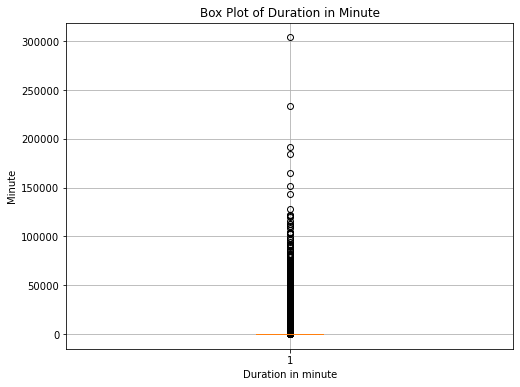

In [42]:
# 1. Box plot of duration_min
plt.figure(figsize=(8, 6))
plt.boxplot(duration_min)
plt.xlabel('Duration in minute')
plt.ylabel('Minute')
plt.title('Box Plot of Duration in Minute')
plt.grid(True)
plt.show()

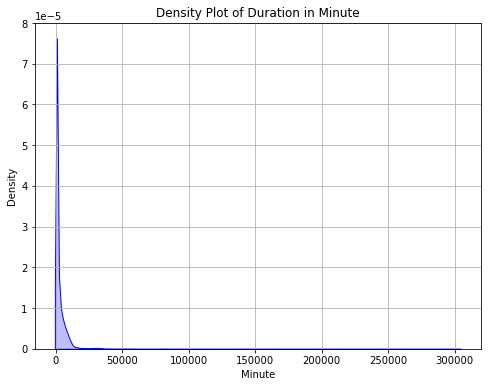

In [43]:
# 2.Density plot of duration_min
plt.figure(figsize=(8, 6))
sns.kdeplot(duration_min, shade=True, color='blue')
plt.title("Density Plot of Duration in Minute")
plt.xlabel("Minute")
plt.ylabel("Density")
plt.grid(True)
plt.show()

As the box and density plots demonstrated most of the data points are distributed near 0 and only a few data points located far away from 0, which is the reason why the skewness coefficient is very high.

Considering the duration here is in minute and the average length of Hollywood movies is between 96 to 120 minutes which is 2 hours, it is reasonable to regard those duration much more than 2 hours as outliers. Although their might have users who really watched movie for a long time but it might have a bigger chance that just users forgot to turned it off, in other words, it might be a mistake from the user's side or a special case. 

Thus, the outliers in the duration would be set either less than 5 or greater than 120 minutes, assuming that less than 5 mintues means the user dislike it from the beginning and over 120 minutes is based on the average movie length is 120 minutes so any duration longer than that will be considered as outliers.

## 1-14.Remove outliers in duration:
#### Duration less than 5 and greater than 120 minutes will be considered outliers in this scenario because the audiences can change the movie if they do not like it after it starts. Setting the boundary aims to discover what audiences like and how much they like the film by examining the viewing time.

### 1-14-1.Detect abnormal duration:

In [44]:
# Find the duration in minutes that longger than 120 mintures and lesser than 5 minutes
duration_min_outliers = df[(df['duration_min'] < 5) | (df['duration_min'] > 120)]

duration_min_outliers

view_year  view_month  view_day view_time  \
0            2017           1         1  01:15:09   
1            2017           1         1  13:56:02   
2            2017           1         1  15:17:47   
3            2017           1         1  16:04:13   
4            2017           1         1  19:16:37   
...           ...         ...       ...       ...   
615626       2019           6        30  21:29:08   
615628       2019           6        30  21:49:34   
615629       2019           6        30  22:00:44   
615630       2019           6        30  22:04:23   
615631       2019           6        30  22:35:24   

                             view_daypart  duration  duration_min  \
0                 overnight (00:30-05:59)       0.0          0.00   
1                    daytime (9:00-17:29)       0.0          0.00   
2                    daytime (9:00-17:29)   10530.0        175.50   
3                    daytime (9:00-17:29)      49.0          0.82   
4       Prime: early fringe (17:30-19:59)       0.0          0.00   
...                                   ...       ...           ...   
615626   Prime: late fringe (20:00-22:59)   42592.0        709.87   
615628   Prime: late fringe (20:00-22:59)   91157.0       1519.28   
615629   Prime: late fringe (20:00-22:59)       0.0          0.00   
615630   Prime: late fringe (20:00-22:59)       0.0          0.00   
615631   Prime: late fringe (20:00-22:59)       0.0          0.00   

                                            title  \
0              Angus, Thongs and Perfect Snogging   
1                    The Curse of Sleeping Beauty   
2                               London Has Fallen   
3                                        Vendetta   
4                 The SpongeBob SquarePants Movie   
...                                           ...   
615626                    The Wolf of Wall Street   
615628                               HALO Legends   
615629                                Pacific Rim   
615630  ReMastered: The Two Killings of Sam Cooke   
615631                                 Chopsticks   

                                                   genres  release_year  \
0                                  Comedy, Drama, Romance          2008   
1                      Fantasy, Horror, Mystery, Thriller          2016   
2                                        Action, Thriller          2016   
3                                           Action, Drama          2015   
4       Animation, Action, Adventure, Comedy, Family, ...          2004   
...                                                   ...           ...   
615626                            Biography, Crime, Drama          2013   
615628       Animation, Action, Adventure, Family, Sci-Fi          2010   
615629                          Action, Adventure, Sci-Fi          2013   
615630                                 Documentary, Music          2019   
615631                                      Comedy, Drama          2019   

        release_month  release_day    movie_id     user_id  
0                   7           25  26bd5987e8  1dea19f6fe  
1                   6            2  f26ed2675e  544dcbc510  
2                   3            4  f77e500e7a  7cbcc791bf  
3                   6           12  c74aec7673  ebf43c36b6  
4                  11           19  a80d6fc2aa  a57c992287  
...               ...          ...         ...         ...  
615626             12           25  271e85e3b3  9207e1499b  
615628              2           16  febf42d55f  d4fcb079ba  
615629              7           12  7b15e5ada1  4a14a2cd5a  
615630              2            8  52d49c515a  0b8163ea4b  
615631              5           31  0be62aac8b  5e5755d816  

[479776 rows x 14 columns]

In [45]:
# Calculate the percentage of outliers in the entire dataset
total_rows_df = len(df)
total_rows_duration_min_outliers = len(duration_min_outliers)

percentage_outliers = round((total_rows_duration_min_outliers / total_rows_df) * 100, 2)

print("Number of outliers: {}/{}".format(total_rows_duration_min_outliers, total_rows_df))
print("Percentage of outliers in duration in minute: {}%".format(percentage_outliers))

Number of outliers: 479776/615632
Percentage of outliers in duration in minute: 77.93%


As the outliers of duration that longer than 120 and less than 5 minutes are 77.93% in the whole dataset, here deletion would be apply to those outliers.

### 1-14-2.Remove abnormal duration:

In [46]:
# Drop the outliers of duration from df:
df.drop(duration_min_outliers.index, inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [47]:
# Check is there any outliers letf:
# Find the duration in minutes that longer than 120 minutes.
duration_min_outliers = df[df['duration_min'] > 120]

# Check if there are any outliers left
if not duration_min_outliers.empty:
    print("There still have duration outliers in the dataset")
else:
    print("There are no duration outliers in the dataset.")

There are no duration outliers in the dataset.


In [48]:
df

view_year  view_month  view_day view_time  \
0            2017           1         1  19:43:06   
1            2017           1         1  19:46:24   
2            2017           1         1  20:55:46   
3            2017           1         1  11:05:46   
4            2017           1         1  16:05:02   
...           ...         ...       ...       ...   
135851       2019           6        30  19:05:57   
135852       2019           6        30  19:23:29   
135853       2019           6        30  19:53:16   
135854       2019           6        30  20:58:53   
135855       2019           6        30  21:37:08   

                             view_daypart  duration  duration_min  \
0       Prime: early fringe (17:30-19:59)    4903.0         81.72   
1       Prime: early fringe (17:30-19:59)    3845.0         64.08   
2        Prime: late fringe (20:00-22:59)    6175.0        102.92   
3                    daytime (9:00-17:29)     621.0         10.35   
4                    daytime (9:00-17:29)     581.0          9.68   
...                                   ...       ...           ...   
135851  Prime: early fringe (17:30-19:59)    1600.0         26.67   
135852  Prime: early fringe (17:30-19:59)    6553.0        109.22   
135853  Prime: early fringe (17:30-19:59)     324.0          5.40   
135854   Prime: late fringe (20:00-22:59)    3128.0         52.13   
135855   Prime: late fringe (20:00-22:59)     851.0         14.18   

                                      title  \
0                         The Water Diviner   
1                                    Ratter   
2                                   28 Days   
3               Joe and Caspar Hit the Road   
4                                  Vendetta   
...                                     ...   
135851                              AlphaGo   
135852                       Murder Mystery   
135853                       Murder Mystery   
135854  Bob Lazar: Area 51 & Flying Saucers   
135855  Oprah Presents When They See Us Now   

                                         genres  release_year  release_month  \
0                           Drama, History, War          2014             12   
1                       Drama, Horror, Thriller          2016              2   
2                                 Comedy, Drama          2000              4   
3                Documentary, Adventure, Comedy          2015             11   
4                                 Action, Drama          2015              6   
...                                         ...           ...            ...   
135851                       Documentary, Sport          2017              9   
135852  Action, Comedy, Crime, Mystery, Romance          2019              6   
135853  Action, Comedy, Crime, Mystery, Romance          2019              6   
135854                              Documentary          2018             12   
135855                                Talk-Show          2019              6   

        release_day    movie_id     user_id  
0                26  7165c2fc94  8e1be40e32  
1                12  c39aae36c3  cff8ea652a  
2                14  584bffaf5f  759ae2eac9  
3                23  416464eaad  7726b5615e  
4                12  c74aec7673  ebf43c36b6  
...             ...         ...         ...  
135851           29  09c33ab151  464a7d25b6  
135852           14  8600e964f5  d0110d76ef  
135853           14  8600e964f5  8a764d662c  
135854            4  d8cca7be99  e079f16aa0  
135855           12  43cd23f30f  57501964fd  

[135856 rows x 14 columns]

In [49]:
# Make a copy of the original DataFrame
df_original = df.copy()

### 1-14-3.Visualise the duration after dropping the outliers:

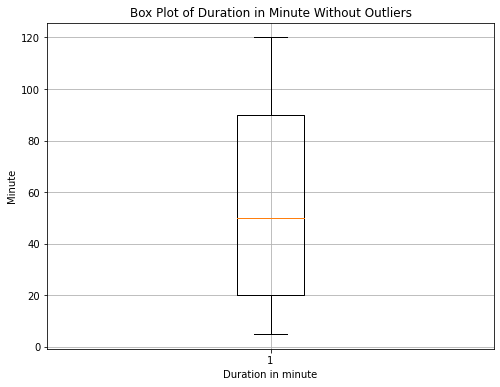

In [50]:
# 1. Box plot of duration_min after removed outliers
duration_min = df['duration_min']

plt.figure(figsize=(8, 6))
plt.boxplot(duration_min)
plt.xlabel('Duration in minute')
plt.ylabel('Minute')
plt.title('Box Plot of Duration in Minute Without Outliers')
plt.grid(True)
plt.show()

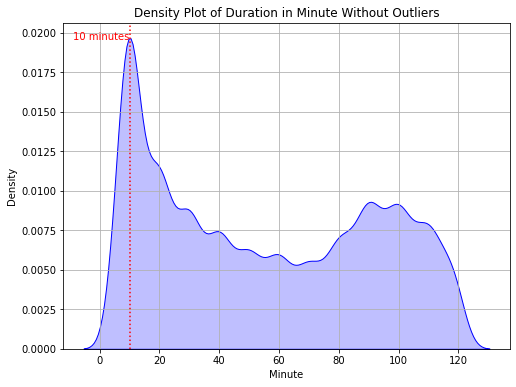

In [51]:
# 2.Density plot of duration_min
plt.figure(figsize=(8, 6))
sns.kdeplot(duration_min, shade=True, color='blue')
plt.title("Density Plot of Duration in Minute Without Outliers")
plt.xlabel("Minute")
plt.ylabel("Density")

# Draw the red dotted vertical line at x=10
plt.axvline(x=10, color='red', linestyle='dotted')
# Add text annotation next to the red dotted line
plt.text(10, plt.gca().get_ylim()[1] * 0.95, '10 minutes', color='red', rotation=0, ha='right')
plt.grid(True)
plt.show()

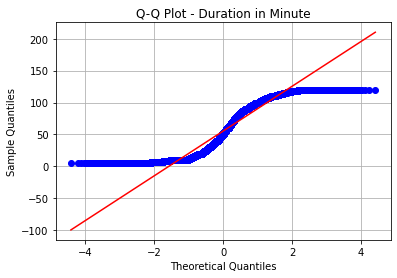

In [52]:
stats.probplot(duration_min, dist='norm', plot=plt)

# Customize the plot (optional)
plt.title('Q-Q Plot - Duration in Minute')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

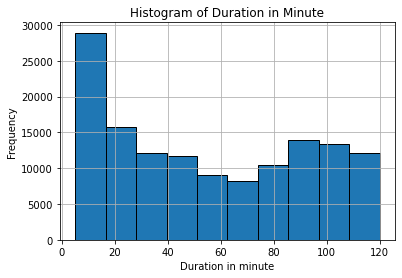

In [53]:
# Create the histogram
plt.hist(duration_min, bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Duration in minute')
plt.ylabel('Frequency')
plt.title('Histogram of Duration in Minute')
plt.grid(True)
plt.show()

In [54]:
print(duration_min.describe(), '\n')
print("Skewness coefficient of duration in minutes without outliers:", duration_min.skew())

count    135856.000000
mean         55.233294
std          36.754199
min           5.000000
25%          20.000000
50%          50.170000
75%          90.000000
max         120.000000
Name: duration_min, dtype: float64 

Skewness coefficient of duration in minutes without outliers: 0.19218661425858172


As the plots above demonstrated, with almost 30000 data are concentrated before 20 minutes, and the rest of the data is more evenly scattered between 20 and 120 minutes with some fluctuations. That means lots of the users tend to switch movie before wathcing around 20 minutes, much lesser movies were viewed for a longer time. Moreover, viewing time that stops at about 70 minutes was the less.

## 1-15.Scale duration:
Scaling the duration in minutes between 5 to 120 minutes to a range between 0.1 and 1.

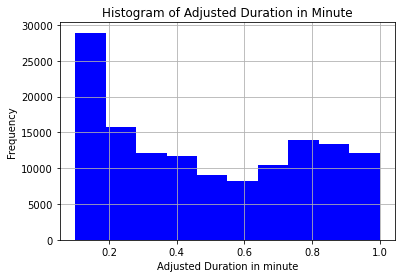

Skewness: 0.1921866142585831


In [55]:
mms = MinMaxScaler()

# Scale the values to a range of 0 to 1
duration_min_mms = mms.fit_transform(df[['duration_min']])

# Adjust the scaled values to a range of 0.1 to 1
duration_min_mms = duration_min_mms * 0.9 + 0.1

# Create a DataFrame with the adjusted values
duration_min_mms = pd.DataFrame(duration_min_mms, columns=['duration_min_mms'])

# Plot the histogram of the normalized data
plt.hist(duration_min_mms['duration_min_mms'], bins=10, color='blue')
plt.xlabel('Adjusted Duration in minute')
plt.ylabel('Frequency')
plt.title('Histogram of Adjusted Duration in Minute')
plt.grid(True)
plt.show()

# Compute the skewness of the normalized data
skewness = duration_min_mms['duration_min_mms'].skew()
print("Skewness:", skewness)

In [56]:
duration_min_mms

duration_min_mms
0               0.700417
1               0.562365
2               0.866330
3               0.141870
4               0.136626
...                  ...
135851          0.269591
135852          0.915635
135853          0.103130
135854          0.468843
135855          0.171843

[135856 rows x 1 columns]

# 2.Data Encoding

## 2-1.Encode daypart:

Daypart encoing: Considering personalized advertising, daypart data is treated as nominal, not ordinal, as individual preferences for different time periods vary significantly, without a clear ranking. While early fringe and late fringe are considered prime time, viewtime remains entirely based on personal preferences and freedom to choose when to watch. Therefore, the combination of these factors underscores the importance of recognizing daypart data as nominal for accurate advertising strategies.


Reference:https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

Use LabelEncoder to transform strings into integer labels then use OneHotEncoder to transform to one-hot encoded representation

In [57]:
# 1.Use LabelEncoder to transform strings 'view_daypart' to integer labels
le = LabelEncoder()

# Fit and transform the string labels to integer labels by LabelEncoder
le.fit(df['view_daypart'])
daypart_le = le.transform(df['view_daypart'])

# Reshape the 1D array to a 2D array since OneHotEncoder expects a 2D input
daypart_le = daypart_le.reshape(-1, 1)

# 2.Use OneHotEncoder to transform integer 'view_daypart' to one-hot encoded representation
# Create the OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")

# Fit and transform the integer labels to one-hot encoded representation
daypart_ohe = ohe.fit_transform(daypart_le)

# Convert the one-hot encoded array into a DataFrame
ohe_df = pd.DataFrame(daypart_ohe, columns=[f"daypart_{c}" for c in le.classes_])

# Insert the one-hot encoded columns right after the 'view_daypart' column
insert_index = df.columns.get_loc('view_daypart') + 1
for col_name, col_data in ohe_df.items():
    df.insert(insert_index, col_name, col_data)

df

view_year  view_month  view_day view_time  \
0            2017           1         1  19:43:06   
1            2017           1         1  19:46:24   
2            2017           1         1  20:55:46   
3            2017           1         1  11:05:46   
4            2017           1         1  16:05:02   
...           ...         ...       ...       ...   
135851       2019           6        30  19:05:57   
135852       2019           6        30  19:23:29   
135853       2019           6        30  19:53:16   
135854       2019           6        30  20:58:53   
135855       2019           6        30  21:37:08   

                             view_daypart  daypart_overnight (00:30-05:59)  \
0       Prime: early fringe (17:30-19:59)                              0.0   
1       Prime: early fringe (17:30-19:59)                              0.0   
2        Prime: late fringe (20:00-22:59)                              0.0   
3                    daytime (9:00-17:29)                              0.0   
4                    daytime (9:00-17:29)                              0.0   
...                                   ...                              ...   
135851  Prime: early fringe (17:30-19:59)                              0.0   
135852  Prime: early fringe (17:30-19:59)                              0.0   
135853  Prime: early fringe (17:30-19:59)                              0.0   
135854   Prime: late fringe (20:00-22:59)                              0.0   
135855   Prime: late fringe (20:00-22:59)                              0.0   

        daypart_late night (23:00-00:29)  daypart_daytime (9:00-17:29)  \
0                                    0.0                           0.0   
1                                    0.0                           0.0   
2                                    0.0                           0.0   
3                                    0.0                           1.0   
4                                    0.0                           1.0   
...                                  ...                           ...   
135851                               0.0                           0.0   
135852                               0.0                           0.0   
135853                               0.0                           0.0   
135854                               0.0                           0.0   
135855                               0.0                           0.0   

        daypart_breakfast (06:00-08:59)  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
...                                 ...   
135851                              0.0   
135852                              0.0   
135853                              0.0   
135854                              0.0   
135855                              0.0   

        daypart_Prime: late fringe (20:00-22:59)  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
135851                                       0.0   
135852                                       0.0   
135853                                       0.0   
135854                                       1.0   
135855                                       1.0   

        daypart_Prime: early fringe (17:30-19:59)  duration  duration_min  \
0                                             1.0    4903.0         81.72   
1                                             1.0    3845.0         64.08   
2                                             0.0    6175.0        102.92   
3                                             0.0     621.0         10.35   
4                 

## 2-2.Encode genres:

In [58]:
# Check if there are any NaN values in the 'genres' column
if df['genres'].isnull().any():
    print("Found NaN values in the 'genres' column. Here they are:")
    print(df[df['genres'].isnull()]['genres'])
    
    # Drop the rows with NaN values in the 'genres' column
    df.dropna(subset=['genres'], inplace=True)
    print("NaN values have been dropped.")
else:
    print("There are no NaN values in the 'genres' column.")

There are no NaN values in the 'genres' column.


### 2-2-1.Creat a genres list to see how many unique generes there are in the dataset:

Methods to try on genres: 

1.Feature Hashing Scheme:https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

In [59]:
# Step 1: Extract and count unique genres
genres_list = df['genres'].str.split(',').apply(lambda x: [item.strip() for item in x]).explode()
unique_genres = genres_list.unique()
total_genres = len(unique_genres)

# Step 2: Sort the unique genres in alphabetical order
unique_genres_sorted = sorted(unique_genres)

# Step 3: Print the total number of unique genres
print(f"Total number of unique genres: {total_genres}")

# Step 4: Print the list with an index number before each genre in alphabetical order
for index, genre in enumerate(unique_genres_sorted, 1):
    print(f"{index}. {genre}")

Total number of unique genres: 26
1. Action
2. Adventure
3. Animation
4. Biography
5. Comedy
6. Crime
7. Documentary
8. Drama
9. Family
10. Fantasy
11. Film-Noir
12. History
13. Horror
14. Music
15. Musical
16. Mystery
17. News
18. Reality-TV
19. Romance
20. Sci-Fi
21. Short
22. Sport
23. Talk-Show
24. Thriller
25. War
26. Western


### 2-2-2.Discover the unique combination of genres:

In [60]:
# Save the unique genres combination in alphabetical order
genres_combi = sorted(df['genres'].unique())

# print the total number
print("There are ", len(genres_combi), "different combination of genres in the genres column", '\n')

# Print the unique genres
for genre in genres_combi:
    print(genre)

There are  998 different combination of genres in the genres column 

Action
Action, Adventure
Action, Adventure, Biography, Drama, History
Action, Adventure, Biography, Drama, Romance, Thriller
Action, Adventure, Biography, Drama, Thriller
Action, Adventure, Comedy
Action, Adventure, Comedy, Crime
Action, Adventure, Comedy, Crime, Drama
Action, Adventure, Comedy, Crime, Family, Mystery
Action, Adventure, Comedy, Crime, Family, Romance, Thriller
Action, Adventure, Comedy, Crime, Fantasy, Sci-Fi
Action, Adventure, Comedy, Crime, Mystery, Thriller
Action, Adventure, Comedy, Crime, Thriller
Action, Adventure, Comedy, Drama, Family, Fantasy
Action, Adventure, Comedy, Drama, Family, Fantasy, Sci-Fi, Thriller
Action, Adventure, Comedy, Drama, Fantasy
Action, Adventure, Comedy, Drama, Sci-Fi
Action, Adventure, Comedy, Family
Action, Adventure, Comedy, Family, Fantasy
Action, Adventure, Comedy, Family, Fantasy, Mystery
Action, Adventure, Comedy, Family, Fantasy, Sci-Fi
Action, Adventure, Comed

Encoding reference: https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

Genres encoding reference (encode categorical variables with many levels): https://medium.com/swlh/stop-one-hot-encoding-your-categorical-features-avoid-curse-of-dimensionality-16743c32cea4

### Encoding method selection for 'genres'

'genres' is a categorical data with multiple categories. There are 47 differnet types of genres and 998 different combination of genres in the dataset. One-hot encoding can be problematic as the 'genres' have a large number of unique categories, it would create 46 additional columns, resulting in a sparse and high-dimensional feature space, which means it could lead to curse of dimensionality and ineffieicnet for the models. 

##### Option-1: Binary encoding:

To handle such categorical data with multiple categories is to use binary encoding. Binary encoding is a compromise between one-hot encoding and label encoding. It converts each category into binary code, and the number of binary digits needed is determined by the total number of unique categories. This approach can help in reducing the number of columns compared to one-hot encoding while still capturing the information about different genres.

##### (done)Option-2: Multi-label encoding

### 2-2-3-Option-2.Multi-label encoding 'genres':

In [61]:
# 1. Split genres
df['genres'] = df['genres'].str.split(',').apply(lambda x: [item.strip() for item in x])

# 2. Encode genres
mlb = MultiLabelBinarizer()
genres_mlb = mlb.fit_transform(df['genres'])

# Join encoded genres back to the df
genres_df = pd.DataFrame(genres_mlb, columns=mlb.classes_)
df_mlb = df.join(genres_df)

# Optionally, drop the original 'genres' column
df_mlb.drop(columns=['genres'], inplace=True)

# Print the resulting DataFrame
df_mlb

view_year  view_month  view_day view_time  \
0            2017           1         1  19:43:06   
1            2017           1         1  19:46:24   
2            2017           1         1  20:55:46   
3            2017           1         1  11:05:46   
4            2017           1         1  16:05:02   
...           ...         ...       ...       ...   
135851       2019           6        30  19:05:57   
135852       2019           6        30  19:23:29   
135853       2019           6        30  19:53:16   
135854       2019           6        30  20:58:53   
135855       2019           6        30  21:37:08   

                             view_daypart  daypart_overnight (00:30-05:59)  \
0       Prime: early fringe (17:30-19:59)                              0.0   
1       Prime: early fringe (17:30-19:59)                              0.0   
2        Prime: late fringe (20:00-22:59)                              0.0   
3                    daytime (9:00-17:29)                              0.0   
4                    daytime (9:00-17:29)                              0.0   
...                                   ...                              ...   
135851  Prime: early fringe (17:30-19:59)                              0.0   
135852  Prime: early fringe (17:30-19:59)                              0.0   
135853  Prime: early fringe (17:30-19:59)                              0.0   
135854   Prime: late fringe (20:00-22:59)                              0.0   
135855   Prime: late fringe (20:00-22:59)                              0.0   

        daypart_late night (23:00-00:29)  daypart_daytime (9:00-17:29)  \
0                                    0.0                           0.0   
1                                    0.0                           0.0   
2                                    0.0                           0.0   
3                                    0.0                           1.0   
4                                    0.0                           1.0   
...                                  ...                           ...   
135851                               0.0                           0.0   
135852                               0.0                           0.0   
135853                               0.0                           0.0   
135854                               0.0                           0.0   
135855                               0.0                           0.0   

        daypart_breakfast (06:00-08:59)  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
...                                 ...   
135851                              0.0   
135852                              0.0   
135853                              0.0   
135854                              0.0   
135855                              0.0   

        daypart_Prime: late fringe (20:00-22:59)  ...  News  Reality-TV  \
0                                            0.0  ...     0           0   
1                                            0.0  ...     0           0   
2                                            1.0  ...     0           0   
3                                            0.0  ...     0           0   
4                                            0.0  ...     0           0   
...                                          ...  ...   ...         ...   
135851                                       0.0  ...     0           0   
135852                                       0.0  ...     0           0   
135853                                       0.0  ...     0           0   
135854                                       1.0  ...     0           0   
135855                                       1.0  ...     0           0   

        Romance Sci-Fi  Short  Sport  Talk-Show Thriller War  Western  
0             0      0      0      0          0        

In [62]:
df_mlb.iloc[:, 19:]

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0            0          0          0          0       0      0            0   
1            0          0          0          0       0      0            0   
2            0          0          0          0       1      0            0   
3            0          1          0          0       1      0            1   
4            1          0          0          0       0      0            0   
...        ...        ...        ...        ...     ...    ...          ...   
135851       0          0          0          0       0      0            1   
135852       1          0          0          0       1      1            0   
135853       1          0          0          0       1      1            0   
135854       0          0          0          0       0      0            1   
135855       0          0          0          0       0      0            0   

        Drama  Family  Fantasy  ...  News  Reality-TV  Romance  Sci-Fi  Short  \
0           1       0        0  ...     0           0        0       0      0   
1           1       0        0  ...     0           0        0       0      0   
2           1       0        0  ...     0           0        0       0      0   
3           0       0        0  ...     0           0        0       0      0   
4           1       0        0  ...     0           0        0       0      0   
...       ...     ...      ...  ...   ...         ...      ...     ...    ...   
135851      0       0        0  ...     0           0        0       0      0   
135852      0       0        0  ...     0           0        1       0      0   
135853      0       0        0  ...     0           0        1       0      0   
135854      0       0        0  ...     0           0        0       0      0   
135855      0       0        0  ...     0           0        0       0      0   

        Sport  Talk-Show  Thriller  War  Western  
0           0          0         0    1        0  
1           0          0         1    0        0  
2           0          0         0    0        0  
3           0          0         0    0        0  
4           0          0         0    0        0  
...       ...        ...       ...  ...      ...  
135851      1          0         0    0        0  
135852      0          0         0    0        0  
135853      0          0         0    0        0  
135854      0          0         0    0        0  
135855      0          1         0    0        0  

[135856 rows x 26 columns]

In [63]:
# Check the shape of df_mlb
df_mlb.shape

(135856, 45)

In [64]:
df_mlb.columns

Index(['view_year', 'view_month', 'view_day', 'view_time', 'view_daypart',
       'daypart_overnight (00:30-05:59)', 'daypart_late night (23:00-00:29)',
       'daypart_daytime (9:00-17:29)', 'daypart_breakfast (06:00-08:59)',
       'daypart_Prime: late fringe (20:00-22:59)',
       'daypart_Prime: early fringe (17:30-19:59)', 'duration', 'duration_min',
       'title', 'release_year', 'release_month', 'release_day', 'movie_id',
       'user_id', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'],
      dtype='object')

### 2-2-4.Check encoded genres columns:

In [65]:
# Calculate the sum of values for each row in the columns starting from the 19th column
sum_genres = df_mlb[df_mlb.columns[19:]].sum(axis=1)

# Check if there are any rows where the sum is equal to 0
if (sum_genres == 0).any():
    # Print the resulting DataFrame with rows where the sum is equal to 0
    print(df_mlb[sum_genres == 0])
else:
    print("There are no rows of data with a sum of 0 in genres.")

There are no rows of data with a sum of 0 in genres.


# 3.Viewership Preference Score

[Explain]Concept of Viewership Preference Score: Taking the nature of this data into account, the features can be broadly categorized into 

a. Id: user_id, movie_id and title

b. Time: View time, release time, watching duration and dayparts

c. Movie genre types

This model aims to segment audiences by viewership data, and the data needs to deliver what type of movie that audiences like to watch. 
Thus, the core of "Viewership Preference Score" is to inform what types of movies they like extracted from the duration they spent on a film by following steps.

1. Scale duration: scale watching duration from 5 to 120 minutes into 0.1 to 1 as a scale of the duration the audiences watched. If it is closer to 1, the audience watches the movie longer; closer to 0 means watching lesser. 

2. Multiply encoded genres by scaled duration: since the genres have been multi-label encoded, the genres of the movie are 1; if it is not, then it is 0. The outcome of the calculation can be seen as the time that audiences spend on different genres in each view.

3. Sum by user_id: as each viewership is one play of the movie, there are views from different users, and they needed to be summed up together by each user so that the outcome of clusters would be each point represents a user instead of each view which is only behaviour.

As a result, the dataset will be each row representing one user and the time spent on each genre is summed from all the viewership. Moreover, this operation is also applied on dayparts as it has been encoded, and it can tell which daypart the audiences spent the most.

In [66]:
duration_min_mms

duration_min_mms
0               0.700417
1               0.562365
2               0.866330
3               0.141870
4               0.136626
...                  ...
135851          0.269591
135852          0.915635
135853          0.103130
135854          0.468843
135855          0.171843

[135856 rows x 1 columns]

In [67]:
print(df_mlb.columns)

Index(['view_year', 'view_month', 'view_day', 'view_time', 'view_daypart',
       'daypart_overnight (00:30-05:59)', 'daypart_late night (23:00-00:29)',
       'daypart_daytime (9:00-17:29)', 'daypart_breakfast (06:00-08:59)',
       'daypart_Prime: late fringe (20:00-22:59)',
       'daypart_Prime: early fringe (17:30-19:59)', 'duration', 'duration_min',
       'title', 'release_year', 'release_month', 'release_day', 'movie_id',
       'user_id', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'],
      dtype='object')


In [68]:
genres = df_mlb.columns[19:]

print('There are', len(genres), 'types of genre\n', genres)

There are 26 types of genre
 Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV',
       'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War',
       'Western'],
      dtype='object')


##  3-1.Multiply encoded genres by scaled duration: 
Make Viewership Preference Score by multiply each view's boolean genres by duration_min_mms (turned into 1 to 0 distributation), as the reuslts will be numbers that indicates the proporation of watching time with the genres.

In [69]:
# Multiply each genres with duration_min_mms, which is the proporation of watching time. This can turn the number in boolean in genres into a Viewership Preference Score based on the watching time.  
df_mlb[df_mlb.columns[19:]] = (df_mlb[df_mlb.columns[19:]].mul(duration_min_mms['duration_min_mms'], axis=0)).round(3)

df_mlb[df_mlb.columns[19:]]

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0        0.000      0.000        0.0        0.0   0.000  0.000        0.000   
1        0.000      0.000        0.0        0.0   0.000  0.000        0.000   
2        0.000      0.000        0.0        0.0   0.866  0.000        0.000   
3        0.000      0.142        0.0        0.0   0.142  0.000        0.142   
4        0.137      0.000        0.0        0.0   0.000  0.000        0.000   
...        ...        ...        ...        ...     ...    ...          ...   
135851   0.000      0.000        0.0        0.0   0.000  0.000        0.270   
135852   0.916      0.000        0.0        0.0   0.916  0.916        0.000   
135853   0.103      0.000        0.0        0.0   0.103  0.103        0.000   
135854   0.000      0.000        0.0        0.0   0.000  0.000        0.469   
135855   0.000      0.000        0.0        0.0   0.000  0.000        0.000   

        Drama  Family  Fantasy  ...  News  Reality-TV  Romance  Sci-Fi  Short  \
0       0.700     0.0      0.0  ...   0.0         0.0    0.000     0.0    0.0   
1       0.562     0.0      0.0  ...   0.0         0.0    0.000     0.0    0.0   
2       0.866     0.0      0.0  ...   0.0         0.0    0.000     0.0    0.0   
3       0.000     0.0      0.0  ...   0.0         0.0    0.000     0.0    0.0   
4       0.137     0.0      0.0  ...   0.0         0.0    0.000     0.0    0.0   
...       ...     ...      ...  ...   ...         ...      ...     ...    ...   
135851  0.000     0.0      0.0  ...   0.0         0.0    0.000     0.0    0.0   
135852  0.000     0.0      0.0  ...   0.0         0.0    0.916     0.0    0.0   
135853  0.000     0.0      0.0  ...   0.0         0.0    0.103     0.0    0.0   
135854  0.000     0.0      0.0  ...   0.0         0.0    0.000     0.0    0.0   
135855  0.000     0.0      0.0  ...   0.0         0.0    0.000     0.0    0.0   

        Sport  Talk-Show  Thriller  War  Western  
0        0.00      0.000     0.000  0.7      0.0  
1        0.00      0.000     0.562  0.0      0.0  
2        0.00      0.000     0.000  0.0      0.0  
3        0.00      0.000     0.000  0.0      0.0  
4        0.00      0.000     0.000  0.0      0.0  
...       ...        ...       ...  ...      ...  
135851   0.27      0.000     0.000  0.0      0.0  
135852   0.00      0.000     0.000  0.0      0.0  
135853   0.00      0.000     0.000  0.0      0.0  
135854   0.00      0.000     0.000  0.0      0.0  
135855   0.00      0.172     0.000  0.0      0.0  

[135856 rows x 26 columns]

## 3-2.Check Viewership Preference Score by genres after caluclation:

In [70]:
subset = df_mlb[df_mlb.columns[19:]]
if subset.isna().any().any():
    print("NaN values found:")
    print(subset[subset.isna().any(axis=1)])
else:
    print("There are no NaN values in the selected columns.")

There are no NaN values in the selected columns.


# 4-EDA

## 4-1.View_year:

In [71]:
from matplotlib.ticker import PercentFormatter

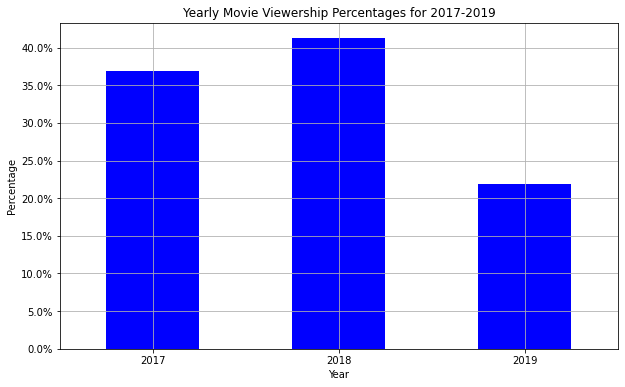

In [72]:
#5-1 view_year:
# Calculate the percentage of view in each year
year_percentage = df_mlb.view_year.value_counts(normalize=True)

# Sort the data by the order of year
year_percentage_sorted = year_percentage.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
year_percentage_sorted.plot.bar(color='blue')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Yearly Movie Viewership Percentages for 2017-2019')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

### 4-1. As the movie viewership percentages in each year showed, the viewership percentage of 2018 is slightly more than 2017. Although the viewership data in 2019 was collected only halfway until 30 June, 2019, the viewership in 2019 still accounted for nearly half of the viewership of the other two years.

## 4-2.View_month:

In [73]:
df_mlb

view_year  view_month  view_day view_time  \
0            2017           1         1  19:43:06   
1            2017           1         1  19:46:24   
2            2017           1         1  20:55:46   
3            2017           1         1  11:05:46   
4            2017           1         1  16:05:02   
...           ...         ...       ...       ...   
135851       2019           6        30  19:05:57   
135852       2019           6        30  19:23:29   
135853       2019           6        30  19:53:16   
135854       2019           6        30  20:58:53   
135855       2019           6        30  21:37:08   

                             view_daypart  daypart_overnight (00:30-05:59)  \
0       Prime: early fringe (17:30-19:59)                              0.0   
1       Prime: early fringe (17:30-19:59)                              0.0   
2        Prime: late fringe (20:00-22:59)                              0.0   
3                    daytime (9:00-17:29)                              0.0   
4                    daytime (9:00-17:29)                              0.0   
...                                   ...                              ...   
135851  Prime: early fringe (17:30-19:59)                              0.0   
135852  Prime: early fringe (17:30-19:59)                              0.0   
135853  Prime: early fringe (17:30-19:59)                              0.0   
135854   Prime: late fringe (20:00-22:59)                              0.0   
135855   Prime: late fringe (20:00-22:59)                              0.0   

        daypart_late night (23:00-00:29)  daypart_daytime (9:00-17:29)  \
0                                    0.0                           0.0   
1                                    0.0                           0.0   
2                                    0.0                           0.0   
3                                    0.0                           1.0   
4                                    0.0                           1.0   
...                                  ...                           ...   
135851                               0.0                           0.0   
135852                               0.0                           0.0   
135853                               0.0                           0.0   
135854                               0.0                           0.0   
135855                               0.0                           0.0   

        daypart_breakfast (06:00-08:59)  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   
...                                 ...   
135851                              0.0   
135852                              0.0   
135853                              0.0   
135854                              0.0   
135855                              0.0   

        daypart_Prime: late fringe (20:00-22:59)  ...  News  Reality-TV  \
0                                            0.0  ...   0.0         0.0   
1                                            0.0  ...   0.0         0.0   
2                                            1.0  ...   0.0         0.0   
3                                            0.0  ...   0.0         0.0   
4                                            0.0  ...   0.0         0.0   
...                                          ...  ...   ...         ...   
135851                                       0.0  ...   0.0         0.0   
135852                                       0.0  ...   0.0         0.0   
135853                                       0.0  ...   0.0         0.0   
135854                                       1.0  ...   0.0         0.0   
135855                                       1.0  ...   0.0         0.0   

        Romance Sci-Fi  Short  Sport  Talk-Show Thriller  War  Western  
0         0.000    0.0    0.0   0.00      0.000    0.0

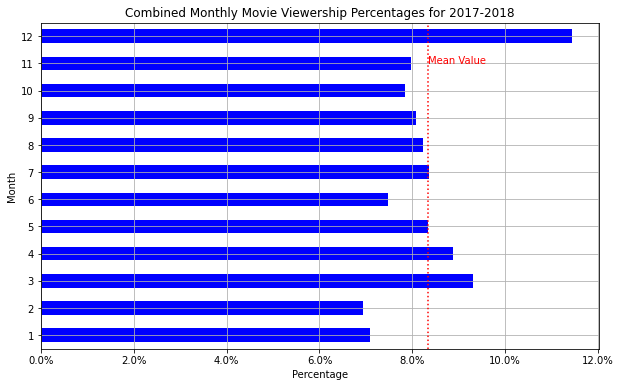

In [74]:
# Filter the dataframe for rows where view_year is 2017 or 2018
filtered_df = df_mlb[df_mlb.view_year.isin([2017, 2018])]

# Calculate the percentage of each month based on the filtered dataframe
month_percentage = filtered_df.view_month.value_counts(normalize=True).sort_index()

# Calculate the mean of month percentages
mean_month_percentage = month_percentage.mean()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
month_percentage.plot.barh(color='blue')

# Set x-axis to percentage format
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

# Draw the red dotted vertical line at the calculated mean
plt.axvline(x=mean_month_percentage, color='red', linestyle='dotted')

# Add text label next to the red dotted line to denote that it's the mean value
plt.text(mean_month_percentage , len(month_percentage) -2 , 'Mean Value', color='red')
plt.title('Combined Monthly Movie Viewership Percentages for 2017-2018')
plt.ylabel('Month')
plt.xlabel('Percentage')
plt.grid(True)
plt.show()

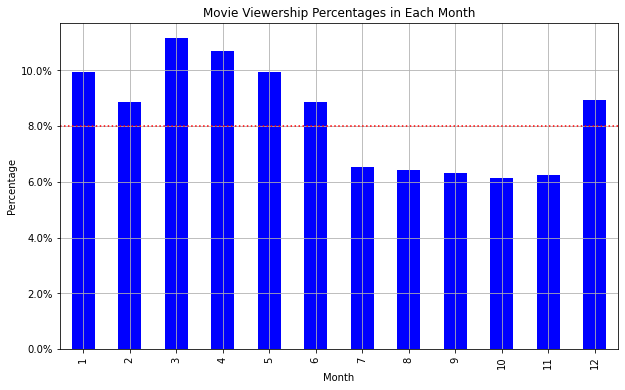

In [75]:
#5-2 view_month:
month_percentage = df_mlb.view_month.value_counts(normalize=True)

# Sort the data by the index (month)
month_percentage_sorted = month_percentage.sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
month_percentage_sorted.plot(kind='bar', color='blue')

# Add labels and a title to the histogram
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Movie Viewership Percentages in Each Month')

# Set y-axis to percentage format
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Draw the red dotted line at y=0.08
plt.axhline(y=0.08, color='red', linestyle='dotted')
plt.grid(True)
# Display the histogram
plt.show()

### 4-2. There a obvious trend that the peak season for watching movie is from December to June, all the viewership percentages are higher than 8% and the peak is in March with well over 10%. Moreover, the off-peak period can be found from July to November, throughout these consecutive five months, the viewership percentages has remained relatively consistent, hovering around 6%.

## 4-3.View_daypart:

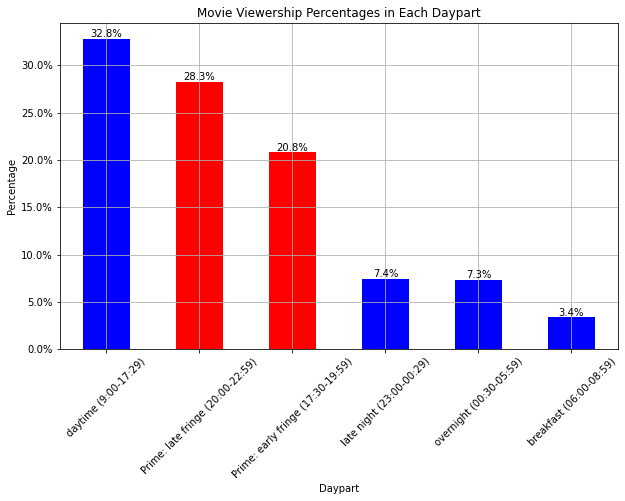

In [76]:
#5-3. visualise view_daypart:
# Calculate the percentage of each daypart
daypart_percen = df_mlb.view_daypart.value_counts(normalize=True)

# Plot the bar chart of daypart categories
plt.figure(figsize=(10, 6))
colors = ['red' if daypart.startswith('Prime: ') else 'blue' for daypart in daypart_percen.index]
daypart_percen.plot.bar(color=colors)

plt.xlabel('Daypart')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.title('Movie Viewership Percentages in Each Daypart')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Add percentage labels to the bars
for idx, value in enumerate(daypart_percen):
    plt.text(idx, value, f"{value*100:.1f}%", ha='center', va='bottom')

plt.grid(True)
plt.show()

### [Need check]4-3. Movie viewership percentages in each daypart shows that in daytime has the most of the views with over 30 percentages ,followed by late and early fringe, with 29.5% and 19.7% respectively. Although both of the prime times are second and third places but there is about 10% gap between them. In contrast, late night, overnight and breakfast are all below 10%, especially, the breakfast time, which is the lowest with only 3.1%. 

## 4-4.Dayparts Hourly Efficiency:

In [77]:
#5-4. Calculate the hourly efficiency of each daypart:
# Count the frequency of each daypart
daypart_count = df_mlb['view_daypart'].value_counts()

# Set the hour for each daypart
hourly_weights = {
    'overnight (00:30-05:59)': 5.5,
    'breakfast (06:00-08:59)': 2.5,
    'daytime (9:00-17:29)': 8.5,
    'Prime: early fringe (17:30-19:59)': 2.5,
    'Prime: late fringe (20:00-22:59)': 3,
    'late night (23:00-00:29)': 1.5
}

# Calculate the hourly efficiency of each daypart
hourly_efficiency = daypart_count / pd.Series(hourly_weights)

# Calculate the Prime time efficiency
primetime_counts = daypart_count.loc[['Prime: early fringe (17:30-19:59)', 'Prime: late fringe (20:00-22:59)']].sum()
primetime_weight = hourly_weights['Prime: early fringe (17:30-19:59)'] + hourly_weights['Prime: late fringe (20:00-22:59)']
primetime_efficiency = primetime_counts / primetime_weight

# Add the Primetime efficiency to the hourly efficiency DataFrame
hourly_efficiency['Primetime (17:30-22:59)'] = primetime_efficiency

# Convert the hourly efficiency values to integers using round() function
hourly_efficiency = hourly_efficiency.round(0).astype(int)

# Print the daypart count and hourly efficiency
print("Daypart Count:")
print(daypart_count)
print("\nHourly Efficiency:")
print(hourly_efficiency)

Daypart Count:
daytime (9:00-17:29)                 44590
Prime: late fringe (20:00-22:59)     38407
Prime: early fringe (17:30-19:59)    28247
late night (23:00-00:29)             10077
overnight (00:30-05:59)               9962
breakfast (06:00-08:59)               4573
Name: view_daypart, dtype: int64

Hourly Efficiency:
Prime: early fringe (17:30-19:59)    11299
Prime: late fringe (20:00-22:59)     12802
breakfast (06:00-08:59)               1829
daytime (9:00-17:29)                  5246
late night (23:00-00:29)              6718
overnight (00:30-05:59)               1811
Primetime (17:30-22:59)              12119
dtype: int32


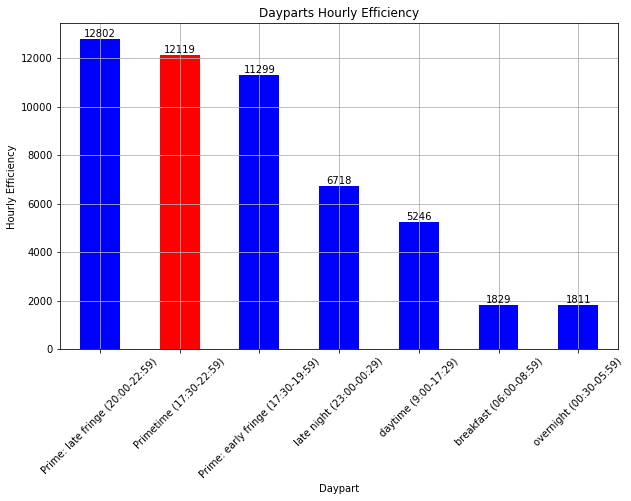

In [78]:
#5-4: visualise hourly efficiency:
hourly_efficiency_sorted = hourly_efficiency.sort_values(ascending=False)

# Plot the bar chart of hourly efficiency for each daypart
plt.figure(figsize=(10, 6))

# Set the default color as blue for all dayparts
colors = ['blue'] * len(hourly_efficiency_sorted)

# Set the "Primetime" bar color as red
colors[hourly_efficiency_sorted.index.get_loc('Primetime (17:30-22:59)')] = 'red'

hourly_efficiency_sorted.plot.bar(color=colors)

plt.xlabel('Daypart')
plt.xticks(rotation=45)
plt.ylabel('Hourly Efficiency')
plt.title('Dayparts Hourly Efficiency')

# Add percentage labels to the bars
for idx, value in enumerate(hourly_efficiency_sorted):
    plt.text(idx, value, f"{value}", ha='center', va='bottom')

plt.grid(True)
plt.show()

### 4-4. [Need check]However only using the viewership in each of the daytime have bias that not all the daytime is in the same amount of duration. Hourly effeciency is calculated by the number of the view in each daytime and divided by the amount of time (hour).
### The plot can tell that both of the prime time have very high efficieny compared to other dayparts. Followed by late night and daytime. Lastly, overnight and breakfast are the least efficiency time. Interestingly, though daytime have the most of the view amoung the dayparts, it has the longest time which is eight and a half hours that made it's efficieny can only be ranked at fourth place. Additionally, the red bar shows the efficieny of the whloe prime time.

## 4-5.Box plot of duration in minute:

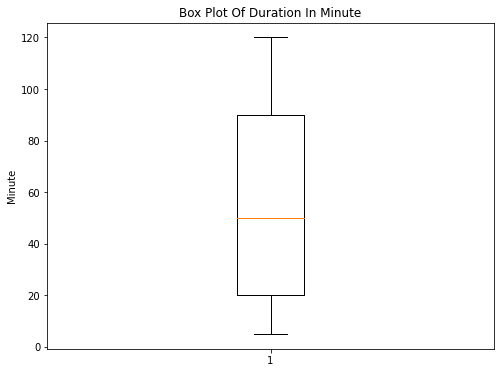

In [79]:
#5-5 box plot of duration in min
plt.figure(figsize=(8, 6))
plt.boxplot(df_mlb.duration_min, vert=True)

# Add labels and title
plt.ylabel('Minute')
plt.title('Box Plot Of Duration In Minute')

# Show the plot
plt.show()

### 4-5. [Need check] Even the dataset has been removed any duration longer than 120 minutes, it is still highly positive skewness. However, it can be understand as the nature of the data of common behaviour while watching movie on OTT because user can choose and switch movie whenever they want until they satisfied with one.

## 4-6.Top 20 Films Ranked by View Count:

In [80]:
#5-6. Top 20 most viewed movie list
# Group by 'movie_id' and 'title', then calculate the count for each movie
movie_counts = df_mlb.groupby(['movie_id', 'title']).size()

# Sort the movies based on counts in descending order
top_20_movies = movie_counts.sort_values(ascending=False).head(20)

# Calculate the total number of viewership
total_viewership = len(df_mlb)

# Display the top 20 movie titles and their count numbers
for (movie_id, title), count in top_20_movies.items():
    percentage = (count / total_viewership) * 100
    print(f"{title}: {count} ({percentage:.2f}%)")

Black Mirror: Bandersnatch: 1546 (1.14%)
Bright: 595 (0.44%)
FYRE: The Greatest Party That Never Happened: 489 (0.36%)
Annihilation: 464 (0.34%)
To All the Boys I've Loved Before: 462 (0.34%)
Deadpool: 453 (0.33%)
Avengers: Age of Ultron: 443 (0.33%)
Bird Box: 440 (0.32%)
The Hitman's Bodyguard: 432 (0.32%)
Shrek: 378 (0.28%)
The Circle: 377 (0.28%)
Hot Fuzz: 375 (0.28%)
Ant-Man: 358 (0.26%)
The Cloverfield Paradox: 354 (0.26%)
Death Note: 349 (0.26%)
The Kissing Booth: 341 (0.25%)
The Foreigner: 340 (0.25%)
The Nice Guys: 337 (0.25%)
Captain America: Civil War: 322 (0.24%)
Isn't It Romantic: 316 (0.23%)


In [81]:
len(df_mlb)

135856

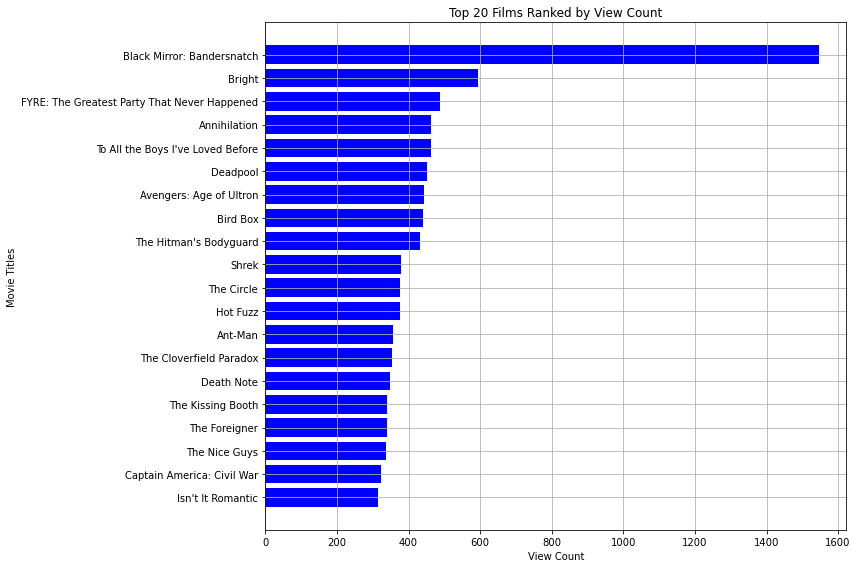

In [82]:
#5-6. Top 20 most viewed movie bar chart:
# Sort the top 20 movies by view count in descending order
top_20_movies = top_20_movies.sort_values(ascending=True)

# Get the movie titles and count numbers for the horizontal bar chart
movie_titles = [title for (_, title), _ in top_20_movies.items()]
count_numbers = [count for _, count in top_20_movies.items()]

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(movie_titles, count_numbers, color='blue')
plt.xlabel('View Count')
plt.ylabel('Movie Titles')
plt.title('Top 20 Films Ranked by View Count')

# Adjust the y-axis ticks to center the movie titles
plt.yticks(range(len(movie_titles)), movie_titles)

plt.tight_layout()
plt.grid(True)
# Display the chart
plt.show()

### 4-6: [Need check]As the plot showed the most viewed time movie is "Black Mirror: Bandersnatch" with more than three thousands time of views than the second most movie "Bright". The number of view decreased steadily afterward.

## 4-7.Proportion of Movies Viewed Between 1 to 5 Times: 

### [Need check] Because there is too many movies that only played one or two time, it is better to just count how many movies were viewed within 5 times

In [83]:
#5-7 Least viewed movie
least_counts = df_mlb['movie_id'].value_counts()

# Get the count of unique movie_ids viewed 1, 2, 3, 4, and 5 times
least_1to5 = least_counts.value_counts().reindex(range(1, 6), fill_value=0)

# Display the count of unique movie_ids viewed within 1, 2, 3, 4, and 5 times
print( least_1to5)

1    999
2    558
3    380
4    276
5    203
Name: movie_id, dtype: int64


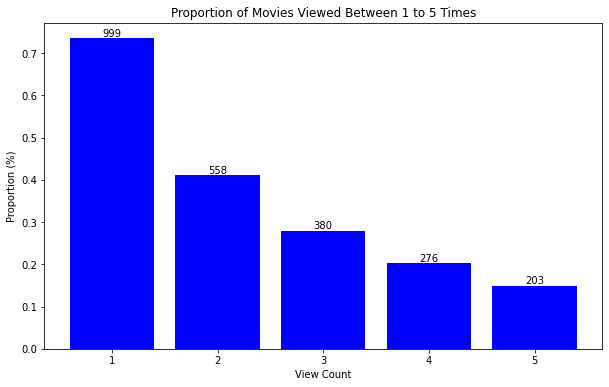

In [84]:
proportions = [(count / len(df_mlb)) * 100 for count in least_1to5]

# Create a list of corresponding labels
labels = ['1', '2', '3', '4', '5']

# Create the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, proportions, color='blue')

# Add data labels
for bar, actual_value in zip(bars, least_1to5):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(actual_value), ha='center', va='bottom')

plt.xlabel('View Count')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Movies Viewed Between 1 to 5 Times')

# Display the histogram
plt.show()


### 4-7: [Need check]The plot demontreated proportions of least viewed movie from 1 to 5 times in the whole dataset, the movies that only viewed by one time is the largest group with much over 0.2%, where as viewed 2, 3, 4, 5 times moives are around 0.14% to 0.5%.

## 4-8.Top 10 longest average watching duration movie (with over 0.1% of view):

#1. count each movie_id played times. 2. Extract those movies played time > len(df_encoded) * 0.1%.  3. After exteacted movie: sum(duration_min) / played times.

In [85]:
#5-8
#1. count each movie_id played times. 
played_time = df_mlb['movie_id'].value_counts()

#2. Extract those movies played time > len(df_encoded) * 0.1%.
qualified_movie_ids = played_time[played_time > (len(df_mlb) * 0.001)].index

#3. Filter the DataFrame to only the qualified movie_ids
filtered_movies = df_mlb[df_mlb['movie_id'].isin(qualified_movie_ids)]

#4. Calculate the average duration per movie_id
average_duration = filtered_movies.groupby(['movie_id', 'title'])['duration_min'].mean()

#5. Sort by duration and take the top 10
top_10_movies = average_duration.sort_values(ascending=False).head(10)

print(top_10_movies)

movie_id    title                   
b993bbb8c8  How to Train Your Dragon    71.429308
c9bc8b1879  Me Before You               67.400606
f20d275d21  Dumplin'                    67.032325
ef96d974df  The Cabin in the Woods      66.985667
117c9dc515  Set It Up                   66.985420
4b61f2fa24  Legally Blonde              66.856618
0eb47c10e6  The Longest Yard            66.718676
9da34e82ee  The Night Before            66.526215
ebac712653  How It Ends                 66.483830
74ef7aad7d  I Am Mother                 66.428252
Name: duration_min, dtype: float64


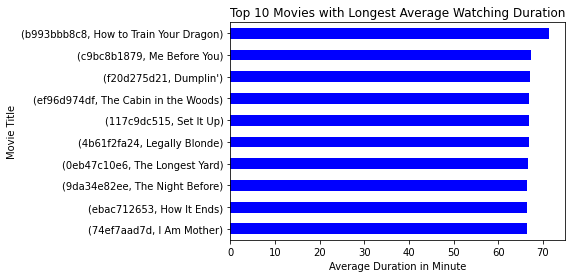

In [86]:
#5-8
# Plot the top 10 movies horizontally
top_10_movies.plot(kind='barh', color='blue')

# Adding labels and title
plt.xlabel('Average Duration in Minute')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with Longest Average Watching Duration')

# Reversing the y-axis to have the movie with the longest duration on top
plt.gca().invert_yaxis()

plt.show()

## 4-9.Most played movie in each daypart:

In [87]:
#5-9. Most played movie in each daypart:
# Group by 'view_daypart' and 'movie_id' and count each movie in each daypart
group_daypart = df_mlb.groupby(['view_daypart', 'movie_id', 'title']).size().reset_index(name='played_times')

group_daypart_sorted = group_daypart.sort_values(['view_daypart', 'played_times'], ascending=[True, False])

# use `drop_duplicates` to keep only the first row for each 'view_daypart', which will be the most played movie in that daypart
most_played = group_daypart_sorted.drop_duplicates('view_daypart')

# sort 'most_played' dataframe by 'played_times' from most to least
most_played = most_played.sort_values('played_times', ascending=False)

most_played

view_daypart    movie_id  \
7647    Prime: late fringe (20:00-22:59)  e847f14da5   
13984               daytime (9:00-17:29)  e847f14da5   
3489   Prime: early fringe (17:30-19:59)  e847f14da5   
16843           late night (23:00-00:29)  e847f14da5   
19534            overnight (00:30-05:59)  e847f14da5   
9768             breakfast (06:00-08:59)  e847f14da5   

                            title  played_times  
7647   Black Mirror: Bandersnatch           498  
13984  Black Mirror: Bandersnatch           440  
3489   Black Mirror: Bandersnatch           280  
16843  Black Mirror: Bandersnatch           158  
19534  Black Mirror: Bandersnatch           146  
9768   Black Mirror: Bandersnatch            24

### 4-9. "Black Miior: Bandersnatch" has dominated the most played movie in each daypart.

## 4-10.Top 100 users with the longest total watching duration:

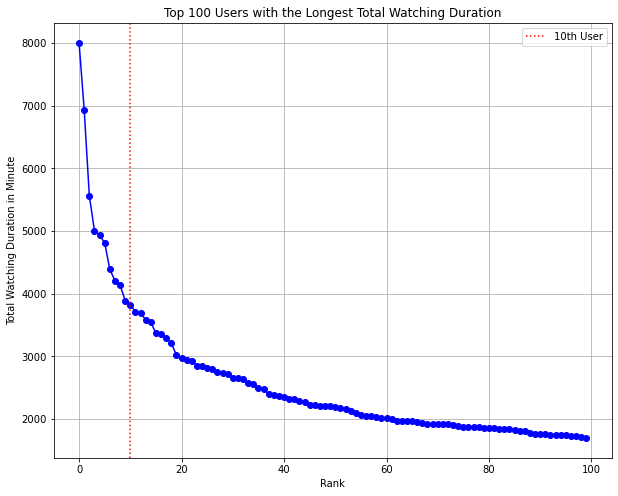

In [88]:
#5-10.
most_duration = df_mlb.groupby('user_id')['duration_min'].sum().nlargest(100)

plt.figure(figsize=(10, 8))  # Setting the figure size
plt.plot(range(len(most_duration)), most_duration, '-o', color='blue')

plt.ylabel('Total Watching Duration in Minute')
plt.xlabel('Rank')
plt.title('Top 100 Users with the Longest Total Watching Duration')
plt.axvline(x=10, color='red', linestyle='dotted', label='10th User')

# Add the legend to the plot
plt.legend()
plt.grid(True)
plt.show()

### [need check]4-10. The user with the most total watching duration is over 8000 minutes. The watching duration from rank 1 to 20 shows a dramatic decrease from over 8000 to about 3000 minutes. After rank 20, the total watching duration reduces steadily from 3000 minutes to less than 2000 mintures.

## 4-11.Ranking of Users by Total Watching Duration:

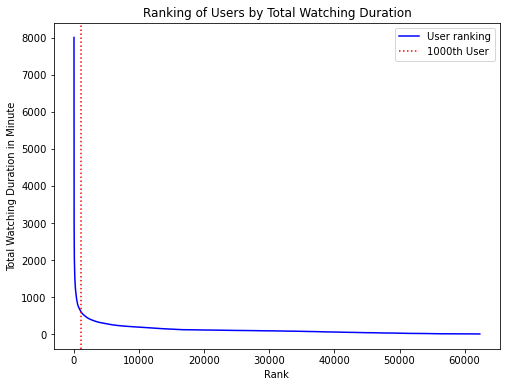

In [89]:
#5-11
all_duration = df_mlb.groupby('user_id')['duration_min'].sum()

plt.figure(figsize=(8, 6))  # Setting the figure size
sorted_all_duration = all_duration.sort_values(ascending=False)

plt.plot(range(len(sorted_all_duration)), sorted_all_duration, '-', label='User ranking', color='blue')

plt.ylabel('Total Watching Duration in Minute')
plt.xlabel('Rank')
plt.title("Ranking of Users by Total Watching Duration")

# Draw the red dotted vertical line at x= 1000
plt.axvline(x=1000, color='red', linestyle='dotted', label='1000th User')

# Add a legend to the plot
plt.legend()

plt.show()

### 4-11. [need check]As the line plot shows the distribution of ranked total watching duration, it demonstrates a very imbalanced trend. The longer watching duration audiences are concentrated among the top 1000 viewers, others watched much less.

# 5.Data Aggregation
Sum dayparts and Viewership Preference Score by each user

In [90]:
df_mlb.columns

Index(['view_year', 'view_month', 'view_day', 'view_time', 'view_daypart',
       'daypart_overnight (00:30-05:59)', 'daypart_late night (23:00-00:29)',
       'daypart_daytime (9:00-17:29)', 'daypart_breakfast (06:00-08:59)',
       'daypart_Prime: late fringe (20:00-22:59)',
       'daypart_Prime: early fringe (17:30-19:59)', 'duration', 'duration_min',
       'title', 'release_year', 'release_month', 'release_day', 'movie_id',
       'user_id', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [91]:
# move user_id and movie_id at the front
df_mlb = df_mlb.reindex(columns = ['user_id',
       'movie_id', 'view_year', 'view_month', 'view_day', 'view_time', 'view_daypart',
       'daypart_overnight (00:30-05:59)','daypart_breakfast (06:00-08:59)', 
       'daypart_daytime (9:00-17:29)', 'daypart_Prime: early fringe (17:30-19:59)',
       'daypart_Prime: late fringe (20:00-22:59)','daypart_late night (23:00-00:29)' ,'duration', 'duration_min',
       'title', 'release_year', 'release_month', 'release_day', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'])

df_mlb

user_id    movie_id  view_year  view_month  view_day view_time  \
0       8e1be40e32  7165c2fc94       2017           1         1  19:43:06   
1       cff8ea652a  c39aae36c3       2017           1         1  19:46:24   
2       759ae2eac9  584bffaf5f       2017           1         1  20:55:46   
3       7726b5615e  416464eaad       2017           1         1  11:05:46   
4       ebf43c36b6  c74aec7673       2017           1         1  16:05:02   
...            ...         ...        ...         ...       ...       ...   
135851  464a7d25b6  09c33ab151       2019           6        30  19:05:57   
135852  d0110d76ef  8600e964f5       2019           6        30  19:23:29   
135853  8a764d662c  8600e964f5       2019           6        30  19:53:16   
135854  e079f16aa0  d8cca7be99       2019           6        30  20:58:53   
135855  57501964fd  43cd23f30f       2019           6        30  21:37:08   

                             view_daypart  daypart_overnight (00:30-05:59)  \
0       Prime: early fringe (17:30-19:59)                              0.0   
1       Prime: early fringe (17:30-19:59)                              0.0   
2        Prime: late fringe (20:00-22:59)                              0.0   
3                    daytime (9:00-17:29)                              0.0   
4                    daytime (9:00-17:29)                              0.0   
...                                   ...                              ...   
135851  Prime: early fringe (17:30-19:59)                              0.0   
135852  Prime: early fringe (17:30-19:59)                              0.0   
135853  Prime: early fringe (17:30-19:59)                              0.0   
135854   Prime: late fringe (20:00-22:59)                              0.0   
135855   Prime: late fringe (20:00-22:59)                              0.0   

        daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  ...  \
0                                   0.0                           0.0  ...   
1                                   0.0                           0.0  ...   
2                                   0.0                           0.0  ...   
3                                   0.0                           1.0  ...   
4                                   0.0                           1.0  ...   
...                                 ...                           ...  ...   
135851                              0.0                           0.0  ...   
135852                              0.0                           0.0  ...   
135853                              0.0                           0.0  ...   
135854                              0.0                           0.0  ...   
135855                              0.0                           0.0  ...   

        News  Reality-TV  Romance  Sci-Fi  Short Sport  Talk-Show  Thriller  \
0        0.0         0.0    0.000     0.0    0.0  0.00      0.000     0.000   
1        0.0         0.0    0.000     0.0    0.0  0.00      0.000     0.562   
2        0.0         0.0    0.000     0.0    0.0  0.00      0.000     0.000   
3        0.0         0.0    0.000     0.0    0.0  0.00      0.000     0.000   
4        0.0         0.0    0.000     0.0    0.0  0.00      0.000     0.000   
...      ...         ...      ...     ...    ...   ...        ...       ...   
135851   0.0         0.0    0.000     0.0    0.0  0.27      0.000     0.000   
135852   0.0         0.0    0.916     0.0    0.0  0.00      0.000     0.000   
135853   0.0         0.0    0.103     0.0    0.0  0.00      0.000     0.000   
135854   0.0         0.0    0.000     0.0    0.0  0.00      0.000     0.000   
135855   0.0         0.0    0.000     0.0    0.0  0.00      0.172     0.000   

        War  Western  
0       0.7      0.0  
1       0.0      0.0  
2       0.0      0.0  
3       0.0      0.0  
4       0.0      0.0  
...     ...      ...  
135851  0.0      0.0  
135852  0.0      0.0  
135853  0.0      0.0  
135854  0.0      0.0  
135855  0.

In [92]:
# Remove not needed columns:
# Only keep the feature that could tell the audience's preference
df_mlb_selected = df_mlb.drop(['movie_id', 'view_year', 'view_month', 'view_day', 'view_time', 'view_daypart', 'duration', 'duration_min', 'title', 'release_year', 'release_month', 'release_day'], axis=1)

df_mlb_selected

user_id  daypart_overnight (00:30-05:59)  \
0       8e1be40e32                              0.0   
1       cff8ea652a                              0.0   
2       759ae2eac9                              0.0   
3       7726b5615e                              0.0   
4       ebf43c36b6                              0.0   
...            ...                              ...   
135851  464a7d25b6                              0.0   
135852  d0110d76ef                              0.0   
135853  8a764d662c                              0.0   
135854  e079f16aa0                              0.0   
135855  57501964fd                              0.0   

        daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                                   0.0                           0.0   
1                                   0.0                           0.0   
2                                   0.0                           0.0   
3                                   0.0                           1.0   
4                                   0.0                           1.0   
...                                 ...                           ...   
135851                              0.0                           0.0   
135852                              0.0                           0.0   
135853                              0.0                           0.0   
135854                              0.0                           0.0   
135855                              0.0                           0.0   

        daypart_Prime: early fringe (17:30-19:59)  \
0                                             1.0   
1                                             1.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
135851                                        1.0   
135852                                        1.0   
135853                                        1.0   
135854                                        0.0   
135855                                        0.0   

        daypart_Prime: late fringe (20:00-22:59)  \
0                                            0.0   
1                                            0.0   
2                                            1.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
135851                                       0.0   
135852                                       0.0   
135853                                       0.0   
135854                                       1.0   
135855                                       1.0   

        daypart_late night (23:00-00:29)  Action  Adventure  Animation  ...  \
0                                    0.0   0.000      0.000        0.0  ...   
1                                    0.0   0.000      0.000        0.0  ...   
2                                    0.0   0.000      0.000        0.0  ...   
3                                    0.0   0.000      0.142        0.0  ...   
4                                    0.0   0.137      0.000        0.0  ...   
...                                  ...     ...        ...        ...  ...   
135851                               0.0   0.000      0.000        0.0  ...   
135852                               0.0   0.916      0.000        0.0  ...   
135853                               0.0   0.103      0.000        0.0  ...   
135854                               0.0   0.000      0.000        0.0  ...   
135855                               0.0   0.000      0.000        0.0  ...   

        News  Reality-TV  Romance  Sci-Fi  Short  Sport  Talk-Show  Thriller  \
0        0.0         0.0    0.000     0.0    0.0   0.00      0.000     0.000   
1        0.0         0.0    0.000     0.0    0.0   0.00      0.000     0.562   
2        0.0         0

In [93]:
# Check an user's viewership
df_mlb_selected[df_mlb_selected['user_id'] == '8e1be40e32']

user_id  daypart_overnight (00:30-05:59)  \
0     8e1be40e32                              0.0   
155   8e1be40e32                              0.0   
326   8e1be40e32                              1.0   
450   8e1be40e32                              1.0   
455   8e1be40e32                              1.0   
537   8e1be40e32                              1.0   
544   8e1be40e32                              1.0   
641   8e1be40e32                              0.0   
691   8e1be40e32                              0.0   
2153  8e1be40e32                              1.0   
2164  8e1be40e32                              1.0   

      daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                                 0.0                           0.0   
155                               0.0                           0.0   
326                               0.0                           0.0   
450                               0.0                           0.0   
455                               0.0                           0.0   
537                               0.0                           0.0   
544                               0.0                           0.0   
641                               0.0                           0.0   
691                               0.0                           0.0   
2153                              0.0                           0.0   
2164                              0.0                           0.0   

      daypart_Prime: early fringe (17:30-19:59)  \
0                                           1.0   
155                                         0.0   
326                                         0.0   
450                                         0.0   
455                                         0.0   
537                                         0.0   
544                                         0.0   
641                                         0.0   
691                                         1.0   
2153                                        0.0   
2164                                        0.0   

      daypart_Prime: late fringe (20:00-22:59)  \
0                                          0.0   
155                                        0.0   
326                                        0.0   
450                                        0.0   
455                                        0.0   
537                                        0.0   
544                                        0.0   
641                                        1.0   
691                                        0.0   
2153                                       0.0   
2164                                       0.0   

      daypart_late night (23:00-00:29)  Action  Adventure  Animation  ...  \
0                                  0.0   0.000        0.0        0.0  ...   
155                                1.0   0.000        0.0        0.0  ...   
326                                0.0   0.000        0.0        0.0  ...   
450                                0.0   0.000        0.0        0.0  ...   
455                                0.0   0.000        0.0        0.0  ...   
537                                0.0   0.000        0.0        0.0  ...   
544                                0.0   0.000        0.0        0.0  ...   
641                                0.0   0.000        0.0        0.0  ...   
691                                0.0   0.000        0.0        0.0  ...   
2153                               0.0   0.109        0.0        0.0  ...   
2164                               0.0   0.000        0.0        0.0  ...   

      News  Reality-TV  Romance  Sci-Fi  Short  Sport  Talk-Show  Thriller  \
0      0.0         0.0    0.000     0.0    0.0    0.0        0.0     0.000   
155    0.0         0.0    0.000     0.0    0.0    0.0        0.0     0.000   
326    0.0         0.0    0.986     0.0    0.0    0.0        0.0     0.000   
450    0.0         0.0    0.000     0.0    0.0    0.0        0.0    

## 5-1.Sum up by each user and create frequency as the number of view times:

In [94]:
# Grouping and summing features except user_id
df_mlb_sum = df_mlb_selected.groupby("user_id").sum().reset_index()

# Create a new feature "frequency" representing the number of rows per user_id
frequency_data = df_mlb_selected.groupby("user_id").size().values
df_mlb_sum.insert(1, "frequency", frequency_data)

df_mlb_sum

user_id  frequency  daypart_overnight (00:30-05:59)  \
0      000052a0a0         13                              0.0   
1      000296842d          2                              1.0   
2      0006ea6b5c          5                              0.0   
3      0008c31833          1                              0.0   
4      000a3ec774          2                              0.0   
...           ...        ...                              ...   
62320  fff92ebc7e          1                              0.0   
62321  fffd345213          1                              0.0   
62322  fffd4d1888          1                              0.0   
62323  fffe7b777b          1                              0.0   
62324  fffeac83be          4                              0.0   

       daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                                  0.0                           2.0   
1                                  0.0                           0.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   
...                                ...                           ...   
62320                              0.0                           0.0   
62321                              1.0                           0.0   
62322                              0.0                           0.0   
62323                              0.0                           1.0   
62324                              0.0                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                            6.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
62320                                        1.0   
62321                                        0.0   
62322                                        1.0   
62323                                        0.0   
62324                                        0.0   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                           4.0   
1                                           1.0   
2                                           3.0   
3                                           0.0   
4                                           2.0   
...                                         ...   
62320                                       0.0   
62321                                       0.0   
62322                                       0.0   
62323                                       0.0   
62324                                       4.0   

       daypart_late night (23:00-00:29)  Action  Adventure  ...  News  \
0                                   1.0   4.202      2.281  ...   0.0   
1                                   0.0   0.000      0.000  ...   0.0   
2                                   2.0   0.987      0.296  ...   0.0   
3                                   1.0   0.000      0.000  ...   0.0   
4                                   0.0   0.000      0.000  ...   0.0   
...                                 ...     ...        ...  ...   ...   
62320                               0.0   0.843      0.000  ...   0.0   
62321                               0.0   0.000      0.569  ...   0.0   
62322                               0.0   0.937      0.000  ...   0.0   
62323                               0.0   0.000      0.000  ...   0.0   
62324                               0.0   0.000      0.000  ...   0.0   

       Reality-TV  Romance  Sci-Fi  Short  Sport  Talk-Show  Thriller    War  \
0             0.0    0.000   3.225    0.0  0.225        0.0     2.978  0.000   
1             0.0    0.000   0.318    0.0  0.000        0.0     0.318  0.000   
2        

## 5-2.Check grouping result:

In [95]:
# Check if the number of viewtimes is the same with the summed data
# Before summed
df_mlb_selected[df_mlb_selected['user_id'] == '000052a0a0']

user_id  daypart_overnight (00:30-05:59)  \
16879  000052a0a0                              0.0   
16906  000052a0a0                              0.0   
16939  000052a0a0                              0.0   
16944  000052a0a0                              0.0   
20337  000052a0a0                              0.0   
20493  000052a0a0                              0.0   
20575  000052a0a0                              0.0   
20625  000052a0a0                              0.0   
20639  000052a0a0                              0.0   
21333  000052a0a0                              0.0   
21732  000052a0a0                              0.0   
21817  000052a0a0                              0.0   
21868  000052a0a0                              0.0   

       daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
16879                              0.0                           0.0   
16906                              0.0                           0.0   
16939                              0.0                           0.0   
16944                              0.0                           1.0   
20337                              0.0                           0.0   
20493                              0.0                           0.0   
20575                              0.0                           0.0   
20625                              0.0                           0.0   
20639                              0.0                           0.0   
21333                              0.0                           0.0   
21732                              0.0                           0.0   
21817                              0.0                           1.0   
21868                              0.0                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  \
16879                                        1.0   
16906                                        0.0   
16939                                        1.0   
16944                                        0.0   
20337                                        0.0   
20493                                        0.0   
20575                                        1.0   
20625                                        0.0   
20639                                        0.0   
21333                                        1.0   
21732                                        1.0   
21817                                        0.0   
21868                                        1.0   

       daypart_Prime: late fringe (20:00-22:59)  \
16879                                       0.0   
16906                                       1.0   
16939                                       0.0   
16944                                       0.0   
20337                                       0.0   
20493                                       1.0   
20575                                       0.0   
20625                                       1.0   
20639                                       1.0   
21333                                       0.0   
21732                                       0.0   
21817                                       0.0   
21868                                       0.0   

       daypart_late night (23:00-00:29)  Action  Adventure  Animation  ...  \
16879                               0.0   0.000      0.000      0.000  ...   
16906                               0.0   0.000      0.000      0.000  ...   
16939                               0.0   0.000      0.000      0.000  ...   
16944                               0.0   0.619      0.000      0.000  ...   
20337                               1.0   0.000      0.320      0.000  ...   
20493                               0.0   0.000      0.239      0.000  ...   
20575                               0.0   0.000      0.195      0.000  ...   
20625                               0.0   0.139      0.000      0.000  ...   
20639                               0.0   0.940      0.000      0.000  ...   
21333               

In [96]:
# summed data
df_mlb_sum[df_mlb_sum['user_id'] == '000052a0a0']

user_id  frequency  daypart_overnight (00:30-05:59)  \
0  000052a0a0         13                              0.0   

   daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                              0.0                           2.0   

   daypart_Prime: early fringe (17:30-19:59)  \
0                                        6.0   

   daypart_Prime: late fringe (20:00-22:59)  daypart_late night (23:00-00:29)  \
0                                       4.0                               1.0   

   Action  Adventure  ...  News  Reality-TV  Romance  Sci-Fi  Short  Sport  \
0   4.202      2.281  ...   0.0         0.0      0.0   3.225    0.0  0.225   

   Talk-Show  Thriller  War  Western  
0        0.0     2.978  0.0      0.0  

[1 rows x 34 columns]

As the two above data showed, the frequency in summed data matched with the rows of data in unsummed data and the sum of dayparts as well.

In [97]:
df_mlb_sum

user_id  frequency  daypart_overnight (00:30-05:59)  \
0      000052a0a0         13                              0.0   
1      000296842d          2                              1.0   
2      0006ea6b5c          5                              0.0   
3      0008c31833          1                              0.0   
4      000a3ec774          2                              0.0   
...           ...        ...                              ...   
62320  fff92ebc7e          1                              0.0   
62321  fffd345213          1                              0.0   
62322  fffd4d1888          1                              0.0   
62323  fffe7b777b          1                              0.0   
62324  fffeac83be          4                              0.0   

       daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                                  0.0                           2.0   
1                                  0.0                           0.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   
...                                ...                           ...   
62320                              0.0                           0.0   
62321                              1.0                           0.0   
62322                              0.0                           0.0   
62323                              0.0                           1.0   
62324                              0.0                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                            6.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
62320                                        1.0   
62321                                        0.0   
62322                                        1.0   
62323                                        0.0   
62324                                        0.0   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                           4.0   
1                                           1.0   
2                                           3.0   
3                                           0.0   
4                                           2.0   
...                                         ...   
62320                                       0.0   
62321                                       0.0   
62322                                       0.0   
62323                                       0.0   
62324                                       4.0   

       daypart_late night (23:00-00:29)  Action  Adventure  ...  News  \
0                                   1.0   4.202      2.281  ...   0.0   
1                                   0.0   0.000      0.000  ...   0.0   
2                                   2.0   0.987      0.296  ...   0.0   
3                                   1.0   0.000      0.000  ...   0.0   
4                                   0.0   0.000      0.000  ...   0.0   
...                                 ...     ...        ...  ...   ...   
62320                               0.0   0.843      0.000  ...   0.0   
62321                               0.0   0.000      0.569  ...   0.0   
62322                               0.0   0.937      0.000  ...   0.0   
62323                               0.0   0.000      0.000  ...   0.0   
62324                               0.0   0.000      0.000  ...   0.0   

       Reality-TV  Romance  Sci-Fi  Short  Sport  Talk-Show  Thriller    War  \
0             0.0    0.000   3.225    0.0  0.225        0.0     2.978  0.000   
1             0.0    0.000   0.318    0.0  0.000        0.0     0.318  0.000   
2        

## 5-3.Check summed data:

In [98]:
#Seperate user_id by saving it
user_id = df_mlb_sum['user_id']

all_features = df_mlb_sum.iloc[:, 1:] # Without user_id
id_features = df_mlb_sum # All features with user_id

# Sum each feature and check if any feature has a sum of 0
features_with_zero_sum = []
for feature in all_features:
    feature_sum = df_mlb_sum[feature].sum()
    if feature_sum == 0:
        features_with_zero_sum.append(feature)

if features_with_zero_sum:
    print("Features with sum of 0:", features_with_zero_sum)
else:
    print("No features have a sum of 0.")

No features have a sum of 0.


In [99]:
user_id

0        000052a0a0
1        000296842d
2        0006ea6b5c
3        0008c31833
4        000a3ec774
            ...    
62320    fff92ebc7e
62321    fffd345213
62322    fffd4d1888
62323    fffe7b777b
62324    fffeac83be
Name: user_id, Length: 62325, dtype: object

In [100]:
all_features.columns

Index(['frequency', 'daypart_overnight (00:30-05:59)',
       'daypart_breakfast (06:00-08:59)', 'daypart_daytime (9:00-17:29)',
       'daypart_Prime: early fringe (17:30-19:59)',
       'daypart_Prime: late fringe (20:00-22:59)',
       'daypart_late night (23:00-00:29)', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western'],
      dtype='object')

## 5-4.Visualise summed data:

### 5-4-1.Frequency:

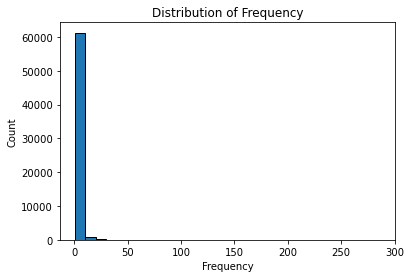

In [101]:
plt.hist(all_features['frequency'], bins=30, edgecolor='black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

### 5-4-2.Daypart:

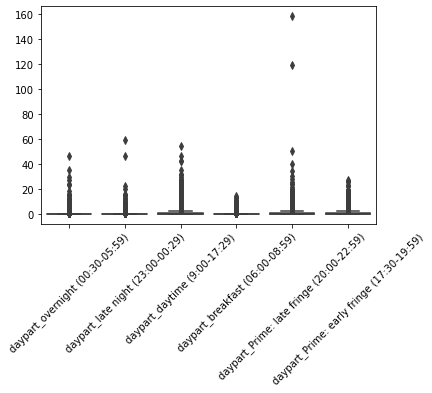

In [102]:
features = [
    'daypart_overnight (00:30-05:59)', 
    'daypart_late night (23:00-00:29)',
    'daypart_daytime (9:00-17:29)',
    'daypart_breakfast (06:00-08:59)',
    'daypart_Prime: late fringe (20:00-22:59)',
    'daypart_Prime: early fringe (17:30-19:59)'
]

sns.boxplot(data=all_features[features])
plt.xticks(rotation=45)
plt.show()

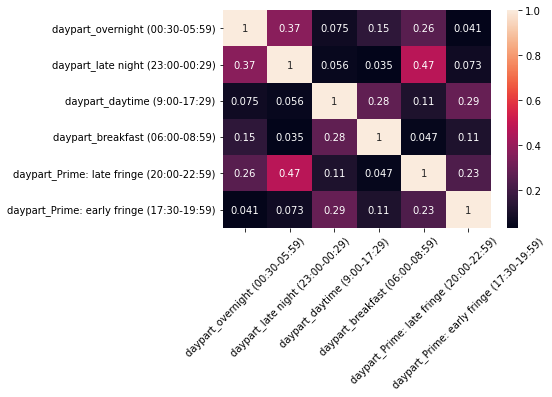

In [103]:
correlation_matrix = all_features[features].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation=45)
plt.show()

### 5-4-3.Visualise distribution of genres: 

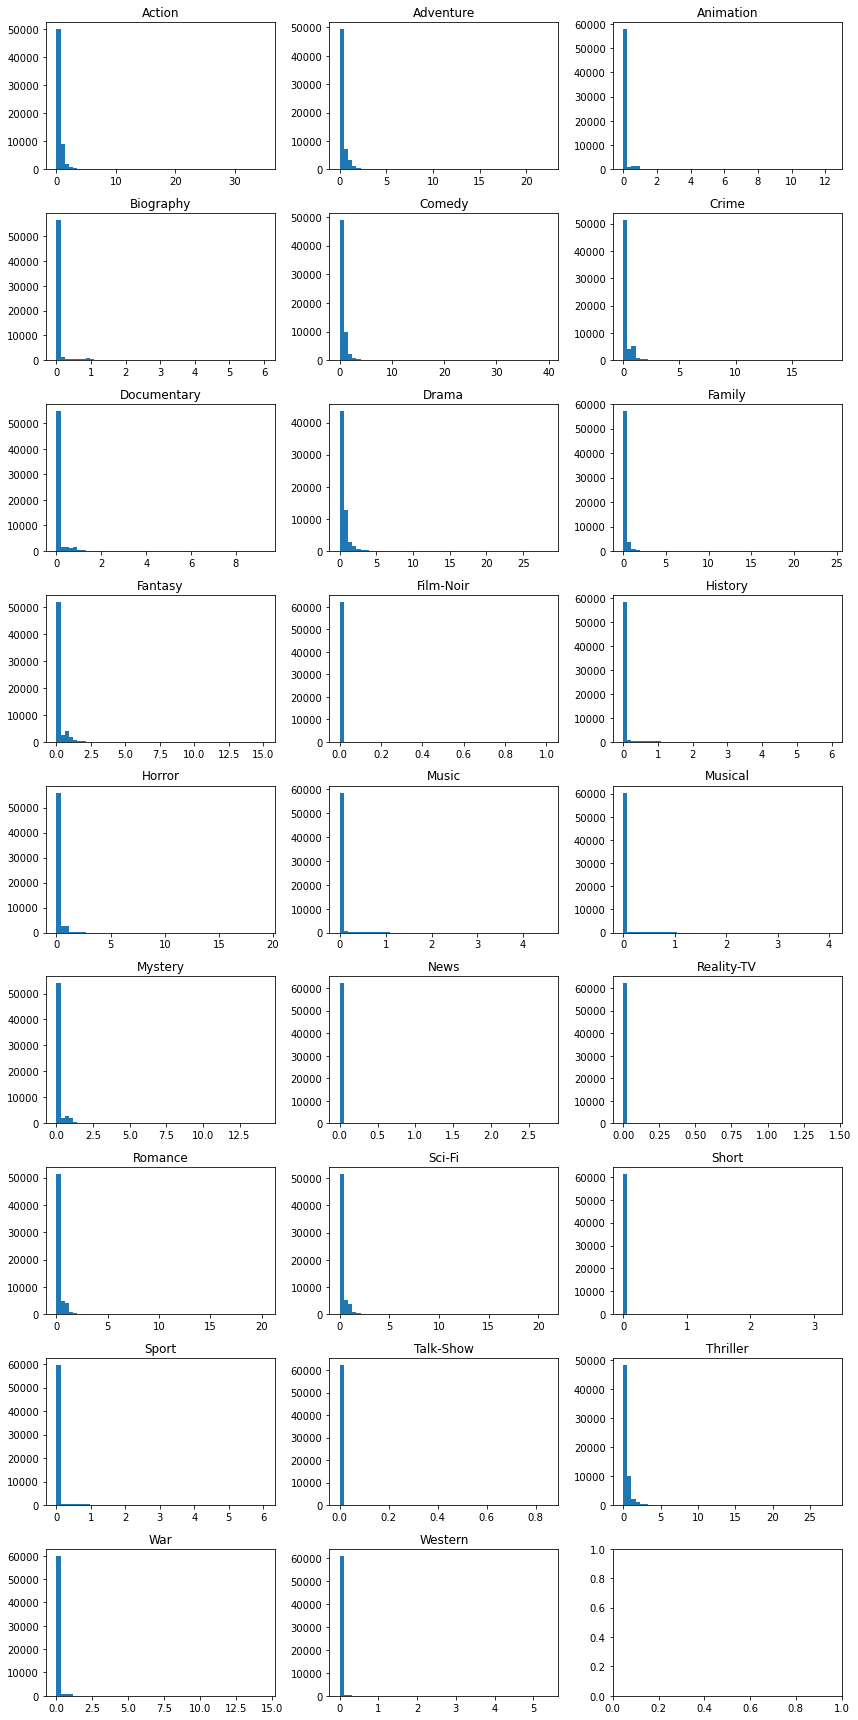

In [104]:
selected_features = all_features.columns[7:35] # Only genre types features, without user_id and any dayparts features

# Creating a grid of 9 rows and 3 columns
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(12, 24))

for idx, feature in enumerate(selected_features):
    row = idx // 3  # Divide by the number of columns to determine the row
    col = idx % 3   # Use modulus with the number of columns to determine the column
    axes[row, col].hist(all_features[feature], bins=50)
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

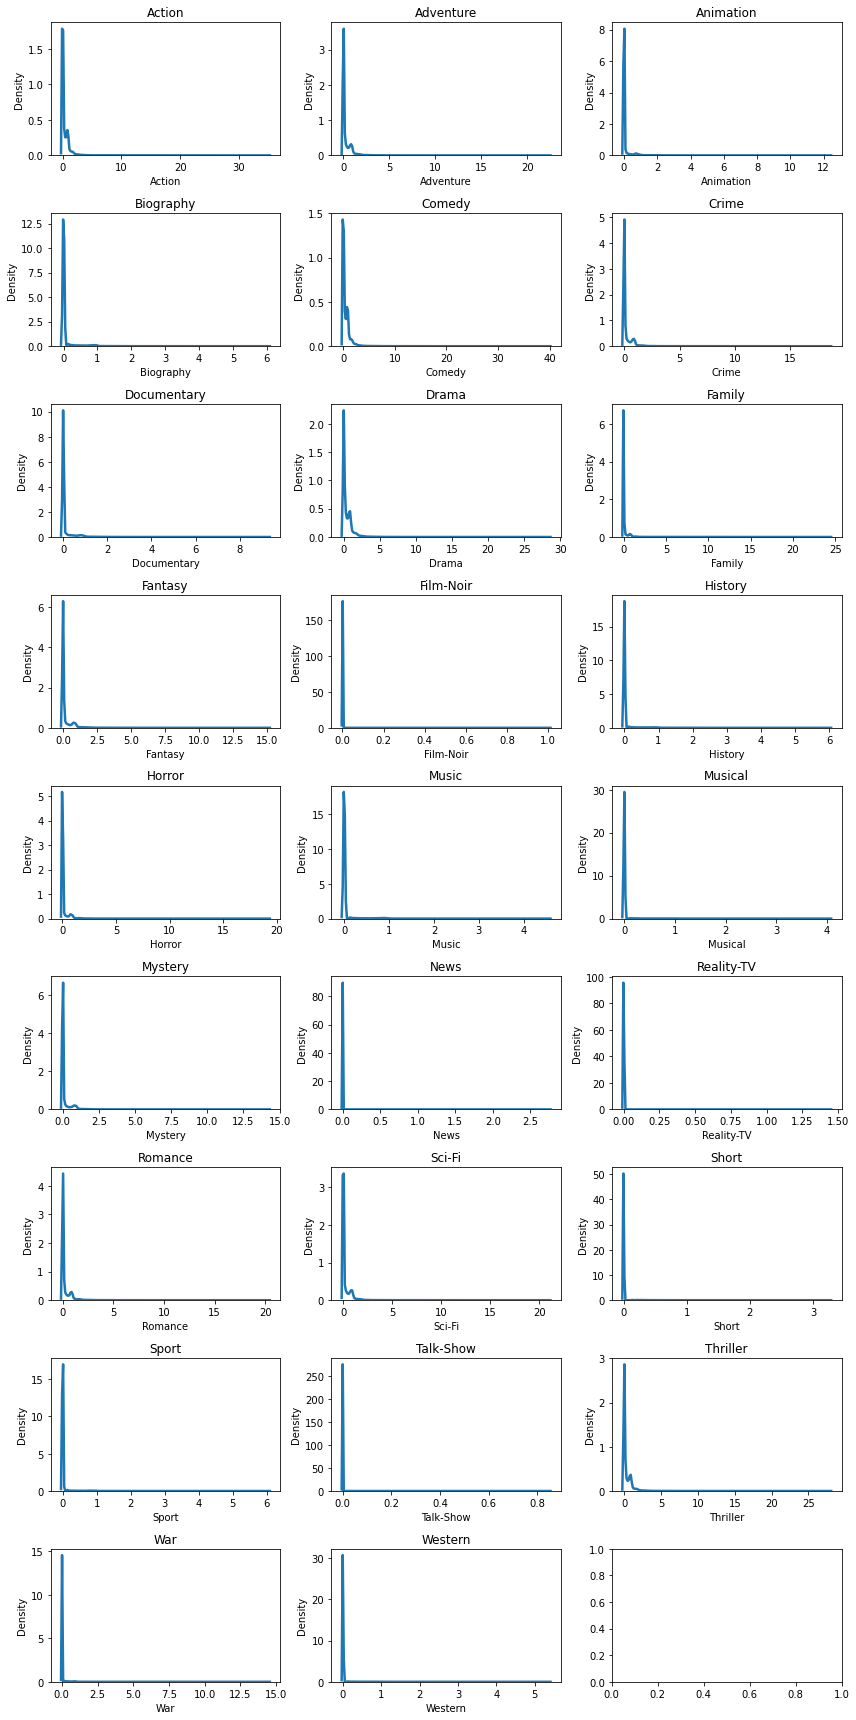

In [105]:
# each genres types distribution by density plot 
# Creating a grid of 9 rows and 3 columns
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(12, 24))

for idx, feature in enumerate(selected_features):
    row = idx // 3  
    col = idx % 3   
    sns.kdeplot(data=all_features, x=feature, ax=axes[row, col], linewidth=2.5)  # Adjust linewidth here
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

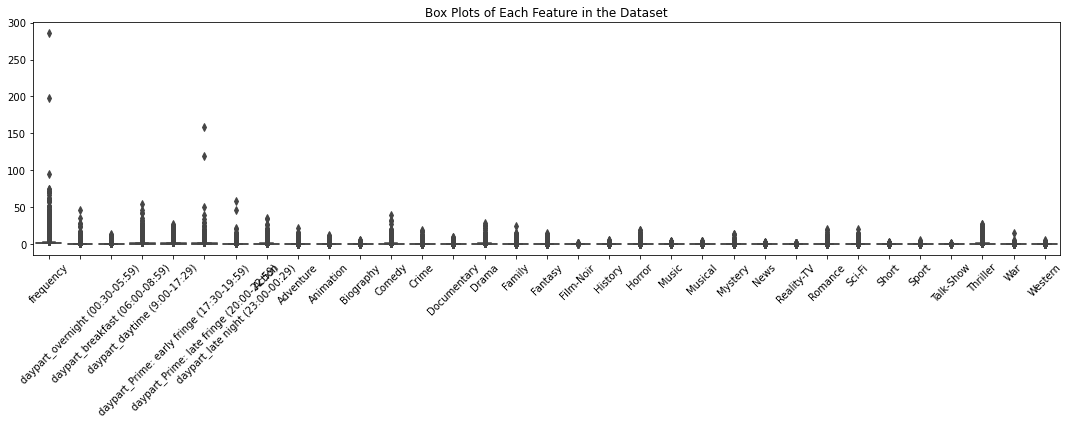

In [106]:
# Create a boxplot matrix
fig, axes = plt.subplots(figsize=(15, 6))
sns.boxplot(data=all_features, ax=axes)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title("Box Plots of Each Feature in the Dataset")
plt.tight_layout()
plt.show()

As the charts showed all the features are distributed near 0, and all the features distribution do not have a Gaussian distribution. It is preferable to use normalisation to the data.

# 6.Feature Scaling

Scaling is important for many clustering algorithms, as they are sensitive to the scales of different features.

In [107]:
all_features

frequency  daypart_overnight (00:30-05:59)  \
0             13                              0.0   
1              2                              1.0   
2              5                              0.0   
3              1                              0.0   
4              2                              0.0   
...          ...                              ...   
62320          1                              0.0   
62321          1                              0.0   
62322          1                              0.0   
62323          1                              0.0   
62324          4                              0.0   

       daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                                  0.0                           2.0   
1                                  0.0                           0.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   
...                                ...                           ...   
62320                              0.0                           0.0   
62321                              1.0                           0.0   
62322                              0.0                           0.0   
62323                              0.0                           1.0   
62324                              0.0                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                            6.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
62320                                        1.0   
62321                                        0.0   
62322                                        1.0   
62323                                        0.0   
62324                                        0.0   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                           4.0   
1                                           1.0   
2                                           3.0   
3                                           0.0   
4                                           2.0   
...                                         ...   
62320                                       0.0   
62321                                       0.0   
62322                                       0.0   
62323                                       0.0   
62324                                       4.0   

       daypart_late night (23:00-00:29)  Action  Adventure  Animation  ...  \
0                                   1.0   4.202      2.281      0.654  ...   
1                                   0.0   0.000      0.000      0.000  ...   
2                                   2.0   0.987      0.296      0.000  ...   
3                                   1.0   0.000      0.000      0.000  ...   
4                                   0.0   0.000      0.000      0.000  ...   
...                                 ...     ...        ...        ...  ...   
62320                               0.0   0.843      0.000      0.000  ...   
62321                               0.0   0.000      0.569      0.000  ...   
62322                               0.0   0.937      0.000      0.000  ...   
62323                               0.0   0.000      0.000      0.000  ...   
62324                               0.0   0.000      0.000      0.000  ...   

       News  Reality-TV  Romance  Sci-Fi  Short  Sport  Talk-Show  Thriller  \
0       0.0         0.0    0.000   3.225    0.0  0.225        0.0     2.978   
1       0.0         0.0    0.000   0.318    0.0  0.000        0.0     0.318   
2       0.0         0.0    0.691   0.902    0.0  0.000        0.0     0.215   
3       0.0   

In [108]:
all_features.describe()

frequency  daypart_overnight (00:30-05:59)  \
count  62325.000000                     62325.000000   
mean       2.179799                         0.159840   
std        3.156435                         0.661667   
min        1.000000                         0.000000   
25%        1.000000                         0.000000   
50%        1.000000                         0.000000   
75%        2.000000                         0.000000   
max      286.000000                        46.000000   

       daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
count                     62325.000000                  62325.000000   
mean                          0.073373                      0.715443   
std                           0.368290                      1.409420   
min                           0.000000                      0.000000   
25%                           0.000000                      0.000000   
50%                           0.000000                      0.000000   
75%                           0.000000                      1.000000   
max                          14.000000                     54.000000   

       daypart_Prime: early fringe (17:30-19:59)  \
count                               62325.000000   
mean                                    0.453221   
std                                     0.938389   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     1.000000   
max                                    27.000000   

       daypart_Prime: late fringe (20:00-22:59)  \
count                              62325.000000   
mean                                   0.616237   
std                                    1.386480   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    1.000000   
max                                  158.000000   

       daypart_late night (23:00-00:29)        Action     Adventure  \
count                      62325.000000  62325.000000  62325.000000   
mean                           0.161685      0.343532      0.251503   
std                            0.605312      0.787649      0.573308   
min                            0.000000      0.000000      0.000000   
25%                            0.000000      0.000000      0.000000   
50%                            0.000000      0.000000      0.000000   
75%                            0.000000      0.491000      0.284000   
max                           59.000000     34.999000     22.315000   

          Animation  ...          News    Reality-TV       Romance  \
count  62325.000000  ...  62325.000000  62325.000000  62325.000000   
mean       0.066795  ...      0.001847      0.001638      0.209444   
std        0.305301  ...      0.037869      0.029243      0.543923   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      0.139000   
max       12.352000  ...      2.756000      1.441000     20.287000   

             Sci-Fi         Short         Sport     Talk-Show      Thriller  \
count  62325.000000  62325.000000  62325.000000  62325.000000  62325.000000   
mean       0.196392      0.006753      0.026131      0.000197      0.320620   
std        0.485481      0.061394      0.147384      0.010820      0.764023   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.139000      0.000000      0.000000      0.000000      0.452000   
max       20.976000     

### (using) 6-1. Quantile Transformer: 
A non-linear transformation, the probability density function of each feature will be mapped to a uniform or Gaussian distribution.

### 6-2. StandardScaler: 
Very sensitive to the presence of outliers.

### 6-3. MinMacScaler: 
Very sensitive to the presence of outliers.

### 6-4. Normalizer

### 6-5. RobustScaler: 
The centering and scaling statistics of RobustScaler are based on percentiles and are therefore not influenced by a small number of very large marginal outliers.

### (using) 6-6. PowerTransformer: BoxCox
Yeo-Johnson and Box-Cox transforms, Box-Cox can only be applied to strictly positive data, ... happen to be strictly positive, but if negative values are present the Yeo-Johnson transformed is preferred.

Note: RobustScaler and QuantileTransformer are robust to outliers in the sense that adding or removing outliers in the training set will yield approximately the same transformation. But contrary to RobustScaler, QuantileTransformer will also automatically collapse any outlier by setting them to the a priori defined range boundaries (0 and 1). This can result in saturation artifacts for extreme values.

Log transform is unsuitable because of zero values in the data that will results in negative infinity (-inf), which is undefined. This can cause problems in mathematical calculations and analyses.

Reference: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [109]:
# orginal features
unscaled_features = id_features

unscaled_features

user_id  frequency  daypart_overnight (00:30-05:59)  \
0      000052a0a0         13                              0.0   
1      000296842d          2                              1.0   
2      0006ea6b5c          5                              0.0   
3      0008c31833          1                              0.0   
4      000a3ec774          2                              0.0   
...           ...        ...                              ...   
62320  fff92ebc7e          1                              0.0   
62321  fffd345213          1                              0.0   
62322  fffd4d1888          1                              0.0   
62323  fffe7b777b          1                              0.0   
62324  fffeac83be          4                              0.0   

       daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                                  0.0                           2.0   
1                                  0.0                           0.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   
...                                ...                           ...   
62320                              0.0                           0.0   
62321                              1.0                           0.0   
62322                              0.0                           0.0   
62323                              0.0                           1.0   
62324                              0.0                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                            6.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
62320                                        1.0   
62321                                        0.0   
62322                                        1.0   
62323                                        0.0   
62324                                        0.0   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                           4.0   
1                                           1.0   
2                                           3.0   
3                                           0.0   
4                                           2.0   
...                                         ...   
62320                                       0.0   
62321                                       0.0   
62322                                       0.0   
62323                                       0.0   
62324                                       4.0   

       daypart_late night (23:00-00:29)  Action  Adventure  ...  News  \
0                                   1.0   4.202      2.281  ...   0.0   
1                                   0.0   0.000      0.000  ...   0.0   
2                                   2.0   0.987      0.296  ...   0.0   
3                                   1.0   0.000      0.000  ...   0.0   
4                                   0.0   0.000      0.000  ...   0.0   
...                                 ...     ...        ...  ...   ...   
62320                               0.0   0.843      0.000  ...   0.0   
62321                               0.0   0.000      0.569  ...   0.0   
62322                               0.0   0.937      0.000  ...   0.0   
62323                               0.0   0.000      0.000  ...   0.0   
62324                               0.0   0.000      0.000  ...   0.0   

       Reality-TV  Romance  Sci-Fi  Short  Sport  Talk-Show  Thriller    War  \
0             0.0    0.000   3.225    0.0  0.225        0.0     2.978  0.000   
1             0.0    0.000   0.318    0.0  0.000        0.0     0.318  0.000   
2        

In [110]:
unscaled_features.describe()

frequency  daypart_overnight (00:30-05:59)  \
count  62325.000000                     62325.000000   
mean       2.179799                         0.159840   
std        3.156435                         0.661667   
min        1.000000                         0.000000   
25%        1.000000                         0.000000   
50%        1.000000                         0.000000   
75%        2.000000                         0.000000   
max      286.000000                        46.000000   

       daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
count                     62325.000000                  62325.000000   
mean                          0.073373                      0.715443   
std                           0.368290                      1.409420   
min                           0.000000                      0.000000   
25%                           0.000000                      0.000000   
50%                           0.000000                      0.000000   
75%                           0.000000                      1.000000   
max                          14.000000                     54.000000   

       daypart_Prime: early fringe (17:30-19:59)  \
count                               62325.000000   
mean                                    0.453221   
std                                     0.938389   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     1.000000   
max                                    27.000000   

       daypart_Prime: late fringe (20:00-22:59)  \
count                              62325.000000   
mean                                   0.616237   
std                                    1.386480   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    1.000000   
max                                  158.000000   

       daypart_late night (23:00-00:29)        Action     Adventure  \
count                      62325.000000  62325.000000  62325.000000   
mean                           0.161685      0.343532      0.251503   
std                            0.605312      0.787649      0.573308   
min                            0.000000      0.000000      0.000000   
25%                            0.000000      0.000000      0.000000   
50%                            0.000000      0.000000      0.000000   
75%                            0.000000      0.491000      0.284000   
max                           59.000000     34.999000     22.315000   

          Animation  ...          News    Reality-TV       Romance  \
count  62325.000000  ...  62325.000000  62325.000000  62325.000000   
mean       0.066795  ...      0.001847      0.001638      0.209444   
std        0.305301  ...      0.037869      0.029243      0.543923   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      0.139000   
max       12.352000  ...      2.756000      1.441000     20.287000   

             Sci-Fi         Short         Sport     Talk-Show      Thriller  \
count  62325.000000  62325.000000  62325.000000  62325.000000  62325.000000   
mean       0.196392      0.006753      0.026131      0.000197      0.320620   
std        0.485481      0.061394      0.147384      0.010820      0.764023   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.139000      0.000000      0.000000      0.000000      0.452000   
max       20.976000     

## 6-1.Quantile transformer:

In [111]:
# Create quantile transformer
quantile_transformer = QuantileTransformer(output_distribution='uniform')

# Fit to the data
quantile_features = quantile_transformer.fit_transform(all_features)

quantile_features

array([[0.98948949, 0.        , 0.        , ..., 0.99055308, 0.        ,
        0.        ],
       [0.68068068, 0.93243243, 0.        , ..., 0.71896897, 0.        ,
        0.        ],
       [0.92642643, 0.        , 0.        , ..., 0.68301635, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.89923257, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70858548, 0.        ,
        0.        ],
       [0.89089089, 0.        , 0.        , ..., 0.        , 0.95895896,
        0.        ]])

In [112]:
data = quantile_features

mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum:", min_value)
print("Maximum:", max_value)

Mean: 0.15541455245006958
Median: 0.0
Standard Deviation: 0.3297431669117394
Minimum: 0.0
Maximum: 1.0


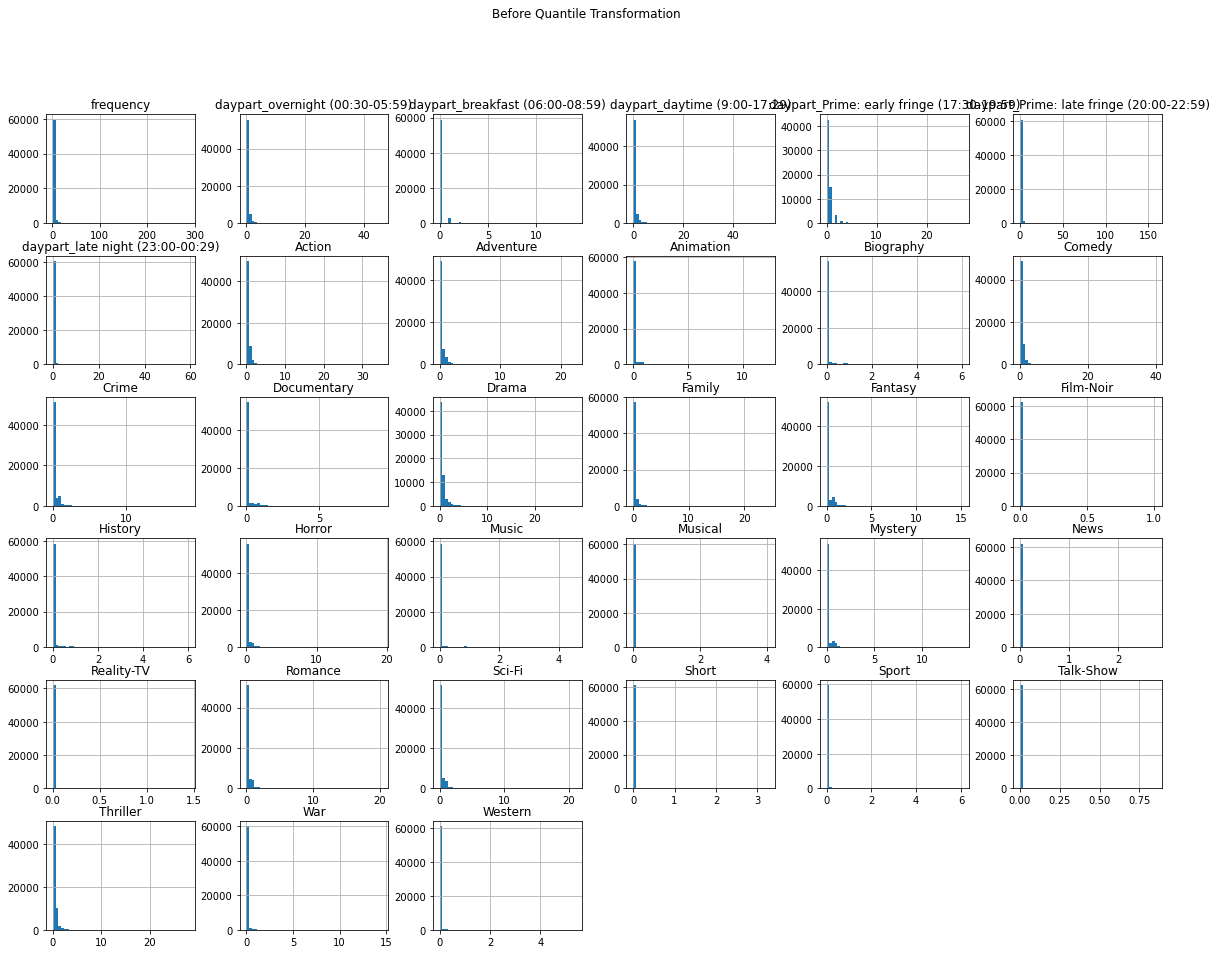

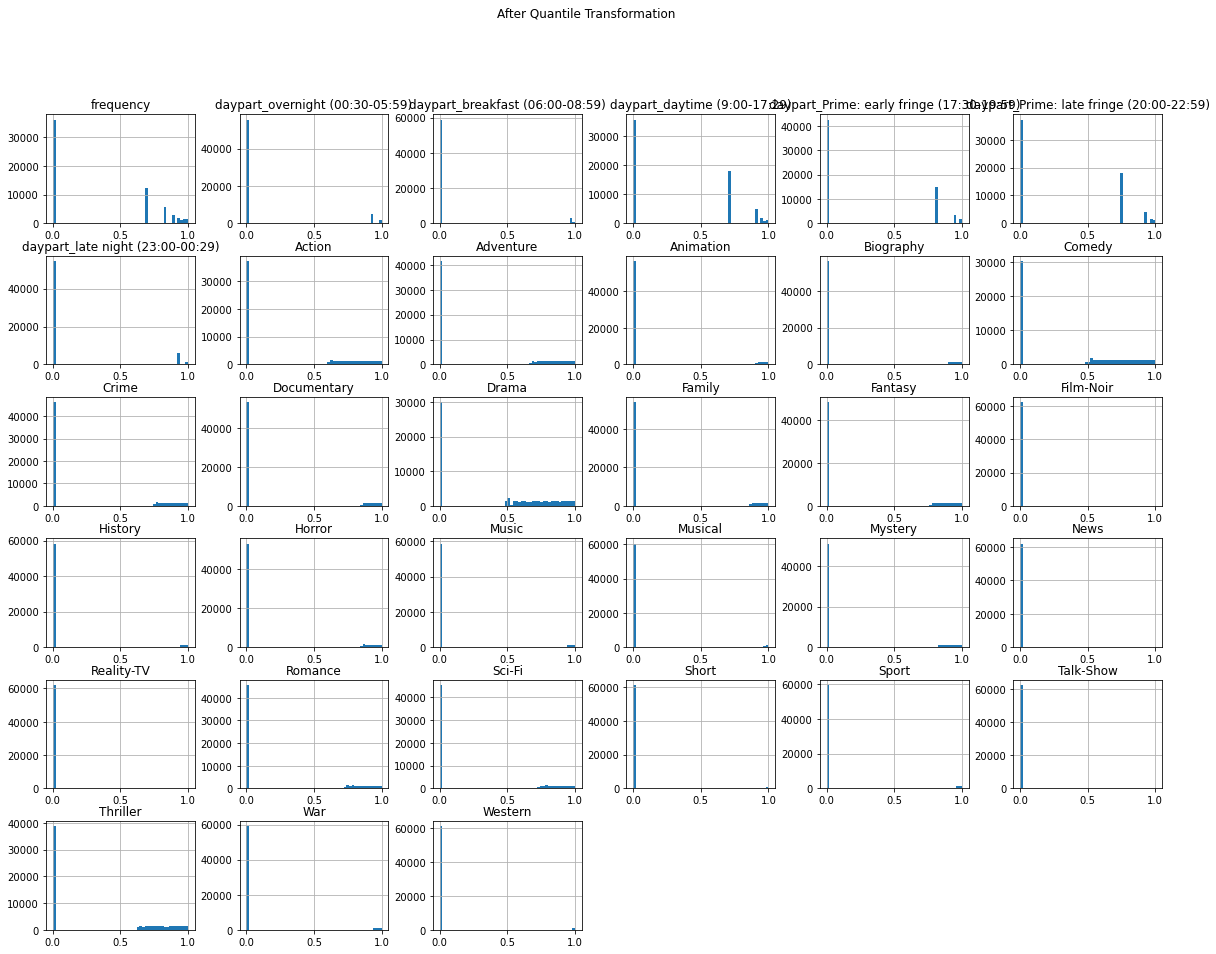

In [113]:
# Plot before transformation
all_features.hist(figsize=(20, 15), bins=50)
plt.suptitle("Before Quantile Transformation")
plt.show()

# Plot after transformation
quantile_features_df = pd.DataFrame(quantile_features, columns=all_features.columns)
quantile_features_df.hist(figsize=(20, 15), bins=50)
plt.suptitle("After Quantile Transformation")
plt.show()

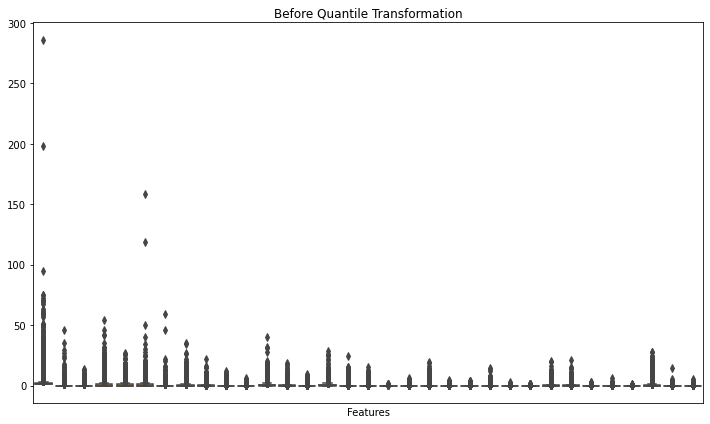

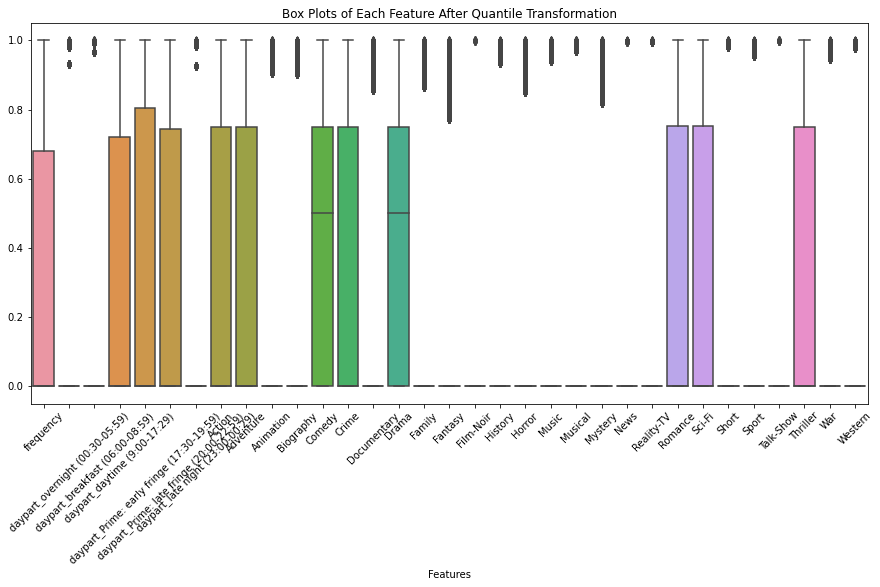

In [114]:
# Plot before transformation
plt.figure(figsize=(12, 7))
sns.boxplot(data=all_features)
plt.title("Before Quantile Transformation")
plt.xticks([])
plt.xlabel("Features")
plt.show()



# Plot after transformation
plt.figure(figsize=(15, 7))
sns.boxplot(data=quantile_features_df)
plt.title("Box Plots of Each Feature After Quantile Transformation")
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.show()

## 6-2.StandardScaler:

In [115]:
scaler = StandardScaler()
standard_features = scaler.fit_transform(all_features)

standard_features

array([[ 3.42800879e+00, -2.41572790e-01, -1.99229077e-01, ...,
         3.47817006e+00, -1.79069971e-01, -1.18334661e-01],
       [-5.69632746e-02,  1.26977274e+00, -1.99229077e-01, ...,
        -3.42904472e-03, -1.79069971e-01, -1.18334661e-01],
       [ 8.93483652e-01, -2.41572790e-01, -1.99229077e-01, ...,
        -1.38242844e-01, -1.79069971e-01, -1.18334661e-01],
       ...,
       [-3.73778917e-01, -2.41572790e-01, -1.99229077e-01, ...,
         8.06762626e-01, -1.79069971e-01, -1.18334661e-01],
       [-3.73778917e-01, -2.41572790e-01, -1.99229077e-01, ...,
        -3.48419689e-02, -1.79069971e-01, -1.18334661e-01],
       [ 5.76668010e-01, -2.41572790e-01, -1.99229077e-01, ...,
        -4.19650291e-01,  1.03803044e+00, -1.18334661e-01]])

In [116]:
data = standard_features

mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum:", min_value)
print("Maximum:", max_value)

Mean: -5.980999459260103e-19
Median: -0.20813985456798462
Standard Deviation: 1.0
Minimum: -0.5368233378814756
Maximum: 113.51406247353269


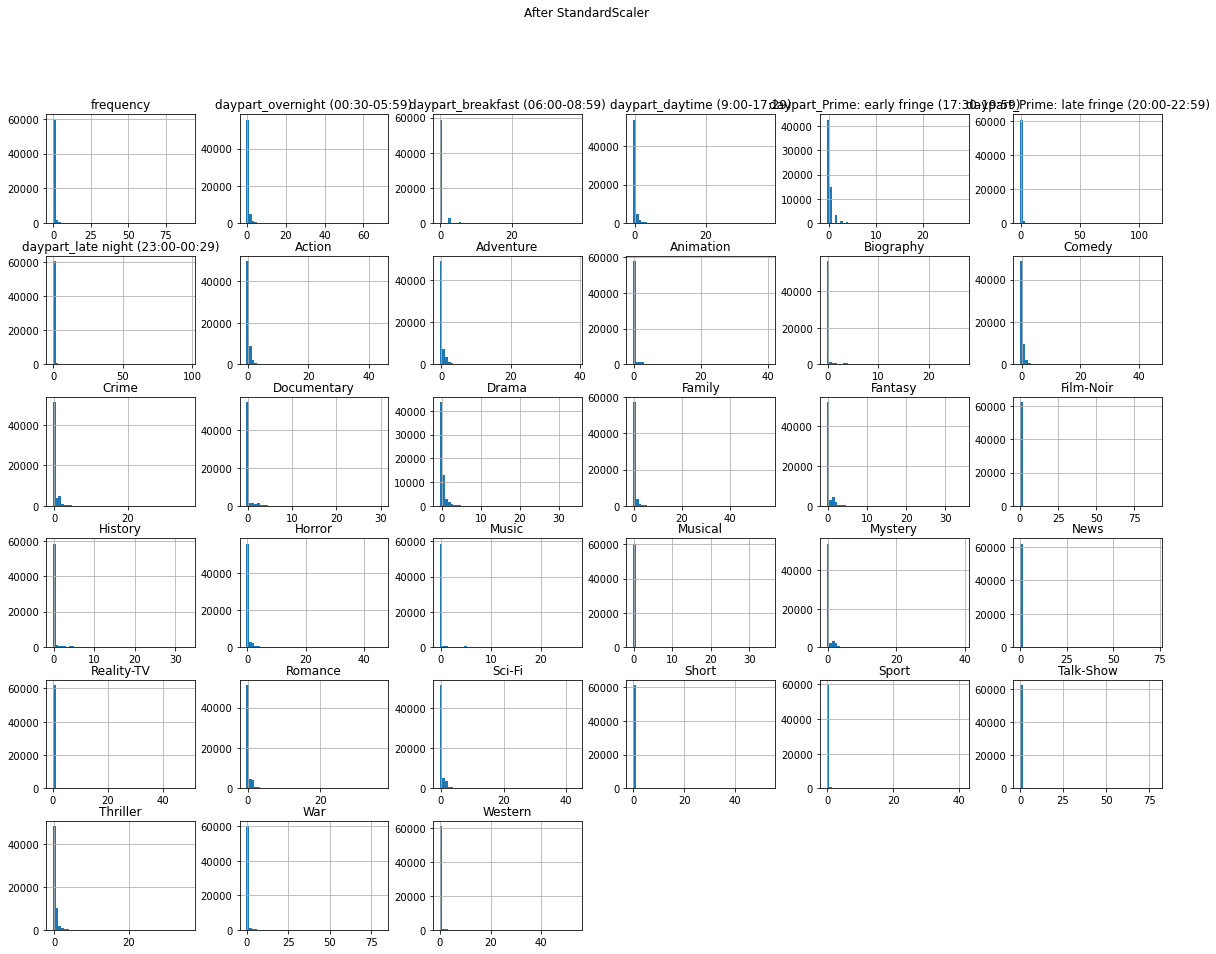

In [117]:
# Plot after StandardScaler
standard_features_df = pd.DataFrame(standard_features, columns=all_features.columns)
standard_features_df.hist(figsize=(20, 15), bins=50)
plt.suptitle("After StandardScaler")
plt.show()

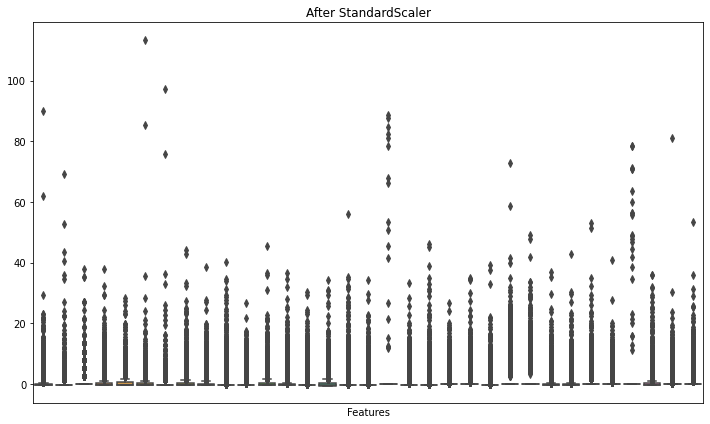

In [118]:
# Plot after StandardScaler
plt.figure(figsize=(12, 7))
sns.boxplot(data=standard_features)
plt.title("After StandardScaler")
plt.xticks([])
plt.xlabel("Features")
plt.show()

## 6-3.MinMaxScaler:

In [119]:
## Creat MinMacScaler and nirmalise duration_min
mms = MinMaxScaler()
minmax_features = mms.fit_transform(all_features)

minmax_features

array([[0.04210526, 0.        , 0.        , ..., 0.1070299 , 0.        ,
        0.        ],
       [0.00350877, 0.02173913, 0.        , ..., 0.01142898, 0.        ,
        0.        ],
       [0.01403509, 0.        , 0.        , ..., 0.00772714, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.03367596, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01056642, 0.        ,
        0.        ],
       [0.01052632, 0.        , 0.        , ..., 0.        , 0.01496758,
        0.        ]])

In [120]:
data = minmax_features

mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum:", min_value)
print("Maximum:", max_value)

Mean: 0.006787878937886151
Median: 0.0
Standard Deviation: 0.0244385050053821
Minimum: 0.0
Maximum: 1.0


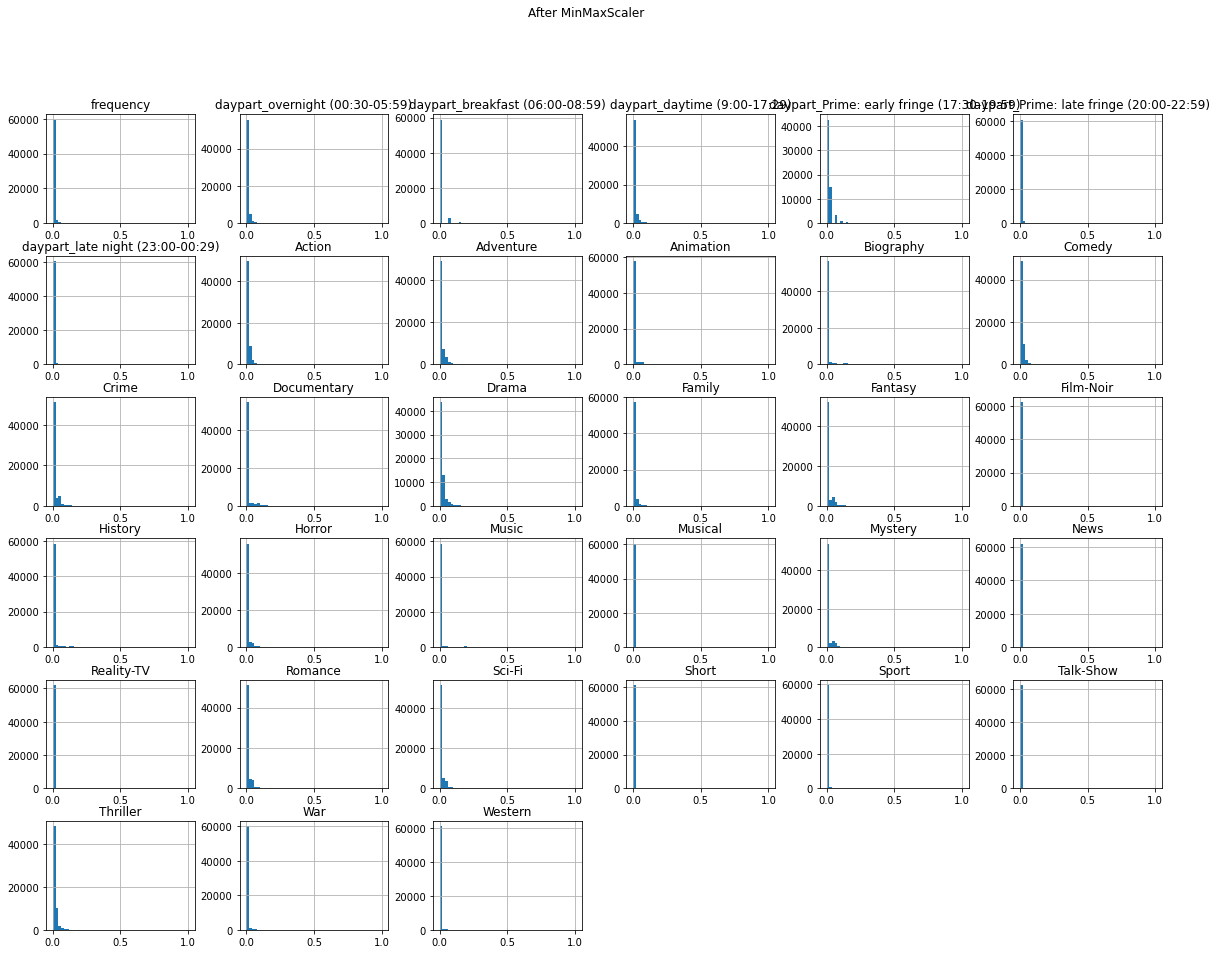

In [121]:
# Plot after MinMaxScaler
minmax_features_df = pd.DataFrame(minmax_features, columns=all_features.columns)
minmax_features_df.hist(figsize=(20, 15), bins=50)
plt.suptitle("After MinMaxScaler")
plt.show()

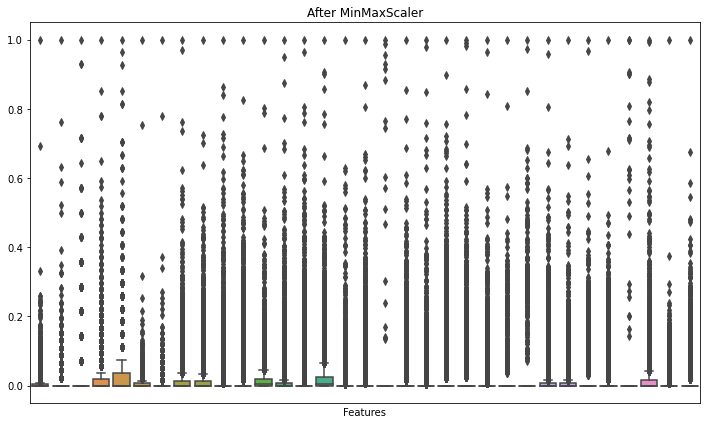

In [122]:
# Plot after MinMaxScaler
plt.figure(figsize=(12, 7))
sns.boxplot(data=minmax_features)
plt.title("After MinMaxScaler")
plt.xticks([])
plt.xlabel("Features")
plt.show()

## 6-4.Normalizer:

In [123]:
normalizer = Normalizer()
normalized_features = normalizer.transform(all_features)

print("Normalized with scikit-learn's Normalizer:")
print(normalized_features)

Normalized with scikit-learn's Normalizer:
[[0.75745886 0.         0.         ... 0.17351634 0.         0.        ]
 [0.79029187 0.39514594 0.         ... 0.12565641 0.         0.        ]
 [0.73827345 0.         0.         ... 0.03174576 0.         0.        ]
 ...
 [0.46454345 0.         0.         ... 0.43527721 0.         0.        ]
 [0.66529197 0.         0.         ... 0.19559584 0.         0.        ]
 [0.6656325  0.         0.         ... 0.         0.03611056 0.        ]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [124]:
data = normalized_features

mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum:", min_value)
print("Maximum:", max_value)

Mean: 0.06536269861926641
Median: 0.0
Standard Deviation: 0.16134047208384286
Minimum: 0.0
Maximum: 0.8979816222327187


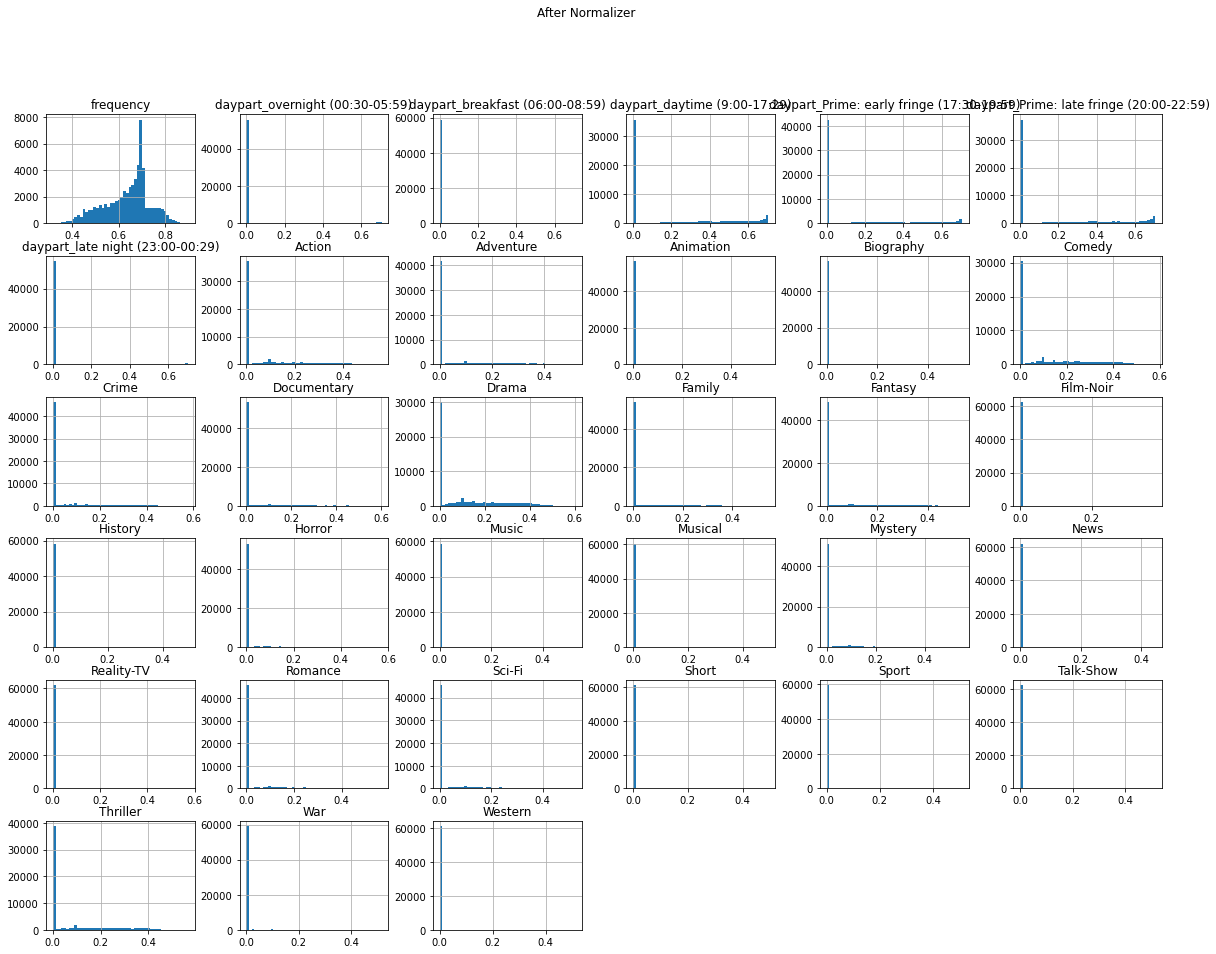

In [125]:
# Plot after Normalizer
normalized_df = pd.DataFrame(normalized_features, columns=all_features.columns)
normalized_df.hist(figsize=(20, 15), bins=50)
plt.suptitle("After Normalizer")
plt.show()

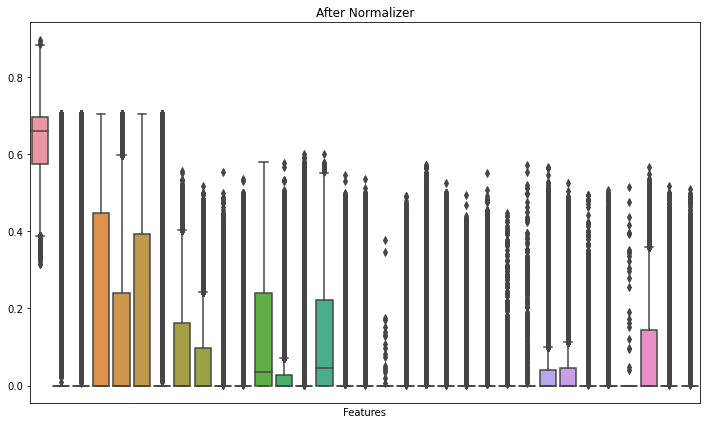

In [126]:
# Box plot after Normalizer
plt.figure(figsize=(12, 7))
sns.boxplot(data=normalized_features)
plt.title("After Normalizer")
plt.xticks([])
plt.xlabel("Features")
plt.show()

## 6-5.RobustScaler:

In [127]:
from sklearn.preprocessing import RobustScaler

In [128]:
# RobustScaler
RobustScaler = RobustScaler()
robustscaler_features = RobustScaler.fit_transform(all_features)

robustscaler_features

array([[12.        ,  0.        ,  0.        , ...,  6.58849558,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  0.        , ...,  0.70353982,
         0.        ,  0.        ],
       [ 4.        ,  0.        ,  0.        , ...,  0.47566372,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  2.07300885,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.65044248,
         0.        ,  0.        ],
       [ 3.        ,  0.        ,  0.        , ...,  0.        ,
         0.217     ,  0.        ]])

In [129]:
data = robustscaler_features

mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum:", min_value)
print("Maximum:", max_value)

Mean: 0.3588707780337667
Median: 0.0
Standard Deviation: 1.5484247685729067
Minimum: -0.1842105263157895
Maximum: 285.0


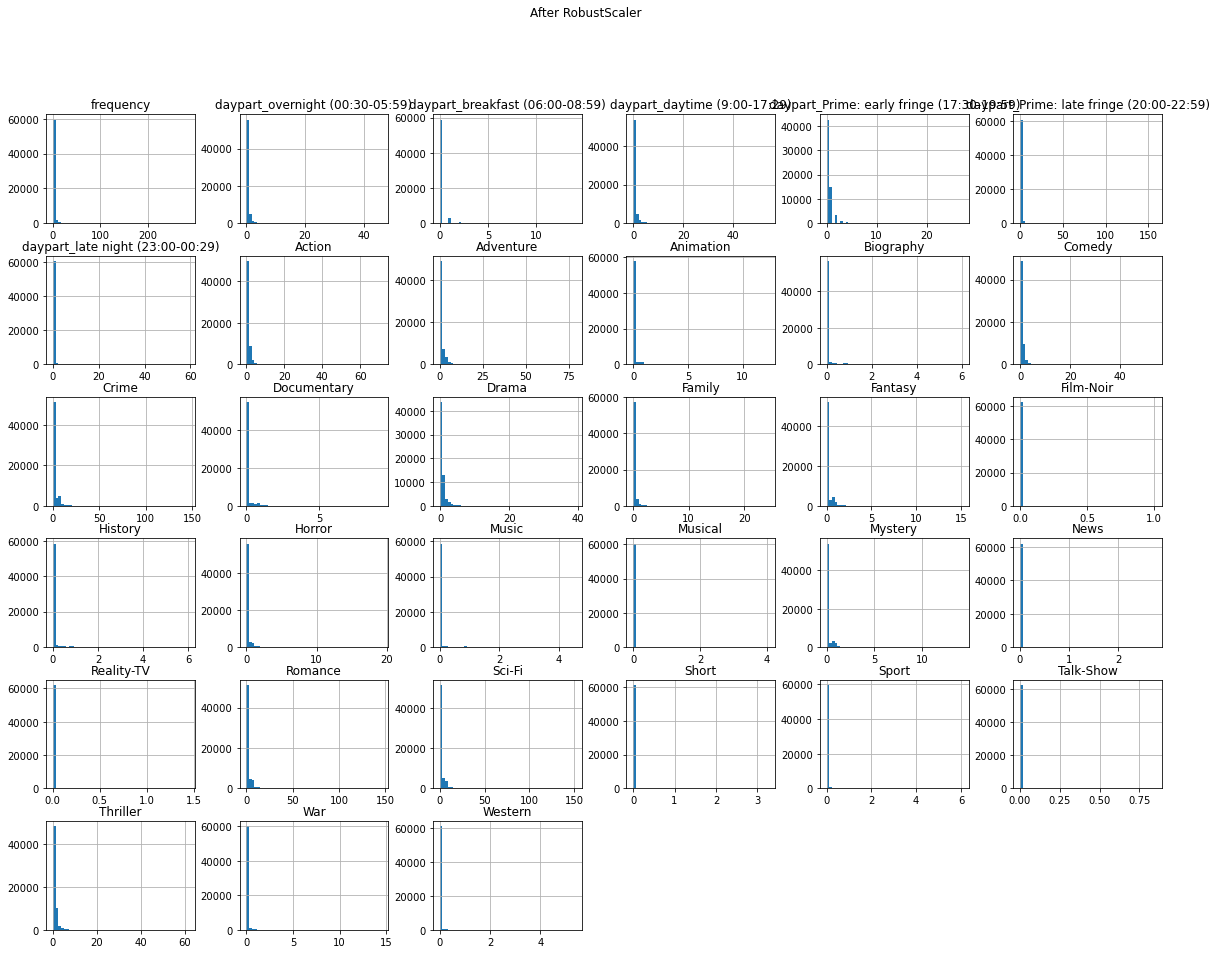

In [130]:
# Plot after RobustScaler
robustscaler_df = pd.DataFrame(robustscaler_features, columns=all_features.columns)
robustscaler_df.hist(figsize=(20, 15), bins=50)
plt.suptitle("After RobustScaler")
plt.show()

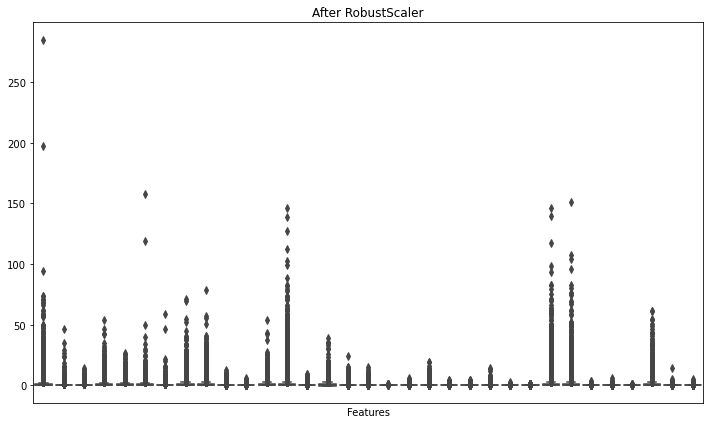

In [131]:
# Box plot after RobustScaler
plt.figure(figsize=(12, 7))
sns.boxplot(data=robustscaler_features)
plt.title("After RobustScaler")
plt.xticks([])
plt.xlabel("Features")
plt.show()

## 6-6.PowerTransformer: BoxCox

In [132]:
selected_features = all_features.columns

boxcox_features = pd.DataFrame()

# as BoxCox trasformer need to apply on positive data, here add one to all the data would be the solution to make the transformer works.
for feature in selected_features:
    transformed_feature, _ = stats.boxcox(all_features[feature] + 1)
    boxcox_features[feature] = transformed_feature
    
boxcox_features

frequency  daypart_overnight (00:30-05:59)  \
0       0.490219                         0.000000   
1       0.439604                         0.091353   
2       0.479580                         0.000000   
3       0.371963                         0.000000   
4       0.439604                         0.000000   
...          ...                              ...   
62320   0.371963                         0.000000   
62321   0.371963                         0.000000   
62322   0.371963                         0.000000   
62323   0.371963                         0.000000   
62324   0.473775                         0.000000   

       daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                             0.000000                      0.556625   
1                             0.000000                      0.000000   
2                             0.000000                      0.000000   
3                             0.000000                      0.000000   
4                             0.000000                      0.000000   
...                                ...                           ...   
62320                         0.000000                      0.000000   
62321                         0.044695                      0.000000   
62322                         0.000000                      0.000000   
62323                         0.000000                      0.441260   
62324                         0.000000                      0.000000   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                       0.353151   
1                                       0.000000   
2                                       0.000000   
3                                       0.000000   
4                                       0.000000   
...                                          ...   
62320                                   0.304398   
62321                                   0.000000   
62322                                   0.304398   
62323                                   0.000000   
62324                                   0.000000   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                      0.564109   
1                                      0.413214   
2                                      0.545090   
3                                      0.000000   
4                                      0.507603   
...                                         ...   
62320                                  0.000000   
62321                                  0.000000   
62322                                  0.000000   
62323                                  0.000000   
62324                                  0.564109   

       daypart_late night (23:00-00:29)    Action  Adventure  Animation  ...  \
0                              0.098525  0.308029   0.216556   0.047099  ...   
1                              0.000000  0.000000   0.000000   0.000000  ...   
2                              0.098611  0.275856   0.151464   0.000000  ...   
3                              0.098525  0.000000   0.000000   0.000000  ...   
4                              0.000000  0.000000   0.000000   0.000000  ...   
...                                 ...       ...        ...        ...  ...   
62320                          0.000000  0.266590   0.000000   0.000000  ...   
62321                          0.000000  0.000000   0.190068   0.000000  ...   
62322                          0.000000  0.272965   0.000000   0.000000  ...   
62323                          0.000000  0.000000   0.000000   0.000000  ...   
62324                          0.000000  0.000000   0.000000   0.000000  ...   

       News  Reality-TV   Romance    Sci-Fi  Short    Sport  Talk-Show  \
0       0.0         0.0  0.000000  0.161060    0.0  0.01938        0.0   
1       0.0         0.0  0.000000  0.132067    0.0  0.00000        0.0   
2       0.0         0.0  0.158986  0.158105    0.0  0.00000        0.0   
3       0.

In [133]:
data = boxcox_features.values.flatten()

mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum:", min_value)
print("Maximum:", max_value)

Mean: 0.04987296882546543
Median: 0.0
Standard Deviation: 0.12015184760644998
Minimum: 0.0
Maximum: 0.7026481980062487


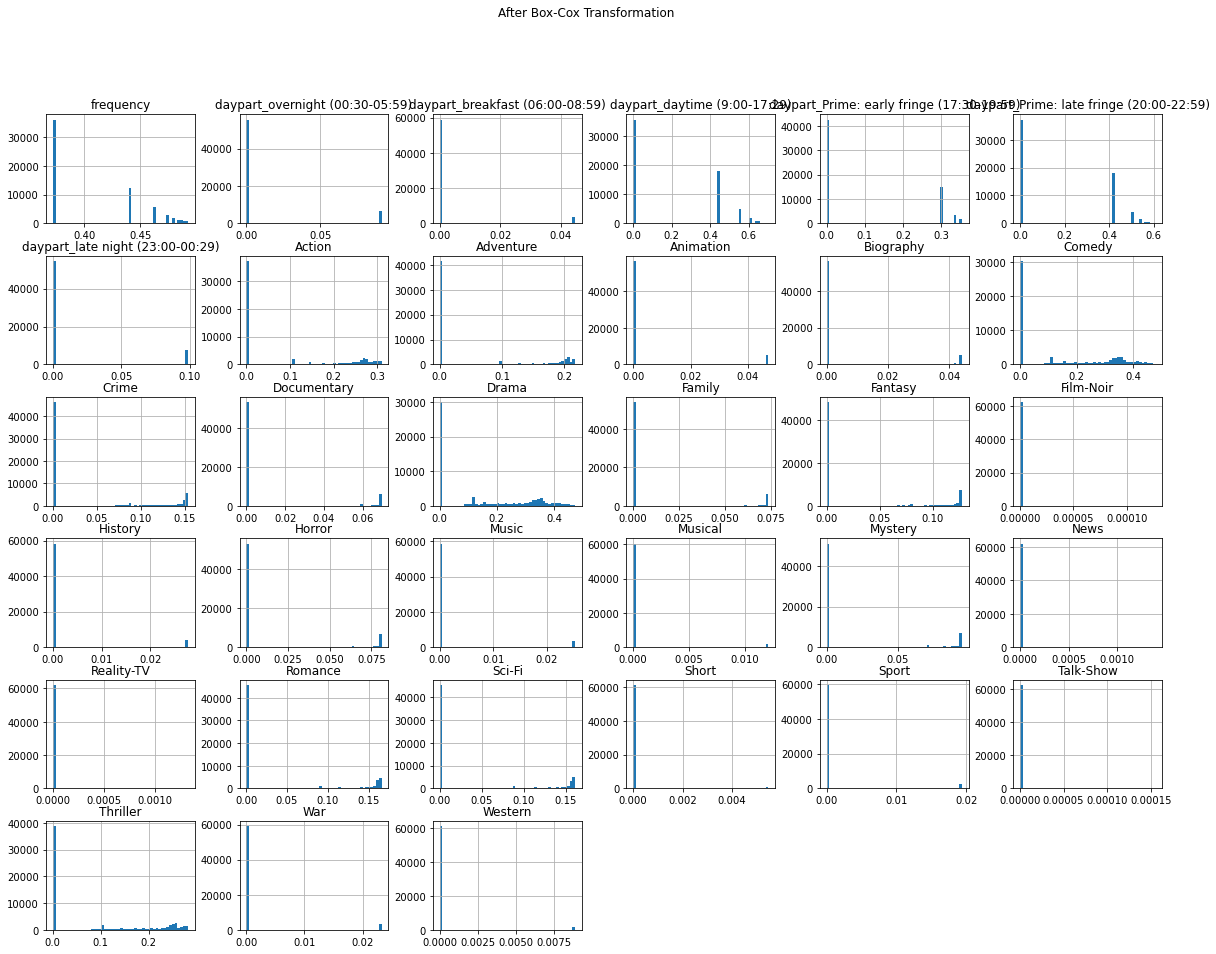

In [134]:
# Plot Box-Cox transformation
boxcox_df = pd.DataFrame(boxcox_features, columns=all_features.columns)
boxcox_df.hist(figsize=(20, 15), bins=50)
plt.suptitle("After Box-Cox Transformation")
plt.show()

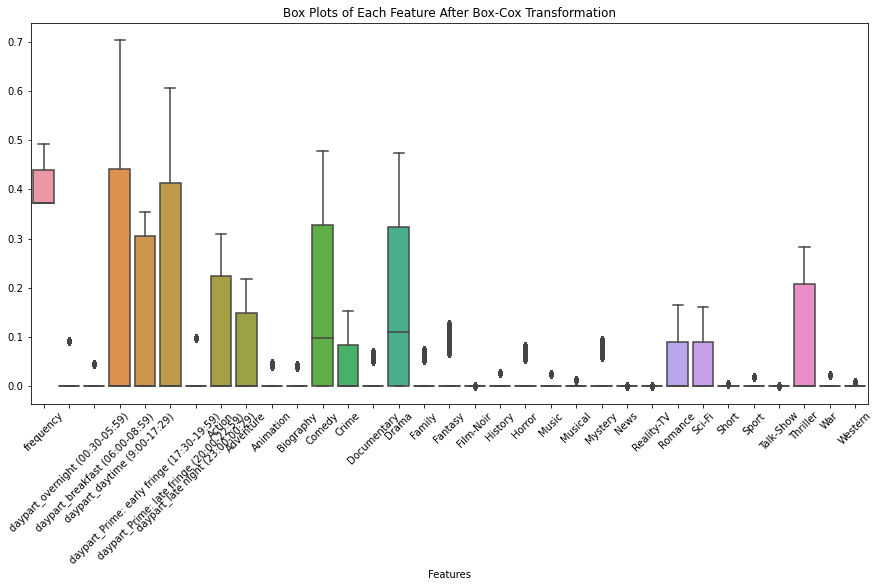

In [135]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=boxcox_features)
plt.title("Box Plots of Each Feature After Box-Cox Transformation")
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.show()

### Scaling outcome:

#### Unscaled_features

#### (using) 1. Quantile_features

#### 2. Standard_features 

#### 3. Minmax_features

#### (using) 4. Normalized_features

#### (using) 5. robustscaler_features

#### (using) 6. boxcox_features

### Decided to use Quantile_features, Normalized_features, robustscaler_features and boxcox_features

# 7.Cluster Models Fitting and Evaluation

#### 1. K-means: 
Easy and effective

#### 2. DBSCAN

#### 3.

# K-means

K-Means Clustering:

Pros:
Simple and easy to implement.
Efficient in terms of computational cost.
Works well for globular clusters.

Cons:
Assumes clusters to be spherical and equally sized, which may not always be the case.
Number of clusters (K) must be specified in advance.
Sensitive to initial centroids.
Not suitable for clusters of different shapes and sizes.

Suitability: For large datasets where clusters are roughly spherical and of similar size.

## K-means Model Fitting Process: 
### 1. Elbow method: determine suitable number of cluser
### 2. Apply K-means cluster model
### 3. Use PCA to reduce dimenstions
### 4. Visualise and stastiscal summary the outcome

## 7-1.K-means with Quantile transformed features:

In [136]:
def calculate_distance(x1, y1, a, b, c):
    """
    Calculate the distance between point (x1, y1) and the line ax + by + c = 0
    """
    return abs(a*x1 + b*y1 + c) / (a**2 + b**2)**0.5

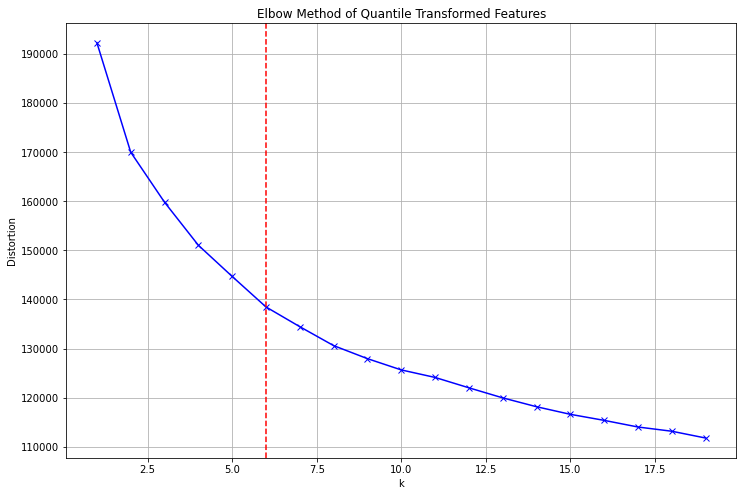

Optimal number of clusters = 6


In [137]:
distortions_quantile = []

K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(quantile_features)
    distortions_quantile.append(kmeanModel.inertia_)

# Coefficients for the line between first and last distortion
a = (distortions_quantile[-1] - distortions_quantile[0])
b = (K[0] - K[-1])
c = (K[-1] * distortions_quantile[0] - K[0] * distortions_quantile[-1])

# Calculate distances to the line for each distortion value
distances = [calculate_distance(k, dist, a, b, c) for k, dist in zip(K, distortions_quantile)]

# Get the optimal number of clusters (the "elbow" in the plot)
optimal_clusters = distances.index(max(distances)) + 1  # +1 because cluster indexing starts from 1

# Plot
plt.figure(figsize=(12,8))
plt.plot(K, distortions_quantile, 'bx-')
plt.axvline(x=optimal_clusters, color='red', linestyle='--')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method of Quantile Transformed Features')
plt.grid(True)
plt.show()

print(f"Optimal number of clusters = {optimal_clusters}")

In [138]:
from sklearn.decomposition import PCA

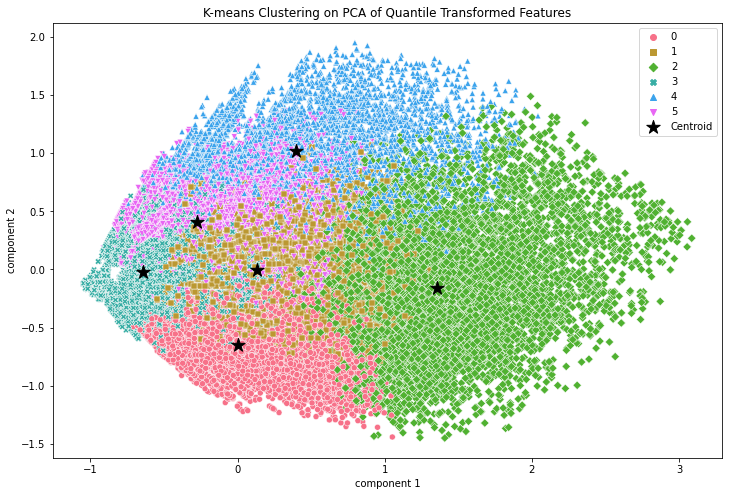

In [139]:
# fit into k-means
kmeans = KMeans(n_clusters=6, random_state=1, n_init=30)
kmeans.fit(quantile_features)

# Reducing dimensions using PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(quantile_features)

# Transform the centroids using PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Converting to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['component 1', 'component 2'])

# Using KMeans labels
principalDf['cluster'] = kmeans.labels_

# Defining custom colors and markers
colors = sns.color_palette("husl", 6) 
markers = ['o', 's', 'D', 'X', '^','v']
# 
# Plotting scatter plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='component 1', y='component 2', hue='cluster', style='cluster', data=principalDf, palette=colors, markers=markers)

# Plotting centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=200, c='black', label='Centroid')
plt.title('K-means Clustering on PCA of Quantile Transformed Features')
plt.legend()
plt.show()


#### K-means with quantile scaled features plot shows the data can be divided into 6 different clusters and evenly distributed across the graph. However there are some different clusters' data points are colliding to each others but the centroids are still pretty clear. Especially, there is an obvious overlap at the left side of the graph with number 2, 4 and 5 clusters, they might have similar patterns.

In [140]:
# Retrieve cluster centroids
centroids_quantile = kmeans.cluster_centers_

# Convert centroids to DataFrame for better visualization
quantile_centroids = pd.DataFrame(centroids_quantile, columns=all_features.columns)
quantile_centroids

frequency  daypart_overnight (00:30-05:59)  \
0   0.251184                         0.089769   
1   0.245428                         0.092972   
2   0.894909                         0.228198   
3   0.133001                         0.076571   
4   0.450044                         0.095303   
5   0.348640                         0.080292   

   daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                         0.033791                      0.269495   
1                         0.045349                      0.296726   
2                         0.131790                      0.615273   
3                         0.034237                      0.252445   
4                         0.088718                      0.434726   
5                         0.046539                      0.322013   

   daypart_Prime: early fringe (17:30-19:59)  \
0                                   0.202776   
1                                   0.215299   
2                                   0.565462   
3                                   0.195436   
4                                   0.298909   
5                                   0.257753   

   daypart_Prime: late fringe (20:00-22:59)  daypart_late night (23:00-00:29)  \
0                                  0.290214                          0.102360   
1                                  0.254113                          0.091206   
2                                  0.615601                          0.273924   
3                                  0.255421                          0.080929   
4                                  0.287607                          0.095884   
5                                  0.322636                          0.103822   

     Action  Adventure  Animation  ...          News  Reality-TV   Romance  \
0  0.340736   0.070580   0.011254  ...  1.096767e-03    0.001567  0.037316   
1  0.727780   0.737240   0.025887  ...  2.218692e-04    0.000776  0.038342   
2  0.755616   0.620743   0.125218  ...  7.479597e-03    0.003149  0.433412   
3  0.075272   0.032406   0.011981  ...  7.944734e-03    0.009676  0.000283   
4  0.286782   0.743231   0.745862  ... -2.025290e-16    0.000741  0.219944   
5  0.054771   0.043716   0.011410  ...  8.249348e-04    0.002201  0.837765   

     Sci-Fi     Short     Sport     Talk-Show  Thriller       War   Western  
0  0.230493  0.003731  0.010961  1.568984e-04  0.760411  0.035974  0.011478  
1  0.607393  0.006931  0.009668 -7.556889e-17  0.238624  0.014660  0.030982  
2  0.557903  0.031268  0.097665  1.313529e-04  0.788103  0.156904  0.062341  
3  0.012339  0.026498  0.080095  1.256235e-03  0.014025  0.063263  0.011234  
4  0.249240  0.058190  0.019788  3.415237e-18  0.080956  0.013927  0.016543  
5  0.034892  0.004188  0.029377  9.182259e-05  0.059678  0.028216  0.017241  

[6 rows x 33 columns]

In [141]:
# 1. Extract column names from the original dataframe, excluding the user_id
columns = all_features.columns

# 2. Convert to DataFrame
quantile_features_df = pd.DataFrame(quantile_features, columns=columns)

# 3. Add cluster labels
quantile_features_df['cluster'] = kmeans.labels_

# 4. Groupby operations
# Compute mean for each feature per cluster
quantile_cluster_mean = quantile_features_df.groupby('cluster').mean()

# Compute standard deviation for each feature per cluster
quantile_cluster_std = quantile_features_df.groupby('cluster').std()

quantile_cluster_mean

frequency  daypart_overnight (00:30-05:59)  \
cluster                                               
0         0.251409                         0.089762   
1         0.245541                         0.092951   
2         0.895004                         0.228408   
3         0.132985                         0.076562   
4         0.449960                         0.095286   
5         0.348693                         0.080285   

         daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
cluster                                                                  
0                               0.033864                      0.269737   
1                               0.045339                      0.296840   
2                               0.131785                      0.615186   
3                               0.034233                      0.252415   
4                               0.088702                      0.434645   
5                               0.046535                      0.321984   

         daypart_Prime: early fringe (17:30-19:59)  \
cluster                                              
0                                         0.202760   
1                                         0.215341   
2                                         0.565643   
3                                         0.195460   
4                                         0.298854   
5                                         0.257819   

         daypart_Prime: late fringe (20:00-22:59)  \
cluster                                             
0                                        0.290192   
1                                        0.254077   
2                                        0.615827   
3                                        0.255435   
4                                        0.287692   
5                                        0.322691   

         daypart_late night (23:00-00:29)    Action  Adventure  Animation  \
cluster                                                                     
0                                0.102352  0.340849   0.070642   0.011254   
1                                0.091186  0.727813   0.737259   0.025776   
2                                0.274176  0.755749   0.620881   0.125333   
3                                0.080919  0.075263   0.032402   0.011979   
4                                0.095866  0.286866   0.743241   0.745899   
5                                0.103813  0.054766   0.043712   0.011409   

         ...      News  Reality-TV   Romance    Sci-Fi     Short     Sport  \
cluster  ...                                                                 
0        ...  0.001097    0.001567  0.037313  0.230549  0.003731  0.010961   
1        ...  0.000222    0.000776  0.038430  0.607166  0.006929  0.009666   
2        ...  0.007486    0.003152  0.433583  0.558293  0.031297  0.097755   
3        ...  0.007944    0.009674  0.000283  0.012338  0.026495  0.080085   
4        ...  0.000000    0.000741  0.219904  0.249349  0.058179  0.019784   
5        ...  0.000825    0.002200  0.837767  0.034888  0.004187  0.029374   

         Talk-Show  Thriller       War   Western  
cluster                                           
0         0.000157  0.760574  0.036125  0.011554  
1         0.000000  0.238728  0.014657  0.030975  
2         0.000131  0.788270  0.156792  0.062270  
3         0.001256  0.014024  0.063255  0.011233  
4         0.000000  0.080940  0.013924  0.016540  
5         0.000092  0.059672  0.028214  0.017239  

[6 rows x 33 columns]

In [142]:
quantile_cluster_std

frequency  daypart_overnight (00:30-05:59)  \
cluster                                               
0         0.349656                         0.276687   
1         0.348135                         0.280918   
2         0.088989                         0.408633   
3         0.281667                         0.256762   
4         0.402161                         0.284536   
5         0.385483                         0.263393   

         daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
cluster                                                                  
0                               0.178032                      0.368646   
1                               0.204734                      0.373837   
2                               0.333644                      0.404190   
3                               0.178800                      0.354120   
4                               0.279975                      0.408729   
5                               0.207372                      0.389384   

         daypart_Prime: early fringe (17:30-19:59)  \
cluster                                              
0                                         0.356010   
1                                         0.363692   
2                                         0.432464   
3                                         0.349100   
4                                         0.407562   
5                                         0.387571   

         daypart_Prime: late fringe (20:00-22:59)  \
cluster                                             
0                                        0.379364   
1                                        0.366256   
2                                        0.405994   
3                                        0.361491   
4                                        0.388391   
5                                        0.393815   

         daypart_late night (23:00-00:29)    Action  Adventure  Animation  \
cluster                                                                     
0                                0.292005  0.389743   0.228116   0.102458   
1                                0.277136  0.207774   0.253303   0.153866   
2                                0.430724  0.317339   0.406228   0.323294   
3                                0.262172  0.227585   0.157266   0.104964   
4                                0.284250  0.386119   0.279574   0.393934   
5                                0.293798  0.197838   0.183563   0.103013   

         ...      News  Reality-TV   Romance    Sci-Fi     Short     Sport  \
cluster  ...                                                                 
0        ...  0.033068    0.039527  0.172544  0.381239  0.060675  0.102893   
1        ...  0.014883    0.027806  0.174908  0.389242  0.082557  0.096751   
2        ...  0.086127    0.055998  0.450216  0.441166  0.173329  0.293744   
3        ...  0.088694    0.097787  0.014967  0.098961  0.159830  0.267925   
4        ...  0.000000    0.027181  0.380741  0.392254  0.232949  0.137620   
5        ...  0.028677    0.046815  0.154001  0.167479  0.064284  0.166941   

         Talk-Show  Thriller       War   Western  
cluster                                           
0         0.012522  0.173742  0.184013  0.106226  
1         0.000000  0.362925  0.118378  0.172275  
2         0.011462  0.282405  0.358631  0.240382  
3         0.035413  0.101011  0.239624  0.104753  
4         0.000000  0.239761  0.115589  0.126832  
5         0.009580  0.206245  0.163202  0.129352  

[6 rows x 33 columns]

In [143]:
# save all k-means clusters in this df
k_means_features = id_features.copy()

# Insert 'K-means_quantile'
k_means_features.insert(1, 'KM_cluster_quantile', quantile_features_df['cluster'])

k_means_features

user_id  KM_cluster_quantile  frequency  \
0      000052a0a0                    2         13   
1      000296842d                    0          2   
2      0006ea6b5c                    2          5   
3      0008c31833                    5          1   
4      000a3ec774                    5          2   
...           ...                  ...        ...   
62320  fff92ebc7e                    5          1   
62321  fffd345213                    4          1   
62322  fffd4d1888                    0          1   
62323  fffe7b777b                    0          1   
62324  fffeac83be                    0          4   

       daypart_overnight (00:30-05:59)  daypart_breakfast (06:00-08:59)  \
0                                  0.0                              0.0   
1                                  1.0                              0.0   
2                                  0.0                              0.0   
3                                  0.0                              0.0   
4                                  0.0                              0.0   
...                                ...                              ...   
62320                              0.0                              0.0   
62321                              0.0                              1.0   
62322                              0.0                              0.0   
62323                              0.0                              0.0   
62324                              0.0                              0.0   

       daypart_daytime (9:00-17:29)  \
0                               2.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   
...                             ...   
62320                           0.0   
62321                           0.0   
62322                           0.0   
62323                           1.0   
62324                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                            6.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
62320                                        1.0   
62321                                        0.0   
62322                                        1.0   
62323                                        0.0   
62324                                        0.0   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                           4.0   
1                                           1.0   
2                                           3.0   
3                                           0.0   
4                                           2.0   
...                                         ...   
62320                                       0.0   
62321                                       0.0   
62322                                       0.0   
62323                                       0.0   
62324                                       4.0   

       daypart_late night (23:00-00:29)  Action  ...  News  Reality-TV  \
0                                   1.0   4.202  ...   0.0         0.0   
1                                   0.0   0.000  ...   0.0         0.0   
2                                   2.0   0.987  ...   0.0         0.0   
3                                   1.0   0.000  ...   0.0         0.0   
4                                   0.0   0.000  ...   0.0         0.0   
...                                 ...     ...  ...   ...         ...   
62320                               0.0   0.843  ...   0.0         0.0   
62321                               0.0   0.000  ...   0.0         0.0   
62322                               0.0   0.937  ...   0.0         0.0   
62323                    

## 7-2.K-means with Normalized features:

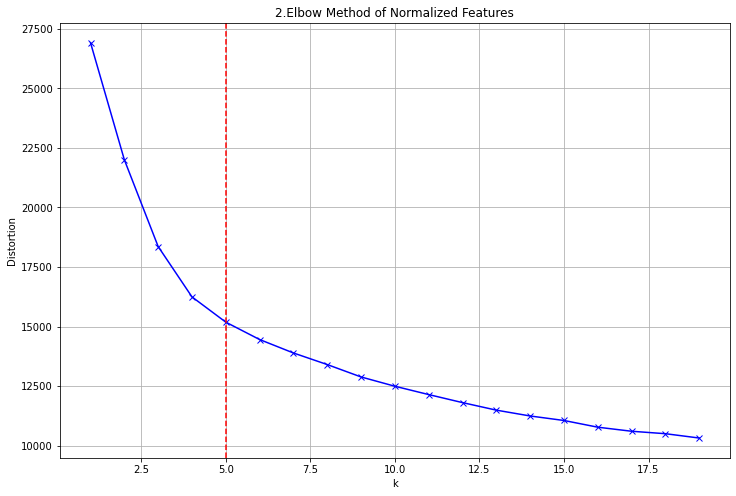

Optimal number of clusters = 5


In [144]:
distortions_normalized = []

K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized_features)
    distortions_normalized.append(kmeanModel.inertia_)

# Coefficients for the line between first and last distortion
a = (distortions_normalized[-1] - distortions_normalized[0])
b = (K[0] - K[-1])
c = (K[-1] * distortions_normalized[0] - K[0] * distortions_normalized[-1])

# Calculate distances to the line for each distortion value
distances = [calculate_distance(k, dist, a, b, c) for k, dist in zip(K, distortions_normalized)]

# Get the optimal number of clusters (the "elbow" in the plot)
optimal_clusters = distances.index(max(distances)) + 1  # +1 because cluster indexing starts from 1

# Plot
plt.figure(figsize=(12,8))
plt.plot(K, distortions_normalized, 'bx-')
plt.axvline(x=optimal_clusters, color='red', linestyle='--')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('2.Elbow Method of Normalized Features')
plt.grid(True)
plt.show()

print(f"Optimal number of clusters = {optimal_clusters}")

In [145]:
from sklearn.decomposition import PCA

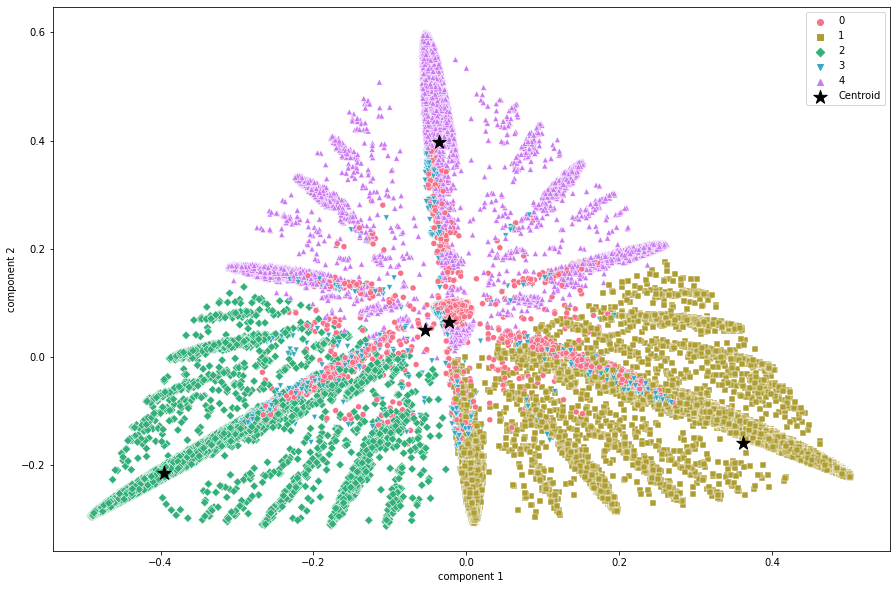

In [146]:
from matplotlib.colors import ListedColormap
# fit into k-means
kmeans = KMeans(n_clusters=5, random_state=0, n_init=30)
kmeans.fit(normalized_features)

# Reducing dimensions using PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_features)

# Transform the centroids using PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Converting to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['component 1', 'component 2'])

# Using KMeans labels
principalDf['cluster'] = kmeans.labels_

# Define a custom palette and markers
custom_palette = ListedColormap(sns.color_palette("husl", 5))
custom_markers = ['o', 's', 'D', 'v', '^']

# Plotting scatter plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='component 1', y='component 2', hue='cluster', style='cluster', data=principalDf, palette=custom_palette, markers=custom_markers)

# Plotting centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=200, c='black', label='Centroid')
plt.legend()
plt.show()

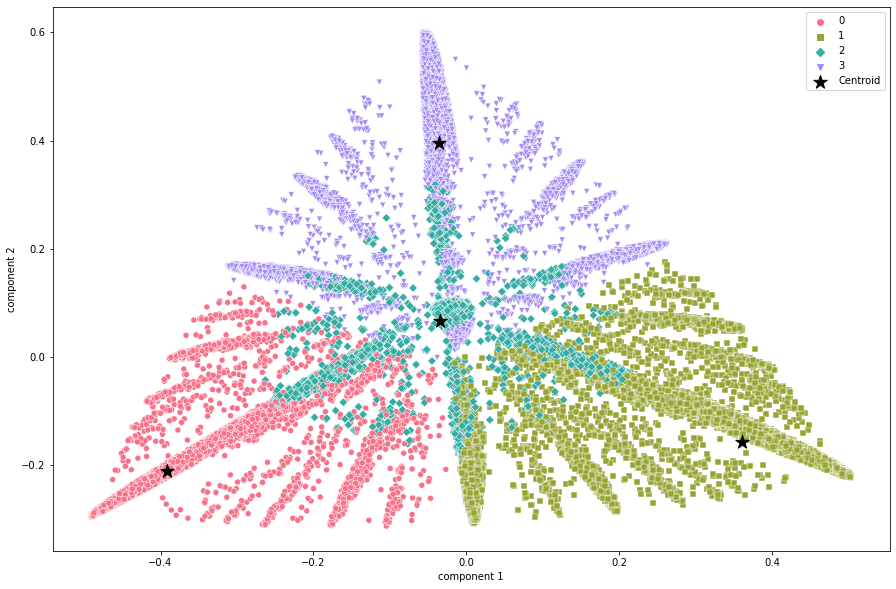

In [147]:
# fit into k-means
kmeans = KMeans(n_clusters=4, random_state=0, n_init=30)
kmeans.fit(normalized_features)

# Reducing dimensions using PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_features)

# Transform the centroids using PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Converting to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['component 1', 'component 2'])

# Using KMeans labels
principalDf['cluster'] = kmeans.labels_

# Define a custom palette and markers
custom_palette = ListedColormap(sns.color_palette("husl", 4))
custom_markers = ['o', 's', 'D', 'v']

# Plotting scatter plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='component 1', y='component 2', hue='cluster', style='cluster', data=principalDf, palette=custom_palette, markers=custom_markers)

# Plotting centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=200, c='black', label='Centroid')
plt.legend()
plt.show()

#### Although the outcome of the elbow method of optimal cluster number is 5, compared with the cluster number of 4, it is much more precise with each cluster with 4. In contrast, the 5 clusters have two of the clusters much closer than any other. Here, 4 clusters will be chosen. 

#### Regarding K-means with normalized features with 4 clusters plot, the clusters are well separated in the graph with three at right, left and top, and the number 2 cluster stays at the centre, which overlaps with all the other clusters. Moreover, the data points are formed like a triangle with a spot in the middle. 

In [148]:
# Retrieve cluster centroids
centroids_normalized = kmeans.cluster_centers_

# Convert centroids to DataFrame for better visualization
normalized_centroids = pd.DataFrame(centroids_normalized, columns=all_features.columns)
normalized_centroids

frequency  daypart_overnight (00:30-05:59)  \
0   0.631676                         0.007005   
1   0.635888                         0.008008   
2   0.640119                         0.244408   
3   0.643122                         0.005946   

   daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                         0.003749                      0.014102   
1                         0.011162                      0.548466   
2                         0.086005                      0.023339   
3                         0.005980                      0.063329   

   daypart_Prime: early fringe (17:30-19:59)  \
0                                   0.015990   
1                                   0.018131   
2                                   0.012121   
3                                   0.497927   

   daypart_Prime: late fringe (20:00-22:59)  daypart_late night (23:00-00:29)  \
0                                  0.572774                          0.018056   
1                                  0.041591                          0.008528   
2                                  0.036491                          0.237757   
3                                  0.061209                          0.008731   

     Action  Adventure  Animation  ...      News  Reality-TV   Romance  \
0  0.080293   0.057689   0.012728  ...  0.000544    0.000792  0.055532   
1  0.087230   0.069717   0.019980  ...  0.000415    0.000740  0.057263   
2  0.101547   0.069011   0.015718  ...  0.000456    0.000899  0.048568   
3  0.091851   0.069435   0.017942  ...  0.000729    0.000738  0.060125   

     Sci-Fi     Short     Sport  Talk-Show  Thriller       War   Western  
0  0.049511  0.001975  0.007610   0.000084  0.081621  0.008697  0.003112  
1  0.053120  0.002516  0.007968   0.000121  0.077639  0.008002  0.003294  
2  0.058115  0.002069  0.007436   0.000147  0.090353  0.008136  0.003436  
3  0.054907  0.002174  0.008007   0.000105  0.083624  0.009071  0.003258  

[4 rows x 33 columns]

In [149]:
# 1. Extract column names from the original dataframe, excluding the user_id
columns = all_features.columns

# 2. Convert to DataFrame
normalized_features_df = pd.DataFrame(normalized_features, columns=columns)

# 3. Add cluster labels
normalized_features_df['cluster'] = kmeans.labels_

# 4. Groupby operations
# Compute mean for each feature per cluster
normalized_cluster_mean = normalized_features_df.groupby('cluster').mean()

# Compute standard deviation for each feature per cluster
normalized_cluster_std = normalized_features_df.groupby('cluster').std()

normalized_cluster_mean

frequency  daypart_overnight (00:30-05:59)  \
cluster                                               
0         0.631698                         0.007057   
1         0.635888                         0.008011   
2         0.640095                         0.244520   
3         0.643117                         0.005952   

         daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
cluster                                                                  
0                               0.003751                      0.014101   
1                               0.011162                      0.548450   
2                               0.086056                      0.023311   
3                               0.005992                      0.063333   

         daypart_Prime: early fringe (17:30-19:59)  \
cluster                                              
0                                         0.015992   
1                                         0.018137   
2                                         0.012062   
3                                         0.497891   

         daypart_Prime: late fringe (20:00-22:59)  \
cluster                                             
0                                        0.572687   
1                                        0.041599   
2                                        0.036307   
3                                        0.061201   

         daypart_late night (23:00-00:29)    Action  Adventure  Animation  \
cluster                                                                     
0                                0.018111  0.080319   0.057685   0.012737   
1                                0.008530  0.087245   0.069725   0.019979   
2                                0.237840  0.101427   0.068995   0.015711   
3                                0.008746  0.091891   0.069444   0.017940   

         ...      News  Reality-TV   Romance    Sci-Fi     Short     Sport  \
cluster  ...                                                                 
0        ...  0.000543    0.000791  0.055568  0.049502  0.001975  0.007607   
1        ...  0.000415    0.000740  0.057261  0.053131  0.002515  0.007967   
2        ...  0.000457    0.000900  0.048517  0.058098  0.002070  0.007442   
3        ...  0.000729    0.000737  0.060117  0.054917  0.002174  0.008006   

         Talk-Show  Thriller       War   Western  
cluster                                           
0         0.000084  0.081634  0.008694  0.003110  
1         0.000121  0.077650  0.008002  0.003294  
2         0.000147  0.090301  0.008141  0.003439  
3         0.000105  0.083635  0.009070  0.003258  

[4 rows x 33 columns]

In [150]:
normalized_cluster_std

frequency  daypart_overnight (00:30-05:59)  \
cluster                                               
0         0.094976                         0.044405   
1         0.095606                         0.046787   
2         0.098661                         0.274338   
3         0.101454                         0.039647   

         daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
cluster                                                                  
0                               0.032863                      0.051737   
1                               0.054453                      0.123889   
2                               0.203931                      0.068230   
3                               0.039923                      0.121086   

         daypart_Prime: early fringe (17:30-19:59)  \
cluster                                              
0                                         0.054382   
1                                         0.056670   
2                                         0.046123   
3                                         0.148111   

         daypart_Prime: late fringe (20:00-22:59)  \
cluster                                             
0                                        0.110838   
1                                        0.101873   
2                                        0.087091   
3                                        0.119862   

         daypart_late night (23:00-00:29)    Action  Adventure  Animation  \
cluster                                                                     
0                                0.070187  0.127756   0.109061   0.054203   
1                                0.047602  0.129840   0.116070   0.066426   
2                                0.273856  0.139888   0.117755   0.059546   
3                                0.047859  0.135099   0.117367   0.063829   

         ...      News  Reality-TV   Romance    Sci-Fi     Short     Sport  \
cluster  ...                                                                 
0        ...  0.012136    0.014721  0.115413  0.104392  0.019506  0.045587   
1        ...  0.009812    0.014318  0.115086  0.106282  0.022076  0.045626   
2        ...  0.010190    0.015288  0.107156  0.110507  0.019051  0.042755   
3        ...  0.013733    0.014548  0.118574  0.108195  0.019908  0.045889   

         Talk-Show  Thriller       War   Western  
cluster                                           
0         0.005065  0.129137  0.046306  0.026603  
1         0.006608  0.124797  0.043705  0.028096  
2         0.007469  0.133000  0.043708  0.028962  
3         0.005740  0.130811  0.046787  0.027399  

[4 rows x 33 columns]

In [151]:
k_means_features.insert(2, 'KM_cluster_normalized', normalized_features_df['cluster'])

k_means_features

user_id  KM_cluster_quantile  KM_cluster_normalized  frequency  \
0      000052a0a0                    2                      3         13   
1      000296842d                    0                      0          2   
2      0006ea6b5c                    2                      0          5   
3      0008c31833                    5                      2          1   
4      000a3ec774                    5                      0          2   
...           ...                  ...                    ...        ...   
62320  fff92ebc7e                    5                      3          1   
62321  fffd345213                    4                      2          1   
62322  fffd4d1888                    0                      3          1   
62323  fffe7b777b                    0                      1          1   
62324  fffeac83be                    0                      0          4   

       daypart_overnight (00:30-05:59)  daypart_breakfast (06:00-08:59)  \
0                                  0.0                              0.0   
1                                  1.0                              0.0   
2                                  0.0                              0.0   
3                                  0.0                              0.0   
4                                  0.0                              0.0   
...                                ...                              ...   
62320                              0.0                              0.0   
62321                              0.0                              1.0   
62322                              0.0                              0.0   
62323                              0.0                              0.0   
62324                              0.0                              0.0   

       daypart_daytime (9:00-17:29)  \
0                               2.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   
...                             ...   
62320                           0.0   
62321                           0.0   
62322                           0.0   
62323                           1.0   
62324                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                            6.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
62320                                        1.0   
62321                                        0.0   
62322                                        1.0   
62323                                        0.0   
62324                                        0.0   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                           4.0   
1                                           1.0   
2                                           3.0   
3                                           0.0   
4                                           2.0   
...                                         ...   
62320                                       0.0   
62321                                       0.0   
62322                                       0.0   
62323                                       0.0   
62324                                       4.0   

       daypart_late night (23:00-00:29)  ...  News  Reality-TV  Romance  \
0                                   1.0  ...   0.0         0.0    0.000   
1                                   0.0  ...   0.0         0.0    0.000   
2                                   2.0  ...   0.0         0.0    0.691   
3                                   1.0  ...   0.0         0.0    0.139   
4                                   0.0  ...   0.0         0.0    0.387   
...                                 ...

## 7-3.K-means with Robustly scaled features:

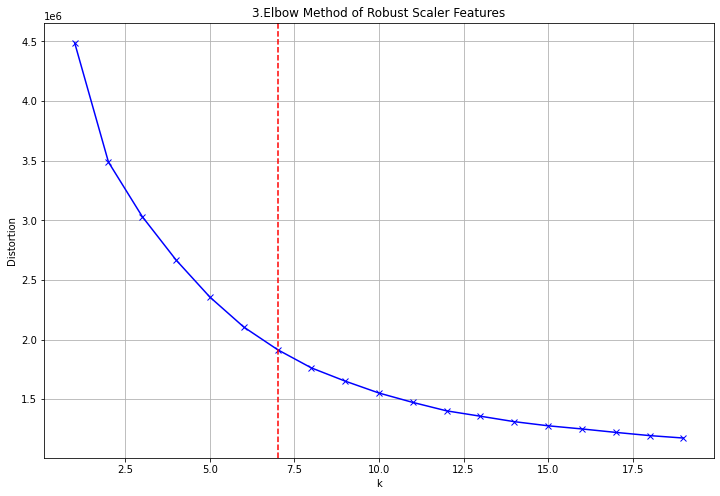

Optimal number of clusters = 7


In [152]:
distortions_robustscaler = []

K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(robustscaler_features)
    distortions_robustscaler.append(kmeanModel.inertia_)

# Coefficients for the line between first and last distortion
a = (distortions_robustscaler[-1] - distortions_robustscaler[0])
b = (K[0] - K[-1])
c = (K[-1] * distortions_robustscaler[0] - K[0] * distortions_robustscaler[-1])

# Calculate distances to the line for each distortion value
distances = [calculate_distance(k, dist, a, b, c) for k, dist in zip(K, distortions_robustscaler)]

# Get the optimal number of clusters (the "elbow" in the plot)
optimal_clusters = distances.index(max(distances)) + 1  # +1 because cluster indexing starts from 1

# Plot
plt.figure(figsize=(12,8))
plt.plot(K, distortions_robustscaler, 'bx-')
plt.axvline(x=optimal_clusters, color='red', linestyle='--')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('3.Elbow Method of Robust Scaler Features')
plt.grid(True)
plt.show()

print(f"Optimal number of clusters = {optimal_clusters}")

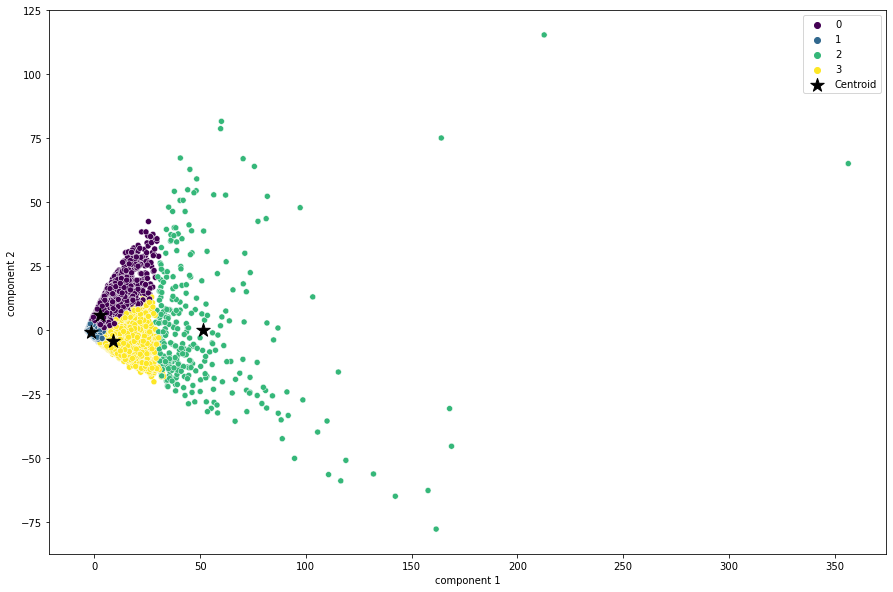

In [153]:
# fit into k-means
kmeans = KMeans(n_clusters = 4, random_state = 1, n_init= 10)
kmeans.fit(robustscaler_features)

# Reducing dimensions using PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(robustscaler_features)

# Transform the centroids using PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Converting to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['component 1', 'component 2'])

# Using KMeans labels
principalDf['cluster'] = kmeans.labels_

# Plotting scatter plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='component 1', y='component 2', hue='cluster', data=principalDf, palette='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=200, c='black', label='Centroid')
plt.legend()
plt.show()

#### Although the elbow method suggests that the optimal cluster is 7, centroids are overlapping, and it could be the fact that clusters are not meaningfully distinct. Thus, retesting different numbers of centroids was operated and found since 4 clusters, the overlapping situation was dismissed. 

#### K-means with robust scaler features plot spread data into 4 clusters. Clusters 0, 1 and 3 are much similar as they are very close to each other and gathered on the left side of the graph, whereas cluster 2 has data that distribute at the top, bottom and right, and the distances between data points are much wild spread.

In [154]:
# Retrieve cluster centroids
centroids_robustscaler = kmeans.cluster_centers_

# Convert centroids to DataFrame for better visualization
robustscaler_centroids = pd.DataFrame(centroids_robustscaler, columns=all_features.columns)
robustscaler_centroids

frequency  daypart_overnight (00:30-05:59)  \
0   2.036448                         0.187133   
1   0.499682                         0.107652   
2  27.477564                         2.522436   
3   4.738614                         0.473861   

   daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                         0.095646                      1.032657   
1                         0.047328                      0.480804   
2                         1.423077                      9.826923   
3                         0.205545                      1.905743   

   daypart_Prime: early fringe (17:30-19:59)  \
0                                   0.652030   
1                                   0.312255   
2                                   5.195513   
3                                   1.200198   

   daypart_Prime: late fringe (20:00-22:59)  daypart_late night (23:00-00:29)  \
0                                  0.858488                          0.210494   
1                                  0.437781                          0.113862   
2                                  7.243590                          2.266026   
3                                  1.538614                          0.414653   

      Action  Adventure  Animation  ...      News  Reality-TV    Romance  \
0   0.377177   0.757312   0.084332  ...  0.000687    0.000914   8.010746   
1   0.442663   0.572832   0.045224  ...  0.001774    0.001802   0.282423   
2  11.512925  11.876241   0.909529  ...  0.009205    0.002176  20.714790   
3   3.036469   3.435529   0.194733  ...  0.003970    0.001187   1.618504   

      Sci-Fi     Short     Sport     Talk-Show   Thriller       War   Western  
0   0.616320  0.003784  0.031859  2.103718e-05   0.441544  0.030060  0.012461  
1   0.870667  0.006174  0.020835  2.479144e-04   0.455888  0.024263  0.008436  
2  18.021490  0.044266  0.275026 -6.505213e-19  12.646628  0.407423  0.186112  
3   6.914767  0.014838  0.052647 -9.649399e-18   2.853885  0.085791  0.033837  

[4 rows x 33 columns]

In [155]:
# 1. Extract column names from the original dataframe, excluding the user_id
columns = all_features.columns

# 2. Convert to DataFrame
robustscaler_features_df = pd.DataFrame(robustscaler_features, columns=columns)

# 3. Add cluster labels
robustscaler_features_df['cluster'] = kmeans.labels_

# 4. Groupby operations
# Compute mean for each feature per cluster
robustscaler_cluster_mean = robustscaler_features_df.groupby('cluster').mean()

# Compute standard deviation for each feature per cluster
robustscaler_cluster_std = robustscaler_features_df.groupby('cluster').std()

robustscaler_cluster_mean

frequency  daypart_overnight (00:30-05:59)  \
cluster                                               
0         2.036448                         0.187133   
1         0.499508                         0.107658   
2        27.477564                         2.522436   
3         4.737780                         0.473580   

         daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
cluster                                                                  
0                               0.095646                      1.032657   
1                               0.047331                      0.480731   
2                               1.423077                      9.826923   
3                               0.205423                      1.905601   

         daypart_Prime: early fringe (17:30-19:59)  \
cluster                                              
0                                         0.652030   
1                                         0.312172   
2                                         5.195513   
3                                         1.200475   

         daypart_Prime: late fringe (20:00-22:59)  \
cluster                                             
0                                        0.858488   
1                                        0.437746   
2                                        7.243590   
3                                        1.538294   

         daypart_late night (23:00-00:29)     Action  Adventure  Animation  \
cluster                                                                      
0                                0.210494   0.377177   0.757312   0.084332   
1                                0.113869   0.442622   0.572750   0.045227   
2                                2.266026  11.512925  11.876241   0.909529   
3                                0.414407   3.035323   3.434625   0.194617   

         ...      News  Reality-TV    Romance     Sci-Fi     Short     Sport  \
cluster  ...                                                                   
0        ...  0.000687    0.000914   8.010746   0.616320  0.003784  0.031859   
1        ...  0.001774    0.001802   0.282441   0.870598  0.006175  0.020836   
2        ...  0.009205    0.002176  20.714790  18.021490  0.044266  0.275026   
3        ...  0.003967    0.001186   1.617543   6.911848  0.014830  0.052616   

         Talk-Show   Thriller       War   Western  
cluster                                            
0         0.000021   0.441544  0.030060  0.012461  
1         0.000248   0.455763  0.024264  0.008436  
2         0.000000  12.646628  0.407423  0.186112  
3         0.000000   2.853670  0.085740  0.033817  

[4 rows x 33 columns]

In [156]:
robustscaler_cluster_std

frequency  daypart_overnight (00:30-05:59)  \
cluster                                               
0         2.670238                         0.634742   
1         0.926196                         0.375177   
2        21.653501                         5.170981   
3         3.632667                         1.128319   

         daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
cluster                                                                  
0                               0.379152                      1.480816   
1                               0.238793                      0.731142   
2                               2.282432                      7.986454   
3                               0.657313                      2.151891   

         daypart_Prime: early fringe (17:30-19:59)  \
cluster                                              
0                                         1.020585   
1                                         0.573645   
2                                         4.857147   
3                                         1.531144   

         daypart_Prime: late fringe (20:00-22:59)  \
cluster                                             
0                                        1.273166   
1                                        0.672843   
2                                       12.425403   
3                                        1.802932   

         daypart_late night (23:00-00:29)     Action  Adventure  Animation  \
cluster                                                                      
0                                0.578804   0.855147   1.684884   0.327711   
1                                0.361539   0.741502   1.115971   0.186193   
2                                5.080357  10.237770  10.717639   1.937333   
3                                0.873901   2.306036   3.413402   0.587443   

         ...      News  Reality-TV    Romance     Sci-Fi     Short     Sport  \
cluster  ...                                                                   
0        ...  0.021728    0.022750   4.713791   1.786683  0.041430  0.168750   
1        ...  0.035765    0.030127   0.811580   1.885299  0.056153  0.122351   
2        ...  0.088549    0.038441  22.386732  20.037000  0.166833  0.637449   
3        ...  0.063896    0.029251   3.162698   5.927966  0.106729  0.217896   

         Talk-Show   Thriller       War   Western  
cluster                                            
0         0.001902   0.957324  0.166081  0.106650  
1         0.012204   0.800689  0.136670  0.075937  
2         0.000000  10.991499  1.083213  0.538511  
3         0.000000   2.449528  0.287672  0.174894  

[4 rows x 33 columns]

In [157]:
k_means_features.insert(2, 'KM_cluster_robustscaler', robustscaler_features_df['cluster'])

k_means_features

user_id  KM_cluster_quantile  KM_cluster_robustscaler  \
0      000052a0a0                    2                        3   
1      000296842d                    0                        1   
2      0006ea6b5c                    2                        0   
3      0008c31833                    5                        1   
4      000a3ec774                    5                        1   
...           ...                  ...                      ...   
62320  fff92ebc7e                    5                        0   
62321  fffd345213                    4                        1   
62322  fffd4d1888                    0                        1   
62323  fffe7b777b                    0                        1   
62324  fffeac83be                    0                        1   

       KM_cluster_normalized  frequency  daypart_overnight (00:30-05:59)  \
0                          3         13                              0.0   
1                          0          2                              1.0   
2                          0          5                              0.0   
3                          2          1                              0.0   
4                          0          2                              0.0   
...                      ...        ...                              ...   
62320                      3          1                              0.0   
62321                      2          1                              0.0   
62322                      3          1                              0.0   
62323                      1          1                              0.0   
62324                      0          4                              0.0   

       daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                                  0.0                           2.0   
1                                  0.0                           0.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   
...                                ...                           ...   
62320                              0.0                           0.0   
62321                              1.0                           0.0   
62322                              0.0                           0.0   
62323                              0.0                           1.0   
62324                              0.0                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                            6.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
62320                                        1.0   
62321                                        0.0   
62322                                        1.0   
62323                                        0.0   
62324                                        0.0   

       daypart_Prime: late fringe (20:00-22:59)  ...  News  Reality-TV  \
0                                           4.0  ...   0.0         0.0   
1                                           1.0  ...   0.0         0.0   
2                                           3.0  ...   0.0         0.0   
3                                           0.0  ...   0.0         0.0   
4                                           2.0  ...   0.0         0.0   
...                                         ...  ...   ...         ...   
62320                                       0.0  ...   0.0         0.0   
62321                                       0.0  ...   0.0         0.0   
62322                                       0.0  ...   0.0         0.0   
62323                                       0.0  ...   0.0    

## 7-4.K-means with Box-Cox transformed features:

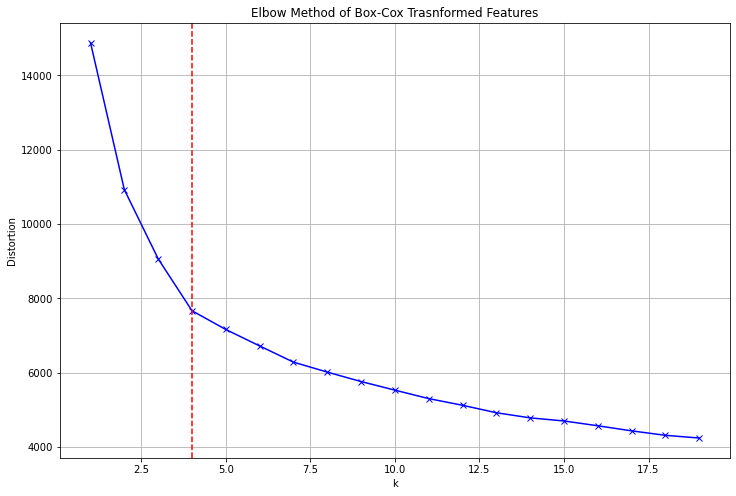

Optimal number of clusters = 4


In [158]:
distortions_boxcox = []

K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(boxcox_features)
    distortions_boxcox.append(kmeanModel.inertia_)

# Coefficients for the line between first and last distortion
a = (distortions_boxcox[-1] - distortions_boxcox[0])
b = (K[0] - K[-1])
c = (K[-1] * distortions_boxcox[0] - K[0] * distortions_boxcox[-1])

# Calculate distances to the line for each distortion value
distances = [calculate_distance(k, dist, a, b, c) for k, dist in zip(K, distortions_boxcox)]

# Get the optimal number of clusters (the "elbow" in the plot)
optimal_clusters = distances.index(max(distances)) + 1  # +1 because cluster indexing starts from 1

# Plot
plt.figure(figsize=(12,8))
plt.plot(K, distortions_boxcox, 'bx-')
plt.axvline(x=optimal_clusters, color='red', linestyle='--')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method of Box-Cox Trasnformed Features')
plt.grid(True)
plt.show()

print(f"Optimal number of clusters = {optimal_clusters}")

In [159]:
'''
# Define the number of clusters you want
num_clusters = 4  # Change this to the desired number of clusters

# Fit K-means with the specified number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=10)
kmeans.fit(boxcox_features)

# Reduce dimensions using PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(boxcox_features)

# Create a DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['component 1', 'component 2'])

# Add cluster labels from K-means
principalDf['cluster'] = kmeans.labels_

# Define different signs (shapes) for clusters
cluster_signs = ['o', 's', '^', 'D']  # You can customize this list based on your preferences

# Plotting scatter plot with different signs for clusters
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for cluster_id in range(num_clusters):
    cluster_data = principalDf[principalDf['cluster'] == cluster_id]
    
    # Handle the case when the cluster_id exceeds the number of available signs
    marker_index = cluster_id % len(cluster_signs)
    
    plt.scatter(cluster_data['component 1'], cluster_data['component 2'],
                label=f'Cluster {cluster_id}', marker=cluster_signs[marker_index])

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()
'''

"\n# Define the number of clusters you want\nnum_clusters = 4  # Change this to the desired number of clusters\n\n# Fit K-means with the specified number of clusters\nkmeans = KMeans(n_clusters=num_clusters, random_state=10)\nkmeans.fit(boxcox_features)\n\n# Reduce dimensions using PCA\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(boxcox_features)\n\n# Create a DataFrame\nprincipalDf = pd.DataFrame(data=principalComponents, columns=['component 1', 'component 2'])\n\n# Add cluster labels from K-means\nprincipalDf['cluster'] = kmeans.labels_\n\n# Define different signs (shapes) for clusters\ncluster_signs = ['o', 's', '^', 'D']  # You can customize this list based on your preferences\n\n# Plotting scatter plot with different signs for clusters\nplt.figure(figsize=(15, 10))  # Adjust the figure size as needed\nfor cluster_id in range(num_clusters):\n    cluster_data = principalDf[principalDf['cluster'] == cluster_id]\n    \n    # Handle the case when the cluster_id e

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


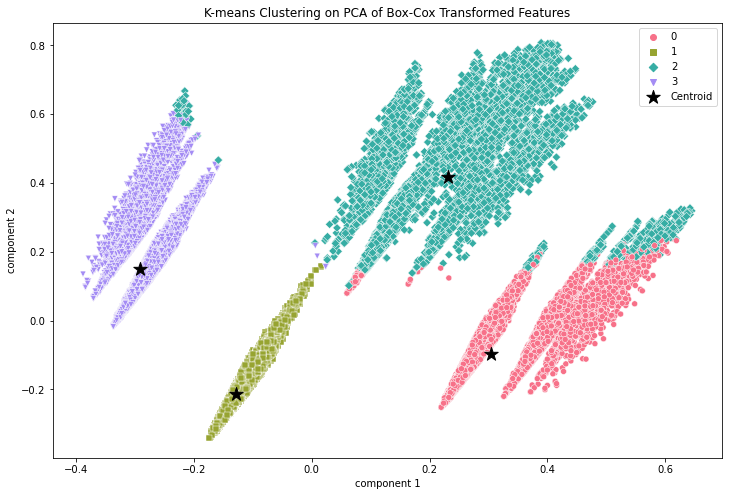

In [160]:
# fit into k-means
kmeans = KMeans(n_clusters=4, random_state=2, n_init=10)
kmeans.fit(boxcox_features)

# Reducing dimensions using PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(boxcox_features)

# Transform the centroids using PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Converting to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['component 1', 'component 2'])

# Using KMeans labels
principalDf['cluster'] = kmeans.labels_

# Define a custom palette and markers
custom_palette = ListedColormap(sns.color_palette("husl", 4))
custom_markers = ['o', 's', 'D', 'v']

# Plotting scatter plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='component 1', y='component 2', hue='cluster', style='cluster', data=principalDf, palette=custom_palette, markers=custom_markers)

# Plotting centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=200, c='black', label='Centroid')
plt.legend()
plt.title('K-means Clustering on PCA of Box-Cox Transformed Features')
plt.show()

#### K-means with Box-Cox transformed features plot divided data into four clusters, and they are distinct and well-separated from each other with only a few overlapping data points at the edge. This plot has the clearest clusters amount all the plots.

In [161]:
# Retrieve cluster centroids
centroids_boxcox = kmeans.cluster_centers_

# Convert centroids to DataFrame for better visualization
boxcox_centroids = pd.DataFrame(centroids_boxcox, columns=all_features.columns)
boxcox_centroids

frequency  daypart_overnight (00:30-05:59)  \
0   0.406240                         0.003897   
1   0.386765                         0.020196   
2   0.472014                         0.013608   
3   0.405519                         0.005232   

   daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                         0.001936                  4.762543e-01   
1                         0.003981                 -8.107404e-14   
2                         0.005167                  5.189675e-01   
3                         0.000747                  1.671709e-04   

   daypart_Prime: early fringe (17:30-19:59)  \
0                                   0.051595   
1                                   0.171016   
2                                   0.167457   
3                                   0.055018   

   daypart_Prime: late fringe (20:00-22:59)  daypart_late night (23:00-00:29)  \
0                              2.751817e-03                          0.003777   
1                             -4.674039e-14                          0.021628   
2                              4.366757e-01                          0.019576   
3                              4.373642e-01                          0.009408   

     Action  Adventure  Animation  ...      News  Reality-TV   Romance  \
0  0.086072   0.057837   0.004769  ...  0.000004    0.000005  0.035387   
1  0.072677   0.044567   0.003361  ...  0.000003    0.000005  0.028540   
2  0.170365   0.113264   0.009430  ...  0.000012    0.000006  0.079353   
3  0.083600   0.051134   0.003258  ...  0.000004    0.000005  0.035845   

     Sci-Fi     Short     Sport     Talk-Show  Thriller       War   Western  
0  0.035502  0.000105  0.000781  7.107834e-08  0.071996  0.000989  0.000163  
1  0.029691  0.000074  0.000647  8.065659e-08  0.062677  0.000827  0.000134  
2  0.073031  0.000227  0.001934 -5.823352e-21  0.157313  0.003093  0.000496  
3  0.034734  0.000079  0.000778  5.885560e-08  0.079916  0.001192  0.000179  

[4 rows x 33 columns]

In [162]:
# 1. Extract column names from the original dataframe, excluding the user_id
columns = all_features.columns

# 2. Convert to DataFrame
boxcox_features_df = pd.DataFrame(boxcox_features, columns=columns)

# 3. Add cluster labels
boxcox_features_df['cluster'] = kmeans.labels_

# 4. Groupby operations
# Compute mean for each feature per cluster
boxcox_cluster_mean = boxcox_features_df.groupby('cluster').mean()

# Compute standard deviation for each feature per cluster
boxcox_cluster_std = boxcox_features_df.groupby('cluster').std()

boxcox_cluster_mean

frequency  daypart_overnight (00:30-05:59)  \
cluster                                               
0         0.406232                         0.003897   
1         0.386765                         0.020196   
2         0.472018                         0.013605   
3         0.405519                         0.005232   

         daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
cluster                                                                  
0                               0.001936                      0.476237   
1                               0.003981                      0.000000   
2                               0.005166                      0.519003   
3                               0.000747                      0.000167   

         daypart_Prime: early fringe (17:30-19:59)  \
cluster                                              
0                                         0.051565   
1                                         0.171016   
2                                         0.167509   
3                                         0.055018   

         daypart_Prime: late fringe (20:00-22:59)  \
cluster                                             
0                                        0.002752   
1                                        0.000000   
2                                        0.436548   
3                                        0.437364   

         daypart_late night (23:00-00:29)    Action  Adventure  Animation  \
cluster                                                                     
0                                0.003777  0.086057   0.057833   0.004770   
1                                0.021628  0.072677   0.044567   0.003361   
2                                0.019570  0.170384   0.113259   0.009427   
3                                0.009408  0.083600   0.051134   0.003258   

         ...      News  Reality-TV   Romance    Sci-Fi     Short     Sport  \
cluster  ...                                                                 
0        ...  0.000004    0.000005  0.035382  0.035506  0.000105  0.000781   
1        ...  0.000003    0.000005  0.028540  0.029691  0.000074  0.000647   
2        ...  0.000012    0.000006  0.079353  0.073010  0.000227  0.001933   
3        ...  0.000004    0.000005  0.035845  0.034734  0.000079  0.000778   

            Talk-Show  Thriller       War   Western  
cluster                                              
0        7.108557e-08  0.071981  0.000987  0.000163  
1        8.065659e-08  0.062677  0.000827  0.000134  
2        0.000000e+00  0.157331  0.003099  0.000496  
3        5.885560e-08  0.079916  0.001192  0.000179  

[4 rows x 33 columns]

In [163]:
boxcox_cluster_std

frequency  daypart_overnight (00:30-05:59)  \
cluster                                               
0         0.041426                         0.018463   
1         0.030509                         0.037912   
2         0.017276                         0.032529   
3         0.041667                         0.021229   

         daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
cluster                                                                  
0                               0.009099                      0.062047   
1                               0.012731                      0.000000   
2                               0.014291                      0.095292   
3                               0.005732                      0.008587   

         daypart_Prime: early fringe (17:30-19:59)  \
cluster                                              
0                                         0.116409   
1                                         0.154135   
2                                         0.163461   
3                                         0.119654   

         daypart_Prime: late fringe (20:00-22:59)  \
cluster                                             
0                                        0.033611   
1                                        0.000000   
2                                        0.128681   
3                                        0.046743   

         daypart_late night (23:00-00:29)    Action  Adventure  Animation  \
cluster                                                                     
0                                0.018920  0.115453   0.085268   0.014120   
1                                0.040786  0.107050   0.076900   0.012027   
2                                0.039320  0.131755   0.097910   0.018757   
3                                0.028959  0.114736   0.081933   0.011868   

         ...      News  Reality-TV   Romance    Sci-Fi     Short     Sport  \
cluster  ...                                                                 
0        ...  0.000078    0.000081  0.063135  0.061901  0.000751  0.003811   
1        ...  0.000069    0.000082  0.057558  0.057303  0.000634  0.003481   
2        ...  0.000127    0.000089  0.077834  0.075475  0.001092  0.005808   
3        ...  0.000075    0.000081  0.063287  0.061491  0.000653  0.003804   

         Talk-Show  Thriller       War   Western  
cluster                                           
0         0.000003  0.105367  0.004687  0.001190  
1         0.000004  0.098744  0.004306  0.001080  
2         0.000000  0.121227  0.007903  0.002038  
3         0.000003  0.108292  0.005127  0.001249  

[4 rows x 33 columns]

In [164]:
k_means_features.insert(1, 'KM_cluster_boxcox', boxcox_features_df['cluster'])

k_means_features

user_id  KM_cluster_boxcox  KM_cluster_quantile  \
0      000052a0a0                  2                    2   
1      000296842d                  3                    0   
2      0006ea6b5c                  3                    2   
3      0008c31833                  1                    5   
4      000a3ec774                  3                    5   
...           ...                ...                  ...   
62320  fff92ebc7e                  1                    5   
62321  fffd345213                  1                    4   
62322  fffd4d1888                  1                    0   
62323  fffe7b777b                  0                    0   
62324  fffeac83be                  3                    0   

       KM_cluster_robustscaler  KM_cluster_normalized  frequency  \
0                            3                      3         13   
1                            1                      0          2   
2                            0                      0          5   
3                            1                      2          1   
4                            1                      0          2   
...                        ...                    ...        ...   
62320                        0                      3          1   
62321                        1                      2          1   
62322                        1                      3          1   
62323                        1                      1          1   
62324                        1                      0          4   

       daypart_overnight (00:30-05:59)  daypart_breakfast (06:00-08:59)  \
0                                  0.0                              0.0   
1                                  1.0                              0.0   
2                                  0.0                              0.0   
3                                  0.0                              0.0   
4                                  0.0                              0.0   
...                                ...                              ...   
62320                              0.0                              0.0   
62321                              0.0                              1.0   
62322                              0.0                              0.0   
62323                              0.0                              0.0   
62324                              0.0                              0.0   

       daypart_daytime (9:00-17:29)  \
0                               2.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   
...                             ...   
62320                           0.0   
62321                           0.0   
62322                           0.0   
62323                           1.0   
62324                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  ...  News  Reality-TV  \
0                                            6.0  ...   0.0         0.0   
1                                            0.0  ...   0.0         0.0   
2                                            0.0  ...   0.0         0.0   
3                                            0.0  ...   0.0         0.0   
4                                            0.0  ...   0.0         0.0   
...                                          ...  ...   ...         ...   
62320                                        1.0  ...   0.0         0.0   
62321                                        0.0  ...   0.0         0.0   
62322                                        1.0  ...   0.0         0.0   
62323                                        0.0  ...   0.0         0.0   
62324                                        0.0  ...   0.0         0.0   

       Romance  Sci-Fi  Short  Sport  Talk-Show  Thriller    War  Western  
0        0.000   3.225    0.0  0.225        0.0     2.978  0.000      0.0  
1        0.000   0.318    0.0  0.000 

### After the visually examining the clusters, it is obvious that 

1.K-means with 1. quantile features

2.K-means with 2. normalized Features

3.K-means with 3. robustscaler

4.K-means with 4. box-cox Features

performed visually better.

## 7-5.Evaluating clusters with Silhouette score:

reference:https://medium.com/towards-data-science/cluster-analysis-create-visualize-and-interpret-customer-segments-474e55d00ebb

In [165]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

dataframes = {
    "Quantile Features": quantile_features,
    "BoxCox Features": boxcox_features
}

k_values = {
    "Quantile Features": 6,
    "BoxCox Features": 4
}

for name, df in dataframes.items():
    k = k_values[name]
    # K-means clustering
    kmeans = KMeans(n_clusters=k).fit(df)
    print(f'{name} - kmeans (k={k}): {silhouette_score(df, kmeans.labels_, metric="euclidean")}')
    print("-" * 50)


Quantile Features - kmeans (k=6): 0.09185863269545229
--------------------------------------------------
BoxCox Features - kmeans (k=4): 0.2875591869849128
--------------------------------------------------


In [166]:
dataframes = {
    "Quantile Features": quantile_features,
    "BoxCox Features": boxcox_features
}

# Set the k_values separately for each dataset as per your requirement
k_values = {
    "Quantile Features": [4, 5, 6, 7, 8],
    "BoxCox Features": [2, 3, 4, 5, 6]
}

for name, df in dataframes.items():
    print(f'{name} Silhouette Scores:')
    print('-' * 50)
    for k in k_values[name]:
        # K-means clustering
        kmeans = KMeans(n_clusters=k).fit(df)
        silhouette_val = silhouette_score(df, kmeans.labels_, metric="euclidean")
        print(f'k = {k}: {silhouette_val}')
    print("=" * 50)


Quantile Features Silhouette Scores:
--------------------------------------------------
k = 4: 0.0968811771277511
k = 5: 0.08312860869808772
k = 6: 0.09186329306415314
k = 7: 0.08951936995439899
k = 8: 0.09475151602096404
BoxCox Features Silhouette Scores:
--------------------------------------------------
k = 2: 0.26675321457777135
k = 3: 0.24861471197560292
k = 4: 0.28756105679134547
k = 5: 0.2595286802114267
k = 6: 0.2307292666952559


In [164]:
dataframes = {
    "Quantile Features": quantile_features,
    "Normalized Features": normalized_features,
    "RobustScaler Features": robustscaler_features,
    "BoxCox Features": boxcox_features
}

for name, df in dataframes.items():
    # K-means clustering
    kmeans = KMeans(n_clusters=4).fit(df)
    print(f'{name} - kmeans: {silhouette_score(df, kmeans.labels_, metric="euclidean")}')
    print("-" * 50) 

Quantile Features - kmeans: 0.09684767227070355
--------------------------------------------------
Normalized Features - kmeans: 0.26895796699118213
--------------------------------------------------
RobustScaler Features - kmeans: 0.43195895038901866
--------------------------------------------------
BoxCox Features - kmeans: 0.28756105679134547
--------------------------------------------------


1. Quantile Features - kmeans: 0.09687692079617453

This is a low Silhouette Score. The clusters formed with Quantile-scaled features are not very distinct, and data points might be very close to the decision boundaries of neighboring clusters or possibly mismatched.

2. Normalized Features - kmeans: 0.2689641079567879

This score suggests moderate clustering quality. The clusters using normalized features are more distinct than those using quantile features, but there's still potential overlap or proximity to decision boundaries.

3. RobustScaler Features - kmeans: 0.43194277401387066

The highest Silhouette Score among the given preprocessing techniques suggests that using RobustScaler resulted in the best-defined clusters. Data points in these clusters are, on average, closer to their own cluster centers and farther from other clusters compared to the other methods.

4. BoxCox Features - kmeans: 0.2875591869849129

The BoxCox transformation provides a slightly better clustering result than normalization but is still not as distinct as the clusters formed using RobustScaler.

## Choose Kmeans with BoxCox Features
#### Reason: Although its Silhouette Score is not the highest, the scatter plot for the BoxCox features shows that the clusters are well-separated and distinct. Considering that segmenting audience needs to be interpretable, the clear distinction and separation in the scatter plot for the BoxCox features indicate that each cluster likely represents a meaningful and distinct audience segment. As a result, each segment has unique characteristics that can be addressed individually. Moreover, the BoxCox transformation tends to stabilize variance and make the data more normal-like, potentially leading to more natural and meaningful clusters in specific contexts. Hence, BoxCox Features with k-means emerge as the most suitable choice among the four K-means models with different scaled data.

# 8.Interpretation - Cluster Analysis and Segmentation

#### Select K-means using Box-Cox Features

#### In this section, dive into the characteristics of each cluster to get a clear picture of what each cluster represents, and segment each cluster based on the patterns and features observed from the analysis.

## 8-1.Cluster analysis: Frequency and Dayparts

In [165]:
boxcox_centroids

frequency  daypart_overnight (00:30-05:59)  \
0   0.406240                         0.003897   
1   0.386765                         0.020196   
2   0.472014                         0.013608   
3   0.405519                         0.005232   

   daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                         0.001936                  4.762543e-01   
1                         0.003981                 -8.107404e-14   
2                         0.005167                  5.189675e-01   
3                         0.000747                  1.671709e-04   

   daypart_Prime: early fringe (17:30-19:59)  \
0                                   0.051595   
1                                   0.171016   
2                                   0.167457   
3                                   0.055018   

   daypart_Prime: late fringe (20:00-22:59)  daypart_late night (23:00-00:29)  \
0                              2.751817e-03                          0.003777   
1                             -4.674039e-14                          0.021628   
2                              4.366757e-01                          0.019576   
3                              4.373642e-01                          0.009408   

     Action  Adventure  Animation  ...      News  Reality-TV   Romance  \
0  0.086072   0.057837   0.004769  ...  0.000004    0.000005  0.035387   
1  0.072677   0.044567   0.003361  ...  0.000003    0.000005  0.028540   
2  0.170365   0.113264   0.009430  ...  0.000012    0.000006  0.079353   
3  0.083600   0.051134   0.003258  ...  0.000004    0.000005  0.035845   

     Sci-Fi     Short     Sport     Talk-Show  Thriller       War   Western  
0  0.035502  0.000105  0.000781  7.107834e-08  0.071996  0.000989  0.000163  
1  0.029691  0.000074  0.000647  8.065659e-08  0.062677  0.000827  0.000134  
2  0.073031  0.000227  0.001934 -5.823352e-21  0.157313  0.003093  0.000496  
3  0.034734  0.000079  0.000778  5.885560e-08  0.079916  0.001192  0.000179  

[4 rows x 33 columns]

In [166]:
boxcox_cluster_std

frequency  daypart_overnight (00:30-05:59)  \
cluster                                               
0         0.041426                         0.018463   
1         0.030509                         0.037912   
2         0.017276                         0.032529   
3         0.041667                         0.021229   

         daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
cluster                                                                  
0                               0.009099                      0.062047   
1                               0.012731                      0.000000   
2                               0.014291                      0.095292   
3                               0.005732                      0.008587   

         daypart_Prime: early fringe (17:30-19:59)  \
cluster                                              
0                                         0.116409   
1                                         0.154135   
2                                         0.163461   
3                                         0.119654   

         daypart_Prime: late fringe (20:00-22:59)  \
cluster                                             
0                                        0.033611   
1                                        0.000000   
2                                        0.128681   
3                                        0.046743   

         daypart_late night (23:00-00:29)    Action  Adventure  Animation  \
cluster                                                                     
0                                0.018920  0.115453   0.085268   0.014120   
1                                0.040786  0.107050   0.076900   0.012027   
2                                0.039320  0.131755   0.097910   0.018757   
3                                0.028959  0.114736   0.081933   0.011868   

         ...      News  Reality-TV   Romance    Sci-Fi     Short     Sport  \
cluster  ...                                                                 
0        ...  0.000078    0.000081  0.063135  0.061901  0.000751  0.003811   
1        ...  0.000069    0.000082  0.057558  0.057303  0.000634  0.003481   
2        ...  0.000127    0.000089  0.077834  0.075475  0.001092  0.005808   
3        ...  0.000075    0.000081  0.063287  0.061491  0.000653  0.003804   

         Talk-Show  Thriller       War   Western  
cluster                                           
0         0.000003  0.105367  0.004687  0.001190  
1         0.000004  0.098744  0.004306  0.001080  
2         0.000000  0.121227  0.007903  0.002038  
3         0.000003  0.108292  0.005127  0.001249  

[4 rows x 33 columns]

After applying PCA for dimensionality reduction, the cluster centroids in the PCA-transformed space exhibited negative values. These negative values present challenges for visualization and interpretation, especially given that negative values are uninterpretable in the context of our dataset. Moreover, the difference between the original and centroid data post-clustering might lead to potential misinterpretations. To offer a clear perspective on the clustering outcomes, a decision was made to use the Box-Cox transformed data, which served as the foundation for the K-means clustering algorithm. Given that this transformed data was the input for clustering, analyzing clusters in this context will deliver insights more aligned with the centroids. This approach ensures a consistent and direct understanding of cluster characteristics in the Box-Cox transformed space, bridging the gap between the clustering process and subsequent interpretation.

In [167]:
#Original dataset with all types of data's outcome
k_means_features

user_id  KM_cluster_boxcox  KM_cluster_quantile  \
0      000052a0a0                  2                    2   
1      000296842d                  3                    0   
2      0006ea6b5c                  3                    2   
3      0008c31833                  1                    5   
4      000a3ec774                  3                    5   
...           ...                ...                  ...   
62320  fff92ebc7e                  1                    5   
62321  fffd345213                  1                    4   
62322  fffd4d1888                  1                    0   
62323  fffe7b777b                  0                    0   
62324  fffeac83be                  3                    0   

       KM_cluster_robustscaler  KM_cluster_normalized  frequency  \
0                            3                      3         13   
1                            1                      0          2   
2                            0                      0          5   
3                            1                      2          1   
4                            1                      0          2   
...                        ...                    ...        ...   
62320                        0                      3          1   
62321                        1                      2          1   
62322                        1                      3          1   
62323                        1                      1          1   
62324                        1                      0          4   

       daypart_overnight (00:30-05:59)  daypart_breakfast (06:00-08:59)  \
0                                  0.0                              0.0   
1                                  1.0                              0.0   
2                                  0.0                              0.0   
3                                  0.0                              0.0   
4                                  0.0                              0.0   
...                                ...                              ...   
62320                              0.0                              0.0   
62321                              0.0                              1.0   
62322                              0.0                              0.0   
62323                              0.0                              0.0   
62324                              0.0                              0.0   

       daypart_daytime (9:00-17:29)  \
0                               2.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   
...                             ...   
62320                           0.0   
62321                           0.0   
62322                           0.0   
62323                           1.0   
62324                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  ...  News  Reality-TV  \
0                                            6.0  ...   0.0         0.0   
1                                            0.0  ...   0.0         0.0   
2                                            0.0  ...   0.0         0.0   
3                                            0.0  ...   0.0         0.0   
4                                            0.0  ...   0.0         0.0   
...                                          ...  ...   ...         ...   
62320                                        1.0  ...   0.0         0.0   
62321                                        0.0  ...   0.0         0.0   
62322                                        1.0  ...   0.0         0.0   
62323                                        0.0  ...   0.0         0.0   
62324                                        0.0  ...   0.0         0.0   

       Romance  Sci-Fi  Short  Sport  Talk-Show  Thriller    War  Western  
0        0.000   3.225    0.0  0.225        0.0     2.978  0.000      0.0  
1        0.000   0.318    0.0  0.000 

In [168]:
boxcox_features_df

frequency  daypart_overnight (00:30-05:59)  \
0       0.490219                         0.000000   
1       0.439604                         0.091353   
2       0.479580                         0.000000   
3       0.371963                         0.000000   
4       0.439604                         0.000000   
...          ...                              ...   
62320   0.371963                         0.000000   
62321   0.371963                         0.000000   
62322   0.371963                         0.000000   
62323   0.371963                         0.000000   
62324   0.473775                         0.000000   

       daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                             0.000000                      0.556625   
1                             0.000000                      0.000000   
2                             0.000000                      0.000000   
3                             0.000000                      0.000000   
4                             0.000000                      0.000000   
...                                ...                           ...   
62320                         0.000000                      0.000000   
62321                         0.044695                      0.000000   
62322                         0.000000                      0.000000   
62323                         0.000000                      0.441260   
62324                         0.000000                      0.000000   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                       0.353151   
1                                       0.000000   
2                                       0.000000   
3                                       0.000000   
4                                       0.000000   
...                                          ...   
62320                                   0.304398   
62321                                   0.000000   
62322                                   0.304398   
62323                                   0.000000   
62324                                   0.000000   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                      0.564109   
1                                      0.413214   
2                                      0.545090   
3                                      0.000000   
4                                      0.507603   
...                                         ...   
62320                                  0.000000   
62321                                  0.000000   
62322                                  0.000000   
62323                                  0.000000   
62324                                  0.564109   

       daypart_late night (23:00-00:29)    Action  Adventure  Animation  ...  \
0                              0.098525  0.308029   0.216556   0.047099  ...   
1                              0.000000  0.000000   0.000000   0.000000  ...   
2                              0.098611  0.275856   0.151464   0.000000  ...   
3                              0.098525  0.000000   0.000000   0.000000  ...   
4                              0.000000  0.000000   0.000000   0.000000  ...   
...                                 ...       ...        ...        ...  ...   
62320                          0.000000  0.266590   0.000000   0.000000  ...   
62321                          0.000000  0.000000   0.190068   0.000000  ...   
62322                          0.000000  0.272965   0.000000   0.000000  ...   
62323                          0.000000  0.000000   0.000000   0.000000  ...   
62324                          0.000000  0.000000   0.000000   0.000000  ...   

       Reality-TV   Romance    Sci-Fi  Short    Sport  Talk-Show  Thriller  \
0             0.0  0.000000  0.161060    0.0  0.01938        0.0  0.280636   
1             0.0  0.000000  0.132067    0.0  0.00000        0.0  0.176270   
2             0.0  0.158986  0.158105    0.0  0.00000        0.0  0.1407

In [169]:
all_features

frequency  daypart_overnight (00:30-05:59)  \
0             13                              0.0   
1              2                              1.0   
2              5                              0.0   
3              1                              0.0   
4              2                              0.0   
...          ...                              ...   
62320          1                              0.0   
62321          1                              0.0   
62322          1                              0.0   
62323          1                              0.0   
62324          4                              0.0   

       daypart_breakfast (06:00-08:59)  daypart_daytime (9:00-17:29)  \
0                                  0.0                           2.0   
1                                  0.0                           0.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   
...                                ...                           ...   
62320                              0.0                           0.0   
62321                              1.0                           0.0   
62322                              0.0                           0.0   
62323                              0.0                           1.0   
62324                              0.0                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                            6.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
62320                                        1.0   
62321                                        0.0   
62322                                        1.0   
62323                                        0.0   
62324                                        0.0   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                           4.0   
1                                           1.0   
2                                           3.0   
3                                           0.0   
4                                           2.0   
...                                         ...   
62320                                       0.0   
62321                                       0.0   
62322                                       0.0   
62323                                       0.0   
62324                                       4.0   

       daypart_late night (23:00-00:29)  Action  Adventure  Animation  ...  \
0                                   1.0   4.202      2.281      0.654  ...   
1                                   0.0   0.000      0.000      0.000  ...   
2                                   2.0   0.987      0.296      0.000  ...   
3                                   1.0   0.000      0.000      0.000  ...   
4                                   0.0   0.000      0.000      0.000  ...   
...                                 ...     ...        ...        ...  ...   
62320                               0.0   0.843      0.000      0.000  ...   
62321                               0.0   0.000      0.569      0.000  ...   
62322                               0.0   0.937      0.000      0.000  ...   
62323                               0.0   0.000      0.000      0.000  ...   
62324                               0.0   0.000      0.000      0.000  ...   

       News  Reality-TV  Romance  Sci-Fi  Short  Sport  Talk-Show  Thriller  \
0       0.0         0.0    0.000   3.225    0.0  0.225        0.0     2.978   
1       0.0         0.0    0.000   0.318    0.0  0.000        0.0     0.318   
2       0.0         0.0    0.691   0.902    0.0  0.000        0.0     0.215   
3       0.0   

In [170]:
# Convert k_means_normalized to a pandas DataFrame
k_means_boxcox = boxcox_features_df.copy()
# Insert the cluster and user_id columns
k_means_boxcox.insert(0, 'KM_cluster_boxcox', k_means_features['KM_cluster_boxcox'])
k_means_boxcox.insert(0, 'user_id', user_id)
k_means_boxcox = k_means_boxcox.drop(columns=['cluster'])

k_means_boxcox

user_id  KM_cluster_boxcox  frequency  \
0      000052a0a0                  2   0.490219   
1      000296842d                  3   0.439604   
2      0006ea6b5c                  3   0.479580   
3      0008c31833                  1   0.371963   
4      000a3ec774                  3   0.439604   
...           ...                ...        ...   
62320  fff92ebc7e                  1   0.371963   
62321  fffd345213                  1   0.371963   
62322  fffd4d1888                  1   0.371963   
62323  fffe7b777b                  0   0.371963   
62324  fffeac83be                  3   0.473775   

       daypart_overnight (00:30-05:59)  daypart_breakfast (06:00-08:59)  \
0                             0.000000                         0.000000   
1                             0.091353                         0.000000   
2                             0.000000                         0.000000   
3                             0.000000                         0.000000   
4                             0.000000                         0.000000   
...                                ...                              ...   
62320                         0.000000                         0.000000   
62321                         0.000000                         0.044695   
62322                         0.000000                         0.000000   
62323                         0.000000                         0.000000   
62324                         0.000000                         0.000000   

       daypart_daytime (9:00-17:29)  \
0                          0.556625   
1                          0.000000   
2                          0.000000   
3                          0.000000   
4                          0.000000   
...                             ...   
62320                      0.000000   
62321                      0.000000   
62322                      0.000000   
62323                      0.441260   
62324                      0.000000   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                       0.353151   
1                                       0.000000   
2                                       0.000000   
3                                       0.000000   
4                                       0.000000   
...                                          ...   
62320                                   0.304398   
62321                                   0.000000   
62322                                   0.304398   
62323                                   0.000000   
62324                                   0.000000   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                      0.564109   
1                                      0.413214   
2                                      0.545090   
3                                      0.000000   
4                                      0.507603   
...                                         ...   
62320                                  0.000000   
62321                                  0.000000   
62322                                  0.000000   
62323                                  0.000000   
62324                                  0.564109   

       daypart_late night (23:00-00:29)    Action  ...  News  Reality-TV  \
0                              0.098525  0.308029  ...   0.0         0.0   
1                              0.000000  0.000000  ...   0.0         0.0   
2                              0.098611  0.275856  ...   0.0         0.0   
3                              0.098525  0.000000  ...   0.0         0.0   
4                              0.000000  0.000000  ...   0.0         0.0   
...                                 ...       ...  ...   ...         ...   
62320                          0.000000  0.266590  ...   0.0         0.0   
62321                          0.000000  0.000000  ...   0.0         0.0   
62322                          0.000000  0.272965  ...   0.0         0.0   
62323                        

In [171]:
cluster_means = k_means_boxcox.groupby('KM_cluster_boxcox').mean()
cluster_means

frequency  daypart_overnight (00:30-05:59)  \
KM_cluster_boxcox                                               
0                   0.406232                         0.003897   
1                   0.386765                         0.020196   
2                   0.472018                         0.013605   
3                   0.405519                         0.005232   

                   daypart_breakfast (06:00-08:59)  \
KM_cluster_boxcox                                    
0                                         0.001936   
1                                         0.003981   
2                                         0.005166   
3                                         0.000747   

                   daypart_daytime (9:00-17:29)  \
KM_cluster_boxcox                                 
0                                      0.476237   
1                                      0.000000   
2                                      0.519003   
3                                      0.000167   

                   daypart_Prime: early fringe (17:30-19:59)  \
KM_cluster_boxcox                                              
0                                                   0.051565   
1                                                   0.171016   
2                                                   0.167509   
3                                                   0.055018   

                   daypart_Prime: late fringe (20:00-22:59)  \
KM_cluster_boxcox                                             
0                                                  0.002752   
1                                                  0.000000   
2                                                  0.436548   
3                                                  0.437364   

                   daypart_late night (23:00-00:29)    Action  Adventure  \
KM_cluster_boxcox                                                          
0                                          0.003777  0.086057   0.057833   
1                                          0.021628  0.072677   0.044567   
2                                          0.019570  0.170384   0.113259   
3                                          0.009408  0.083600   0.051134   

                   Animation  ...      News  Reality-TV   Romance    Sci-Fi  \
KM_cluster_boxcox             ...                                             
0                   0.004770  ...  0.000004    0.000005  0.035382  0.035506   
1                   0.003361  ...  0.000003    0.000005  0.028540  0.029691   
2                   0.009427  ...  0.000012    0.000006  0.079353  0.073010   
3                   0.003258  ...  0.000004    0.000005  0.035845  0.034734   

                      Short     Sport     Talk-Show  Thriller       War  \
KM_cluster_boxcox                                                         
0                  0.000105  0.000781  7.108557e-08  0.071981  0.000987   
1                  0.000074  0.000647  8.065659e-08  0.062677  0.000827   
2                  0.000227  0.001933  0.000000e+00  0.157331  0.003099   
3                  0.000079  0.000778  5.885560e-08  0.079916  0.001192   

                    Western  
KM_cluster_boxcox            
0                  0.000163  
1                  0.000134  
2                  0.000496  
3                  0.000179  

[4 rows x 33 columns]

### Get to know about the clusters by visualisation

In [172]:
# Set the colour of each centroids first to maintain the consistency
centroids_color = {
    '0': 'red',
    '1': 'blue',
    '2': 'green',
    '3': 'yellow'
}

clusters_label = cluster_means.index.astype(str).tolist()

### 8-1-1.Frequency bar chart among clusters:

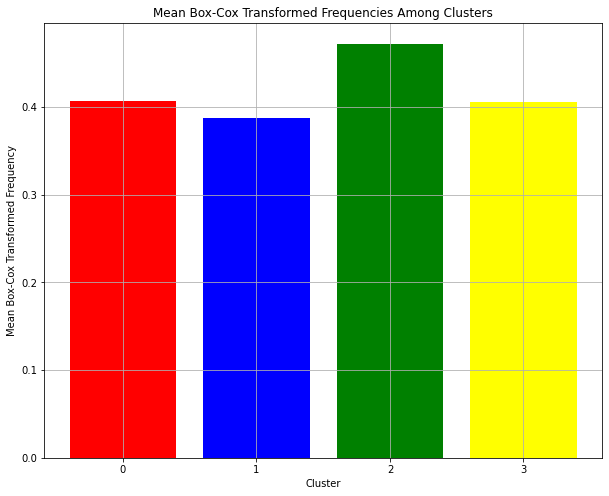

In [173]:
frequency = cluster_means['frequency'].values

# Plotting using color mapping
plt.figure(figsize=(10, 8))
plt.bar(clusters_label, frequency, color=[centroids_color[str(k)] for k in clusters_label])  # Convert k to string here
plt.xlabel('Cluster')
plt.ylabel('Mean Box-Cox Transformed Frequency')
plt.title('Mean Box-Cox Transformed Frequencies Among Clusters')
plt.grid(True)
plt.show()

### Freuecny: 
Mean Box-Cox transformed frequencies among clusters plot shows that audiences of cluster 2 tend to have the highest frequency with well over 0.4, followed by cluster 0 and 3 at around 0.4, lastly, cluster 1 tends to have the lowest frequency that not even 0.4.

## Dayparts:

### 8-1-2.Line plot of mean Box-Cox transformed values of six dayparts across clusters:

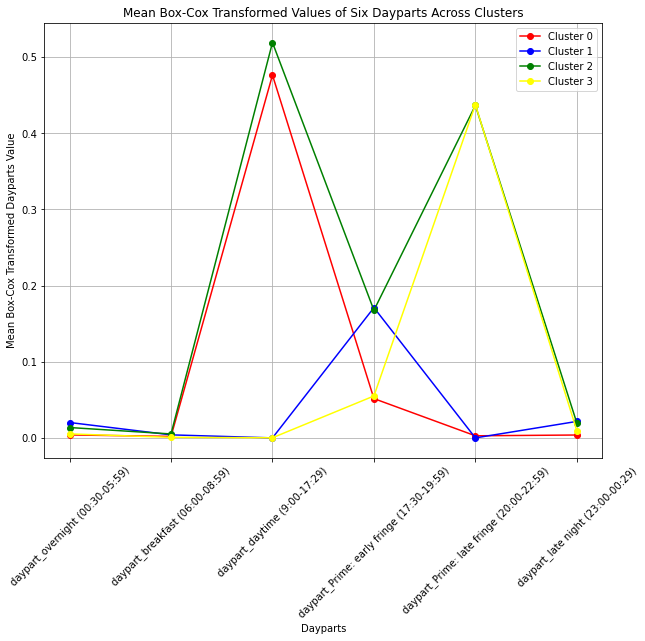

In [174]:
dayparts = cluster_means.iloc[:, 1:7]

plt.figure(figsize=(10, 8))

# Iterate over the clusters
for cluster in dayparts.index:
    plt.plot(dayparts.columns, dayparts.loc[cluster], color=centroids_color[str(cluster)], label=f"Cluster {cluster}", marker='o')

plt.xlabel('Dayparts')
plt.ylabel('Mean Box-Cox Transformed Dayparts Value')
plt.title('Mean Box-Cox Transformed Values of Six Dayparts Across Clusters')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Line plot of dayparts across clusters:
The mean Box-Cox transformed values of six dayparts across clusters line plot can observe that the majority of the audiences prefer to watch during daytime (9:00-17:29) until late fringe (20:00-22:59). The primary audiences during daytime (9:00-17:29) are audiences from cluster 2 and 0 with cluster 2 over 0.5 slightly more than cluster 0. Moreover, an interesting trend can be observed during the early fringe (17:30-19:59); all the clusters tend to watch movies in this time zone. However, they are relatively low, not even over 0.2. Next, the late fringe is also a very active period. Clusters 2 and 3 are both well over 0.4. Lastly, overnight (00:30-05:59), breakfast(06:00-08:59) and last night(23:00-00:29) can be considered the off-peak period, especially breakfast (06:00-08:59) is the least active time amount all time regardless which clusters.

### 8-1-3.Donut plots of each cluster's mean Box-Cox transformed distribution of dayparts:

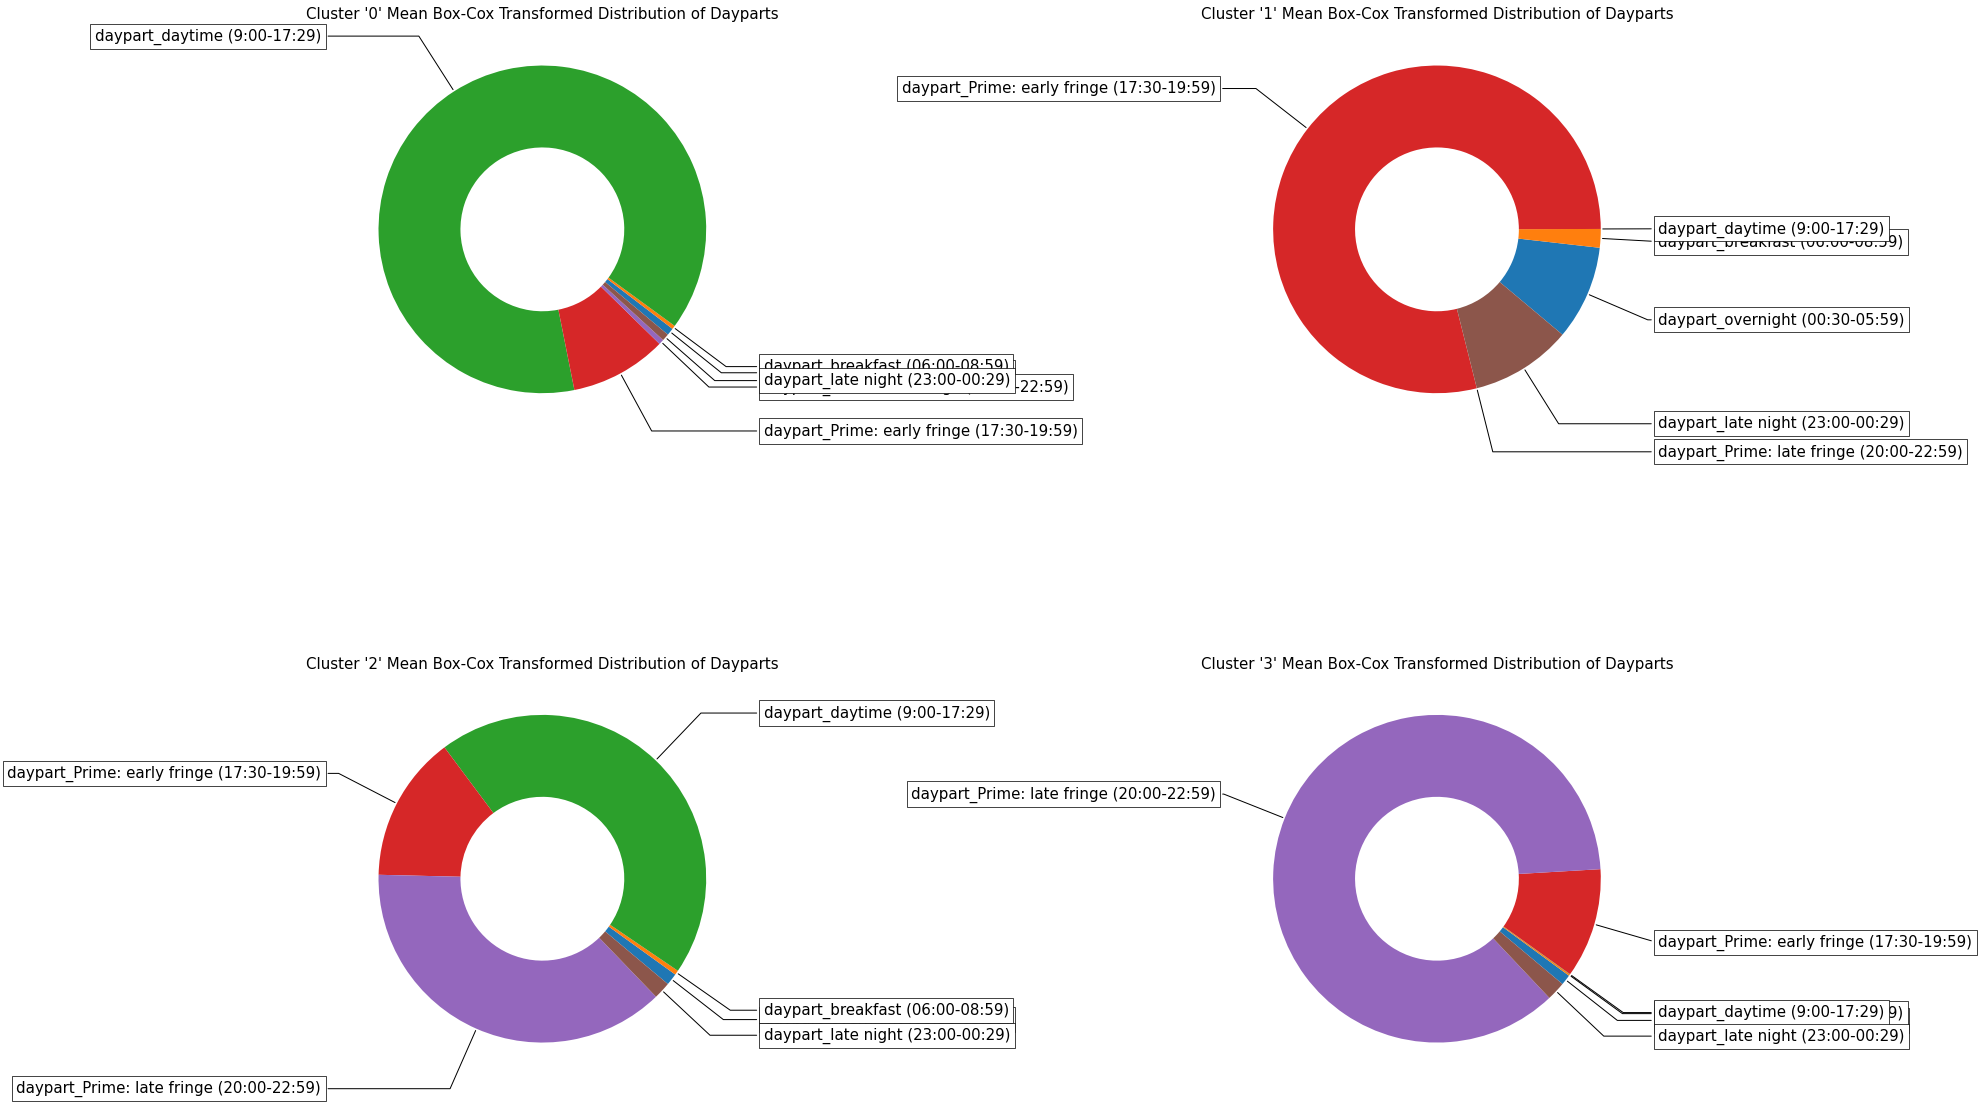

In [175]:
fig, axs = plt.subplots(2, 2, figsize=(25, 18), subplot_kw=dict(aspect="equal"))
clusters_to_display = [0, 1, 2, 3]

# Daypart labels
labels = cluster_means.columns[1:7]

for idx, cluster in enumerate(clusters_to_display):
    ax = axs[idx // 2, idx % 2]
    
    # Cluster data
    cluster_data = cluster_means.iloc[cluster, 1:7].values

    # Create donut plot for each cluster
    wedges, texts = ax.pie(cluster_data, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1) / 2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                    horizontalalignment=horizontalalignment, **kw, fontsize=15)

    ax.set_title(f"Cluster '{cluster}' Mean Box-Cox Transformed Distribution of Dayparts", fontsize=15) 

plt.tight_layout()
plt.show()

### Donut plots of each cluster's mean daypart distribution:

Cluster 0: This cluster is chiefly characterized by the daytime hours (9:00-17:29). There's also a subtle presence during the early fringe (17:30-19:59).

Cluster 1: The early fringe (17:30-19:59) dominates this cluster, accounting for roughly three-quarters of its time. The remaining quarter is primarily divided between the overnight (00:30-05:59) and late night (23:00-00:29) slots.

Cluster 2: Half of the distribution for this cluster falls within the daytime hours (9:00-17:29). The late fringe (20:00-22:59) emerges as the second most preferred timeslot. In contrast, the early fringe (17:30-19:59), though still popular, doesn't match the prominence of the preceding two slots.

Cluster 3: This cluster mirrors the distribution pattern of Cluster 0, with one timeslot significantly overshadowing the others. For Cluster 3, the late fringe (20:00-22:59) is the predominant slot. While the early fringe (17:30-19:59) takes the second spot, its share is considerably smaller.

###  8-1-4.Mean Box-Cox transformed of total watching time across dayparts:

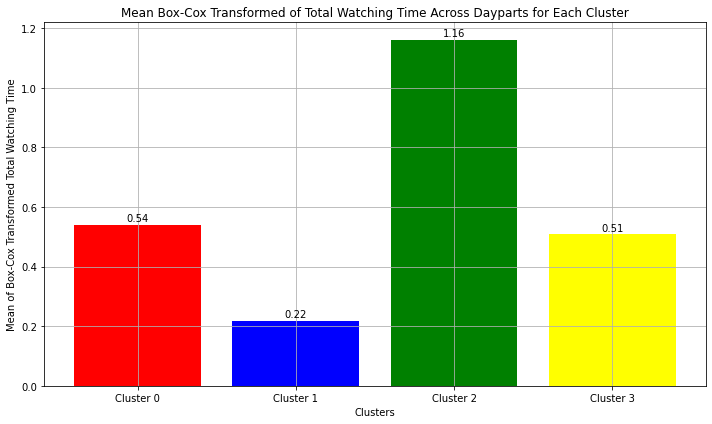

In [176]:
clusters_to_display = [0, 1, 2, 3]
avg_hours = []

# Calculate average hours for each cluster
for cluster in clusters_to_display:
    avg_hr = sum(cluster_means.iloc[cluster, 1:7].values)
    avg_hours.append(avg_hr)

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(clusters_to_display, avg_hours, color=[centroids_color[str(cluster)] for cluster in clusters_to_display])

# Display avg_hr values
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Clusters')
ax.set_ylabel('Mean of Box-Cox Transformed Total Watching Time')
ax.set_title('Mean Box-Cox Transformed of Total Watching Time Across Dayparts for Each Cluster')
ax.set_xticks(clusters_to_display)
ax.set_xticklabels([f"Cluster {cluster}" for cluster in clusters_to_display])
plt.tight_layout()
plt.grid(True)
plt.show()

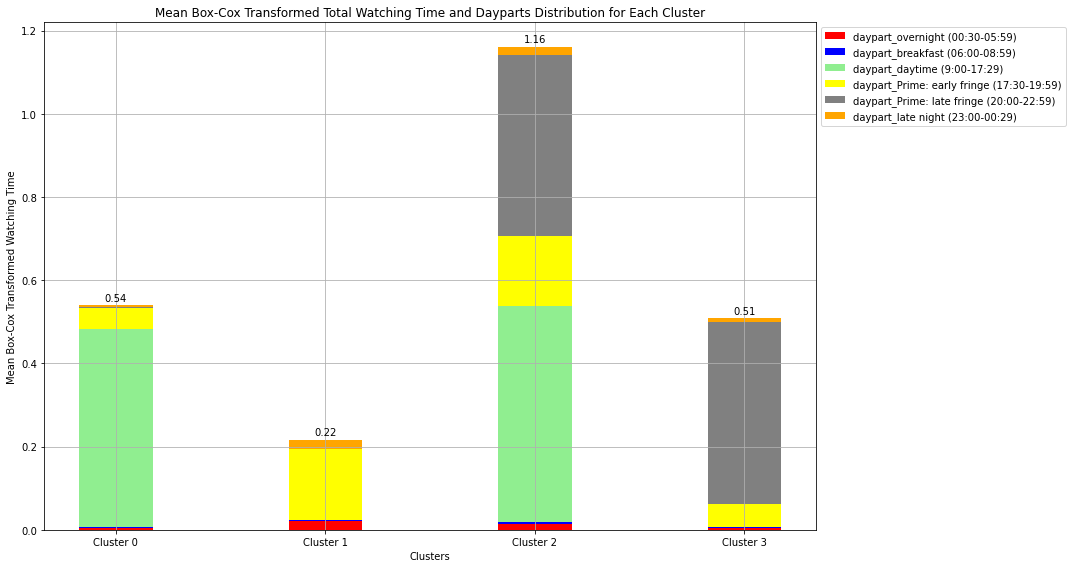

In [177]:
clusters_to_display = [0, 1, 2, 3]
avg_hours = []

# Distinct color names
colors = ['red', 'blue', 'lightgreen', 'yellow', 'gray', 'orange']

fig, ax = plt.subplots(figsize=(15, 8))

# Bar width
width = 0.35

# Calculate values for each cluster and plot stacked bars for dayparts
bottom_values = np.zeros(len(clusters_to_display))
for idx, cluster in enumerate(clusters_to_display):
    cluster_data = cluster_means.iloc[cluster, 1:7].values
    avg_hours.append(sum(cluster_data))
    
    for i, data in enumerate(cluster_data):
        bars = ax.bar(idx, data, width, bottom=bottom_values[idx], label=labels[i] if idx == 0 else "",
                      color=colors[i])
        bottom_values[idx] += data
        
    # Label the total value at the top of each stacked bar
    ax.text(idx, avg_hours[-1] + 0.005, round(avg_hours[-1], 2), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Clusters')
ax.set_ylabel('Mean Box-Cox Transformed Watching Time')
ax.set_title('Mean Box-Cox Transformed Total Watching Time and Dayparts Distribution for Each Cluster')
ax.set_xticks([i for i in range(len(clusters_to_display))])
ax.set_xticklabels([f"Cluster {cluster}" for cluster in clusters_to_display])
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.tight_layout()
plt.grid(True)
plt.show()

### Bar chart of mean Box-Cox transformed total watching time and dayparts distribution for each cluster:

In terms of viewing duration, cluster 2 tends to spead much more time watching movie with the average value of 1.16. In contrast, both Cluster 0 and Cluster 3 spend about half that time, with 0.54 and 0.51 respectively. On the other hand, Cluster 1 has the shortest total viewing time among all clusters, with a mere value of 0.22.

### 8-1-5. The number of user in each dayparts and freqneucy cluster.

User number in each dayparts and freqneucy cluster:
User number in Cluster 0: 19669
User number in Cluster 1: 17335
User number in Cluster 2: 6844
User number in Cluster 3: 18477


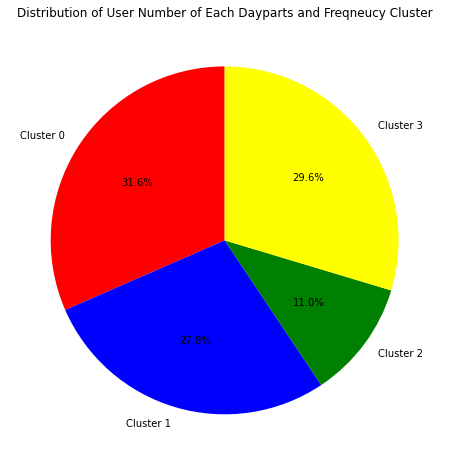

In [178]:
# print the user number of dayparts and freqneucy each cluster
cluster_boxcox_counts = k_means_boxcox['KM_cluster_boxcox'].value_counts().sort_index()

print("User number in each dayparts and freqneucy cluster:")
for index, value in cluster_boxcox_counts.iteritems():
    print(f"User number in Cluster {index}: {value}")

colors = ["red", "blue", "green", "yellow"]

clusters_label = ["Cluster " + str(index) for index in cluster_boxcox_counts.index]


fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Distribution of User Number of Each Dayparts and Freqneucy Cluster")
ax.pie(cluster_boxcox_counts, labels=clusters_label, colors=colors, autopct='%1.1f%%', startangle=90)

plt.show()

## 8-2.Conclusion on Frequency and Dayparts:
#### Cluster 0:
##### Frequency: 
Slightly higher than Cluster 1, on par with Cluster 3, and much lower than Cluster 2.
##### Dayparts:
Predominantly active during the daytime (09:00-17:29), with a minor portion during the early fringe (17:30-19:59).
#### Cluster 1:
##### Frequency: 
The least frequent among all clusters.
##### Dayparts:
Primarily active during the early fringe (17:30-19:59) with significantly reduced activity during the overnight and late night.
#### Cluster 2:
##### Frequency: 
The highest among all clusters.
##### Dayparts:
The daytime (09:00-17:29) and the late fringe (20:00-22:59) dominate its activity, with a minor inclination towards the early fringe (17:30-19:59).
#### Cluster 3:
##### Frequency: 
Marginally higher than Cluster 1, on par with Cluster 0, and substantially lower than Cluster 2.
##### Dayparts: 
Primarily active during the late fringe (20:00-22:59) with limited activity during the early fringe (17:30-19:59).

##  8-3.Segmentation of Frequency and Daytimes:
#### From these observations, it's evident that different clusters exhibit distinct patterns in terms of frequency, active periods. Therefore, some of the label for each cluster are:

### Cluster 0: Daytime Occasional Viewer - Occasionally watches movies mainly during daytime hours (09:00-17:29).
### Cluster 1: Early Fringe Viewer - Rarely indulges in movies, primarily tuning in during the early fringe period (17:30-19:59).
### Cluster 2: Frequent All-Day Viewer - Watches movies very frequently, especially during the daytime (09:00-17:29) and the late fringe (20:00-22:59).
### Cluster 3: Late Fringe Occasional Viewer - Watches movies sporadically, with a preference for late fringe hours (20:00-22:59).

##  8-4.Cluster analysis: Genres

In [179]:
# Convert k_means_normalized to a pandas DataFrame
k_means_quantile = quantile_features_df.copy()
# Insert the cluster and user_id columns
k_means_quantile.insert(0, 'KM_cluster_quantile', k_means_features['KM_cluster_quantile'])
k_means_quantile.insert(0, 'user_id', user_id)
k_means_quantile = k_means_quantile.drop(columns=['cluster'])

k_means_quantile

user_id  KM_cluster_quantile  frequency  \
0      000052a0a0                    2   0.989489   
1      000296842d                    0   0.680681   
2      0006ea6b5c                    2   0.926426   
3      0008c31833                    5   0.000000   
4      000a3ec774                    5   0.680681   
...           ...                  ...        ...   
62320  fff92ebc7e                    5   0.000000   
62321  fffd345213                    4   0.000000   
62322  fffd4d1888                    0   0.000000   
62323  fffe7b777b                    0   0.000000   
62324  fffeac83be                    0   0.890891   

       daypart_overnight (00:30-05:59)  daypart_breakfast (06:00-08:59)  \
0                             0.000000                         0.000000   
1                             0.932432                         0.000000   
2                             0.000000                         0.000000   
3                             0.000000                         0.000000   
4                             0.000000                         0.000000   
...                                ...                              ...   
62320                         0.000000                         0.000000   
62321                         0.000000                         0.966466   
62322                         0.000000                         0.000000   
62323                         0.000000                         0.000000   
62324                         0.000000                         0.000000   

       daypart_daytime (9:00-17:29)  \
0                          0.902903   
1                          0.000000   
2                          0.000000   
3                          0.000000   
4                          0.000000   
...                             ...   
62320                      0.000000   
62321                      0.000000   
62322                      0.000000   
62323                      0.719720   
62324                      0.000000   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                       0.996496   
1                                       0.000000   
2                                       0.000000   
3                                       0.000000   
4                                       0.000000   
...                                          ...   
62320                                   0.804304   
62321                                   0.000000   
62322                                   0.804304   
62323                                   0.000000   
62324                                   0.000000   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                      0.983984   
1                                      0.744244   
2                                      0.968468   
3                                      0.000000   
4                                      0.923924   
...                                         ...   
62320                                  0.000000   
62321                                  0.000000   
62322                                  0.000000   
62323                                  0.000000   
62324                                  0.983984   

       daypart_late night (23:00-00:29)    Action  ...  News  Reality-TV  \
0                              0.926426  0.995037  ...   0.0         0.0   
1                              0.000000  0.000000  ...   0.0         0.0   
2                              0.984985  0.907241  ...   0.0         0.0   
3                              0.926426  0.000000  ...   0.0         0.0   
4                              0.000000  0.000000  ...   0.0         0.0   
...                                 ...       ...  ...   ...         ...   
62320                          0.000000  0.849349  ...   0.0         0.0   
62321                          0.000000  0.000000  ...   0.0         0.0   
62322                          0.000000  0.888889  ...   0.0         0.0   
62323

In [180]:
cluster_means = k_means_quantile.groupby('KM_cluster_quantile').mean()
cluster_means

frequency  daypart_overnight (00:30-05:59)  \
KM_cluster_quantile                                               
0                     0.251409                         0.089762   
1                     0.245541                         0.092951   
2                     0.895004                         0.228408   
3                     0.132985                         0.076562   
4                     0.449960                         0.095286   
5                     0.348693                         0.080285   

                     daypart_breakfast (06:00-08:59)  \
KM_cluster_quantile                                    
0                                           0.033864   
1                                           0.045339   
2                                           0.131785   
3                                           0.034233   
4                                           0.088702   
5                                           0.046535   

                     daypart_daytime (9:00-17:29)  \
KM_cluster_quantile                                 
0                                        0.269737   
1                                        0.296840   
2                                        0.615186   
3                                        0.252415   
4                                        0.434645   
5                                        0.321984   

                     daypart_Prime: early fringe (17:30-19:59)  \
KM_cluster_quantile                                              
0                                                     0.202760   
1                                                     0.215341   
2                                                     0.565643   
3                                                     0.195460   
4                                                     0.298854   
5                                                     0.257819   

                     daypart_Prime: late fringe (20:00-22:59)  \
KM_cluster_quantile                                             
0                                                    0.290192   
1                                                    0.254077   
2                                                    0.615827   
3                                                    0.255435   
4                                                    0.287692   
5                                                    0.322691   

                     daypart_late night (23:00-00:29)    Action  Adventure  \
KM_cluster_quantile                                                          
0                                            0.102352  0.340849   0.070642   
1                                            0.091186  0.727813   0.737259   
2                                            0.274176  0.755749   0.620881   
3                                            0.080919  0.075263   0.032402   
4                                            0.095866  0.286866   0.743241   
5                                            0.103813  0.054766   0.043712   

                     Animation  ...      News  Reality-TV   Romance    Sci-Fi  \
KM_cluster_quantile             ...                                             
0                     0.011254  ...  0.001097    0.001567  0.037313  0.230549   
1                     0.025776  ...  0.000222    0.000776  0.038430  0.607166   
2                     0.125333  ...  0.007486    0.003152  0.433583  0.558293   
3                     0.011979  ...  0.007944    0.009674  0.000283  0.012338   
4                     0.745899  ...  0.000000    0.000741  0.219904  0.249349   
5                     0.011409  ...  0.000825    0.002200  0.837767  0.034888   

                        Short     Sport  Talk-Show  Thriller       War  \
KM_cluster_quantile                                                      
0                    0.003731  0.010961   0.000157  0.760574  0.036125   
1                    0.006929  0.009666   0.000000  0.238728  0.

In [181]:
# Set the colour of each centroids first to maintain the consistency
centroids_color = {
    '0': 'red',
    '1': 'blue',
    '2': 'green',
    '3': 'yellow',
    '4': 'pink',
    '5': 'brown'
}

clusters_label = cluster_means.index.astype(str).tolist()

### 8-4-1.Heatmap of mean Quantile transformed value of genres:

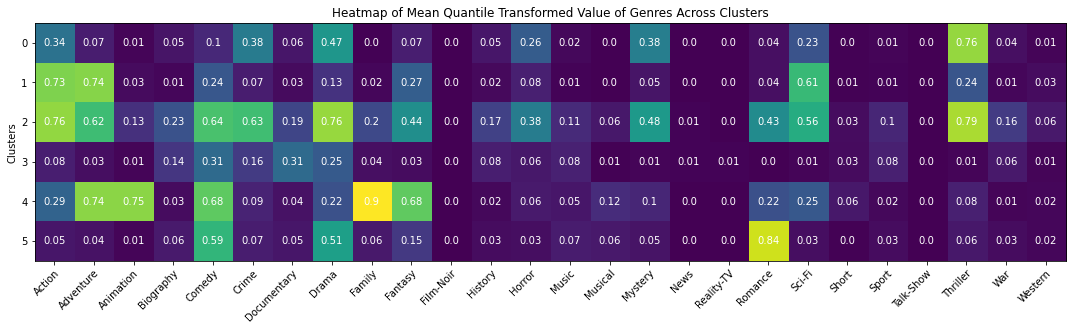

In [182]:
clusters_to_display = [0, 1, 2, 3, 4, 5]
genres_label = cluster_means.columns[7:].tolist()

genres_value_df = cluster_means.iloc[:, 7:]
genres_value = genres_value_df.values  # Convert the DataFrame to a NumPy array

fig, ax = plt.subplots(figsize=(15, 10))
im = ax.imshow(genres_value)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(genres_label)))
ax.set_xticklabels(genres_label)
ax.set_ylabel('Clusters')
ax.set_yticks(np.arange(len(clusters_to_display)))
ax.set_yticklabels(clusters_to_display)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(clusters_to_display)):
    for j in range(len(genres_label)):
        text = ax.text(j, i, round(genres_value[i, j], 2), ha="center", va="center", color="w")

ax.set_title("Heatmap of Mean Quantile Transformed Value of Genres Across Clusters")
fig.tight_layout()
plt.show()

### Heatmap of mean Quantile transformed value of all type of genres across clusters


### 8-4-2.Line plot of mean Quantile transformed values of genres:

In [183]:
# Calculating the mean value across all genres and clusters
mean_value = genres_value_df.values.mean()
print("Mean value across all genres and clusters: ", mean_value)

Mean value across all genres and clusters:  0.15904343461769677


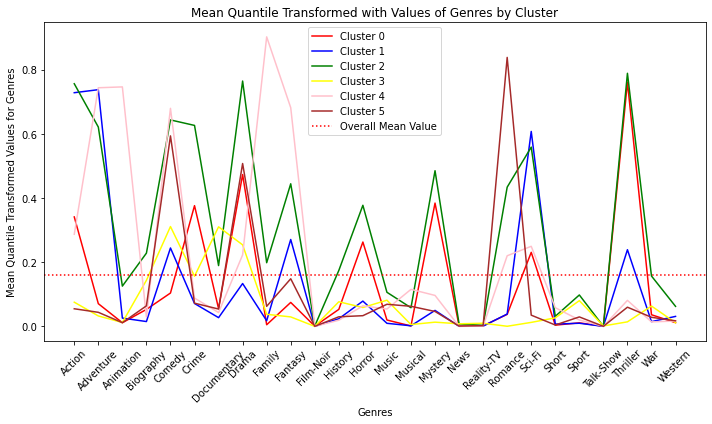

In [184]:
clusters_to_display = [0, 1, 2, 3, 4, 5]
colors = ['red', 'blue', 'green', 'yellow','pink','brown'] 

plt.figure(figsize=(10, 6))

for i, Cluster in enumerate(clusters_to_display):
    genres_value = cluster_means.iloc[Cluster].iloc[7:]
    plt.plot(genres_label, genres_value, color=colors[i], label=f"Cluster {Cluster}")

plt.xticks(rotation=45)
plt.title("Mean Quantile Transformed with Values of Genres by Cluster")
plt.ylabel("Mean Quantile Transformed Values for Genres")
plt.xlabel("Genres")
plt.axhline(y=mean_value, color='red', linestyle='dotted', label="Overall Mean Value")
plt.legend()
plt.tight_layout()
plt.show()

### Line plot of mean Quantile transformed values of genres by cluster
# [Need update]

### The number of user in each genres cluster.

User number of each genres cluster
User number in Cluster 0: 12742
User number in Cluster 1: 9004
User number in Cluster 2: 7600
User number in Cluster 3: 16712
User number in Cluster 4: 5381
User number in Cluster 5: 10886


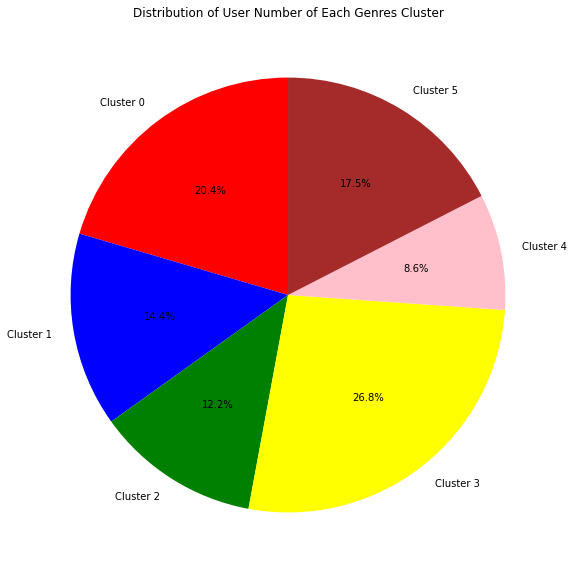

In [185]:
# print the user number of each genres cluster
cluster_quantile_counts = k_means_quantile['KM_cluster_quantile'].value_counts().sort_index()

print("User number of each genres cluster")
for index, value in cluster_quantile_counts.iteritems():
    print(f"User number in Cluster {index}: {value}")

colors = ["red", "blue", "green", "yellow", "pink", "brown"]

clusters_label = ["Cluster " + str(index) for index in cluster_quantile_counts.index]


fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Distribution of User Number of Each Genres Cluster")
ax.pie(cluster_quantile_counts, labels=clusters_label, colors=colors, autopct='%1.1f%%', startangle=90)

plt.show()

### 8-4-3. Bar charts of mean Quantile transformed of genres for each cluster:

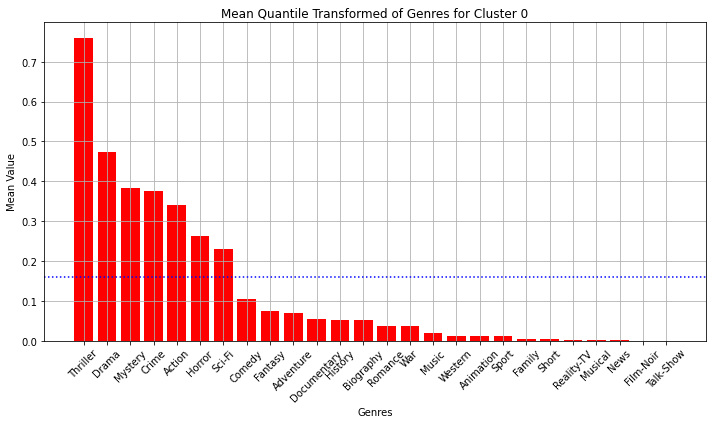

In [186]:
Cluster = 0

genres_label = cluster_means.columns[7:].tolist()
genres_value = cluster_means.iloc[Cluster, 7:]

# Sort the genres and their values
sorted_indices = genres_value.argsort()[::-1] 
genres_label_sorted = [genres_label[i] for i in sorted_indices]
genres_value_sorted = genres_value.iloc[sorted_indices]

plt.figure(figsize=(10, 6))  # Adjust size of the figure as needed

plt.bar(genres_label_sorted, genres_value_sorted, color='red')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if they are long
plt.title("Mean Quantile Transformed of Genres for Cluster " + str(Cluster))
plt.ylabel("Mean Value")
plt.xlabel("Genres")
plt.axhline(y=mean_value, color='blue', linestyle='dotted', label="Overall Mean Value")
plt.tight_layout()
plt.grid(True)

plt.show()

## Cluster 0: "Mystery & Suspense Buffs" 
#### Cluster 0 number of user: 12742 (20.4%)

Features: Very strong inclination towards genres like Thriller, Drama, Mystery, and Crime. These are users who are highly drawn to suspenseful and gripping content. Notably, their interest in Thriller genre is almost five times the overall mean.

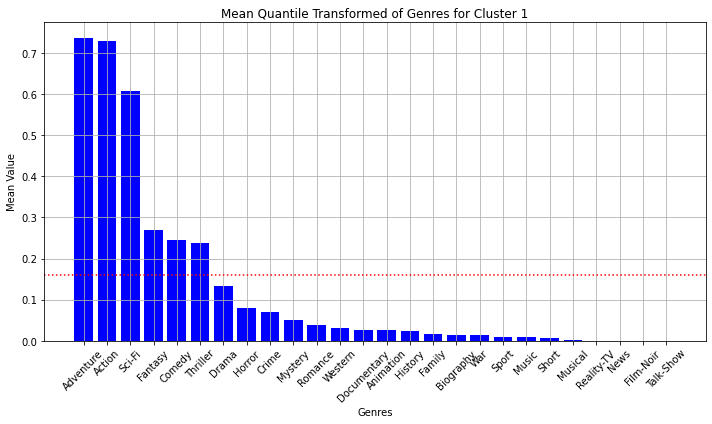

In [187]:
Cluster = 1

genres_label = cluster_means.columns[7:].tolist()
genres_value = cluster_means.iloc[Cluster, 7:]

# Sort the genres and their values
sorted_indices = genres_value.argsort()[::-1]  # [::-1] is to sort in descending order
genres_label_sorted = [genres_label[i] for i in sorted_indices]
genres_value_sorted = genres_value.iloc[sorted_indices]

plt.figure(figsize=(10, 6))  # Adjust size of the figure as needed

plt.bar(genres_label_sorted, genres_value_sorted, color='blue')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if they are long
plt.title("Mean Quantile Transformed of Genres for Cluster " + str(Cluster))
plt.ylabel("Mean Value")
plt.xlabel("Genres")
plt.axhline(y=mean_value, color='red', linestyle='dotted', label="Overall Mean Value")
plt.tight_layout()
plt.grid(True)

plt.show()

## Cluster 1: "Fantasy & Sci-Fi Adventurers"
#### Cluster 1 number of user: 9004 (14.1%)
Features: This cluster is characterized by a strong preference for Adventure, Action, and Sci-Fi movies. The viewers here seem to love epic tales, futuristic stories, and lots of action.

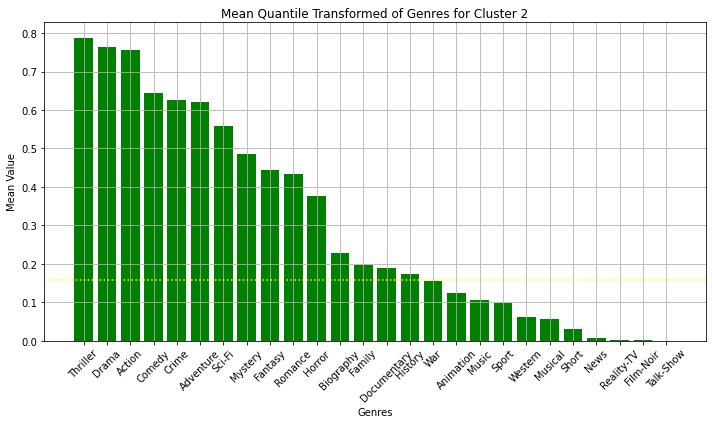

In [188]:
Cluster = 2

genres_label = cluster_means.columns[7:].tolist()
genres_value = cluster_means.iloc[Cluster, 7:]

# Sort the genres and their values
sorted_indices = genres_value.argsort()[::-1]  # [::-1] is to sort in descending order
genres_label_sorted = [genres_label[i] for i in sorted_indices]
genres_value_sorted = genres_value.iloc[sorted_indices]

plt.figure(figsize=(10, 6))  # Adjust size of the figure as needed

plt.bar(genres_label_sorted, genres_value_sorted, color='green')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if they are long
plt.title("Mean Quantile Transformed of Genres for Cluster " + str(Cluster))
plt.ylabel("Mean Value")
plt.xlabel("Genres")
plt.axhline(y=mean_value, color='yellow', linestyle='dotted', label="Overall Mean Value")
plt.tight_layout()
plt.grid(True)

plt.show()

## Cluster 2: "All-Round Entertainment Seekers"
#### Cluster 2 number of user: 7600 (12.2%)
Features: Members of this cluster enjoy a wide variety of genres, from Thriller, Drama, and Action to Comedy, Crime, and Adventure. Their scores are considerably above the mean in almost all major genres, indicating a diverse taste in movies.

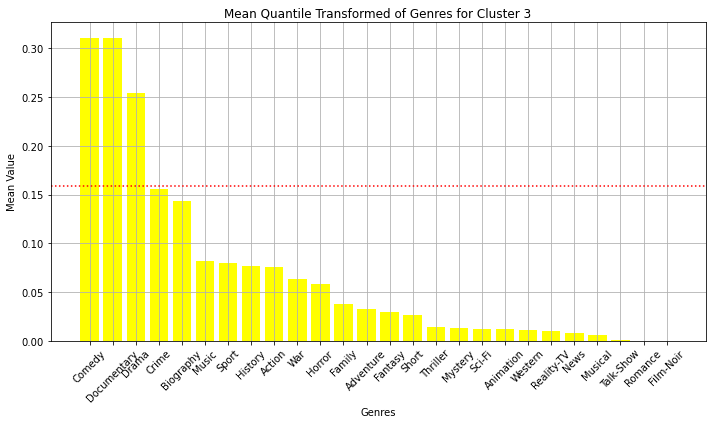

In [189]:
Cluster = 3

genres_label = cluster_means.columns[7:].tolist()
genres_value = cluster_means.iloc[Cluster, 7:]

# Sort the genres and their values
sorted_indices = genres_value.argsort()[::-1]  # [::-1] is to sort in descending order
genres_label_sorted = [genres_label[i] for i in sorted_indices]
genres_value_sorted = genres_value.iloc[sorted_indices]

plt.figure(figsize=(10, 6))  # Adjust size of the figure as needed

plt.bar(genres_label_sorted, genres_value_sorted, color='yellow')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if they are long
plt.title("Mean Quantile Transformed of Genres for Cluster " + str(Cluster))
plt.ylabel("Mean Value")
plt.xlabel("Genres")
plt.axhline(y=mean_value, color='red', linestyle='dotted', label="Overall Mean Value")
plt.tight_layout()
plt.grid(True)

plt.show()

## Cluster 3: "Documentary & Reality Enthusiasts"
#### Cluster 3 number of user: 16712 (17.5%)
Features: This cluster has a significant leaning towards non-fiction content like Documentaries and a decent interest in genres like Comedy, Drama, and Biography. Their tastes seem more oriented towards real-world events, biographical tales, and lighthearted comedy.

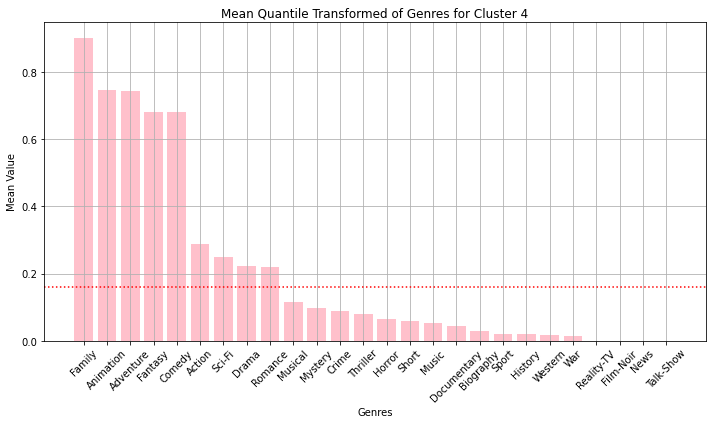

In [190]:
Cluster = 4

genres_label = cluster_means.columns[7:].tolist()
genres_value = cluster_means.iloc[Cluster, 7:]

# Sort the genres and their values
sorted_indices = genres_value.argsort()[::-1]  # [::-1] is to sort in descending order
genres_label_sorted = [genres_label[i] for i in sorted_indices]
genres_value_sorted = genres_value.iloc[sorted_indices]

plt.figure(figsize=(10, 6))  # Adjust size of the figure as needed

plt.bar(genres_label_sorted, genres_value_sorted, color='pink')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if they are long
plt.title("Mean Quantile Transformed of Genres for Cluster " + str(Cluster))
plt.ylabel("Mean Value")
plt.xlabel("Genres")
plt.axhline(y=mean_value, color='red', linestyle='dotted', label="Overall Mean Value")
plt.tight_layout()
plt.grid(True)

plt.show()

## Cluster 4: "Family & Animation Lovers"
#### Cluster 4 number of user: 5381 (8.6%)
Features: This group stands out with an overwhelming interest in Family and Animation genres. They also show a good inclination towards Adventure and Fantasy. Likely, this cluster represents families with children or individuals who enjoy animated content.

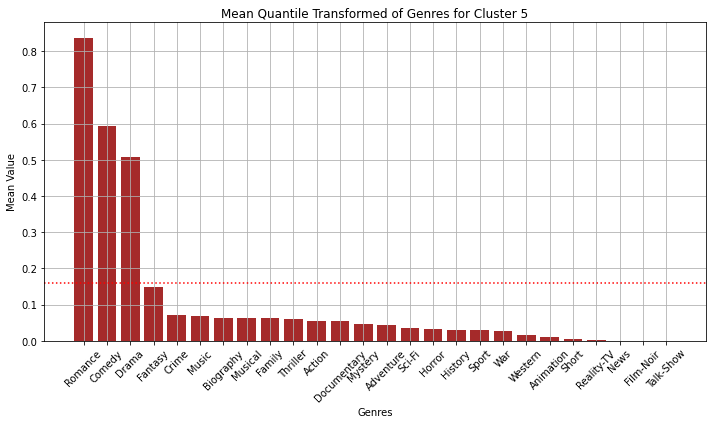

In [191]:
Cluster = 5

genres_label = cluster_means.columns[7:].tolist()
genres_value = cluster_means.iloc[Cluster, 7:]

# Sort the genres and their values
sorted_indices = genres_value.argsort()[::-1]  # [::-1] is to sort in descending order
genres_label_sorted = [genres_label[i] for i in sorted_indices]
genres_value_sorted = genres_value.iloc[sorted_indices]

plt.figure(figsize=(10, 6))  # Adjust size of the figure as needed

plt.bar(genres_label_sorted, genres_value_sorted, color='brown')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if they are long
plt.title("Mean Quantile Transformed of Genres for Cluster " + str(Cluster))
plt.ylabel("Mean Value")
plt.xlabel("Genres")
plt.axhline(y=mean_value, color='red', linestyle='dotted', label="Overall Mean Value")
plt.tight_layout()
plt.grid(True)

plt.show()

## Cluster 5: "Romantic Comedy Admirers"
#### Cluster 5 number of user: 10886 (26.8%)
Features: A dominant preference for Romance, followed by Comedy and Drama, characterizes this cluster. These viewers enjoy heartfelt romantic tales mixed with humor.

# Cross-Segmentation: 

Cross the results of clusters on frequency and dayparts with genres to generate a comprehensive understanding of audience preferences.This approach aims to identify overlapping trends and unique viewing habits, paving the way for more tailored content and targeted advertising strategies.

In [176]:
final_features = k_means_features.drop(columns=["KM_cluster_normalized", "KM_cluster_robustscaler"])

final_features = final_features.rename(columns={
    "KM_cluster_boxcox": "cluster_dayparts_frequency",
    "KM_cluster_quantile": "cluster_genres"
})

final_features

user_id  cluster_dayparts_frequency  cluster_genres  frequency  \
0      000052a0a0                           2               2         13   
1      000296842d                           3               0          2   
2      0006ea6b5c                           3               2          5   
3      0008c31833                           1               5          1   
4      000a3ec774                           3               5          2   
...           ...                         ...             ...        ...   
62320  fff92ebc7e                           1               5          1   
62321  fffd345213                           1               4          1   
62322  fffd4d1888                           1               0          1   
62323  fffe7b777b                           0               0          1   
62324  fffeac83be                           3               0          4   

       daypart_overnight (00:30-05:59)  daypart_breakfast (06:00-08:59)  \
0                                  0.0                              0.0   
1                                  1.0                              0.0   
2                                  0.0                              0.0   
3                                  0.0                              0.0   
4                                  0.0                              0.0   
...                                ...                              ...   
62320                              0.0                              0.0   
62321                              0.0                              1.0   
62322                              0.0                              0.0   
62323                              0.0                              0.0   
62324                              0.0                              0.0   

       daypart_daytime (9:00-17:29)  \
0                               2.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   
...                             ...   
62320                           0.0   
62321                           0.0   
62322                           0.0   
62323                           1.0   
62324                           0.0   

       daypart_Prime: early fringe (17:30-19:59)  \
0                                            6.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
62320                                        1.0   
62321                                        0.0   
62322                                        1.0   
62323                                        0.0   
62324                                        0.0   

       daypart_Prime: late fringe (20:00-22:59)  \
0                                           4.0   
1                                           1.0   
2                                           3.0   
3                                           0.0   
4                                           2.0   
...                                         ...   
62320                                       0.0   
62321                                       0.0   
62322                                       0.0   
62323                                       0.0   
62324                                       4.0   

       daypart_late night (23:00-00:29)  ...  News  Reality-TV  Romance  \
0                                   1.0  ...   0.0         0.0    0.000   
1                                   0.0  ...   0.0         0.0    0.000   
2                                   2.0  ...   0.0         0.0    0.691   
3                                   1.0  ...   0.0         0.0    0.139   
4                                   0.0  ...   0.0         0.0    0.387   
...                                 ...

In [177]:
final_segment = (final_features.groupby(['cluster_dayparts_frequency', 'cluster_genres'])
                 .size()
                 .reset_index(name='user_count'))
final_segment 

cluster_dayparts_frequency  cluster_genres  user_count
0                            0               0        3986
1                            0               1        3157
2                            0               2        1478
3                            0               3        5354
4                            0               4        2158
5                            0               5        3536
6                            1               0        4030
7                            1               1        2906
8                            1               2         354
9                            1               3        5846
10                           1               4        1271
11                           1               5        2928
12                           2               0         510
13                           2               1         363
14                           2               2        3961
15                           2               3         312
16                           2               4         748
17                           2               5         950
18                           3               0        4216
19                           3               1        2578
20                           3               2        1807
21                           3               3        5200
22                           3               4        1204
23                           3               5        3472

### Final Segmentation: The research combine the dayparts and frequency cluster with genres clusters, and get 24 types of audiences in total, each has their unique feature.

These are the final segmentation :

1. (0-0) Daytime Occasional & Mystery Buffs
2. (0-1) Daytime Occasional & Fantasy Adventurers
3. (0-2) Daytime Occasional & Entertainment Seekers
4. (0-3) Daytime Occasional & Documentary Enthusiasts
5. (0-4) Daytime Occasional & Animation Lovers
6. (0-5) Daytime Occasional & Romcom Admirers
7. (1-0) Early Fringe & Mystery Buffs
8. (1-1) Early Fringe & Fantasy Adventurers
9. (1-2) Early Fringe & Entertainment Seekers
10. (1-3) Early Fringe & Documentary Enthusiasts
11. (1-4) Early Fringe & Animation Lovers
12. (1-5) Early Fringe & Romcom Admirers
13. (2-0) Frequent All-Day & Mystery Buffs
14. (2-1) Frequent All-Day & Fantasy Adventurers
15. (2-2) Frequent All-Day & Entertainment Seekers
16. (2-3) Frequent All-Day & Documentary Enthusiasts
17. (2-4) Frequent All-Day & Animation Lovers
18. (2-5) Frequent All-Day & Romcom Admirers
19. (3-0) Late Fringe Occasional & Mystery Buffs
20. (3-1) Late Fringe Occasional & Fantasy Adventurers
21. (3-2) Late Fringe Occasional & Entertainment Seekers
22. (3-3) Late Fringe Occasional & Documentary Enthusiasts
23. (3-4) Late Fringe Occasional & Animation Lovers
24. (3-5) Late Fringe Occasional & Romcom Admirers

In [178]:
# Create dayparts and genres mappings
dayparts_mapping = {
    0: "Daytime Occasional",
    1: "Early Fringe",
    2: "Frequent All-Day",
    3: "Late Fringe Occasional"
}

genres_mapping = {
    0: "Mystery Buffs",
    1: "Fantasy Adventurers",
    2: "Entertainment Seekers",
    3: "Documentary Enthusiasts",
    4: "Animation Lovers",
    5: "Romcom Admirers"
}

# combine label
final_segment['combined_label'] = final_segment['cluster_dayparts_frequency'].map(dayparts_mapping) + " & " + final_segment['cluster_genres'].map(genres_mapping)

final_segment

cluster_dayparts_frequency  cluster_genres  user_count  \
0                            0               0        3986   
1                            0               1        3157   
2                            0               2        1478   
3                            0               3        5354   
4                            0               4        2158   
5                            0               5        3536   
6                            1               0        4030   
7                            1               1        2906   
8                            1               2         354   
9                            1               3        5846   
10                           1               4        1271   
11                           1               5        2928   
12                           2               0         510   
13                           2               1         363   
14                           2               2        3961   
15                           2               3         312   
16                           2               4         748   
17                           2               5         950   
18                           3               0        4216   
19                           3               1        2578   
20                           3               2        1807   
21                           3               3        5200   
22                           3               4        1204   
23                           3               5        3472   

                                      combined_label  
0                 Daytime Occasional & Mystery Buffs  
1           Daytime Occasional & Fantasy Adventurers  
2         Daytime Occasional & Entertainment Seekers  
3       Daytime Occasional & Documentary Enthusiasts  
4              Daytime Occasional & Animation Lovers  
5               Daytime Occasional & Romcom Admirers  
6                       Early Fringe & Mystery Buffs  
7                 Early Fringe & Fantasy Adventurers  
8               Early Fringe & Entertainment Seekers  
9             Early Fringe & Documentary Enthusiasts  
10                   Early Fringe & Animation Lovers  
11                    Early Fringe & Romcom Admirers  
12                  Frequent All-Day & Mystery Buffs  
13            Frequent All-Day & Fantasy Adventurers  
14          Frequent All-Day & Entertainment Seekers  
15        Frequent All-Day & Documentary Enthusiasts  
16               Frequent All-Day & Animation Lovers  
17                Frequent All-Day & Romcom Admirers  
18            Late Fringe Occasional & Mystery Buffs  
19      Late Fringe Occasional & Fantasy Adventurers  
20    Late Fringe Occasional & Entertainment Seekers  
21  Late Fringe Occasional & Documentary Enthusiasts  
22         Late Fringe Occasional & Animation Lovers  
23          Late Fringe Occasional & Romcom Admirers

In [179]:
final_segment['user_count'].describe()

count      24.000000
mean     2596.875000
std      1707.543247
min       312.000000
25%      1140.500000
50%      2742.000000
75%      3967.250000
max      5846.000000
Name: user_count, dtype: float64

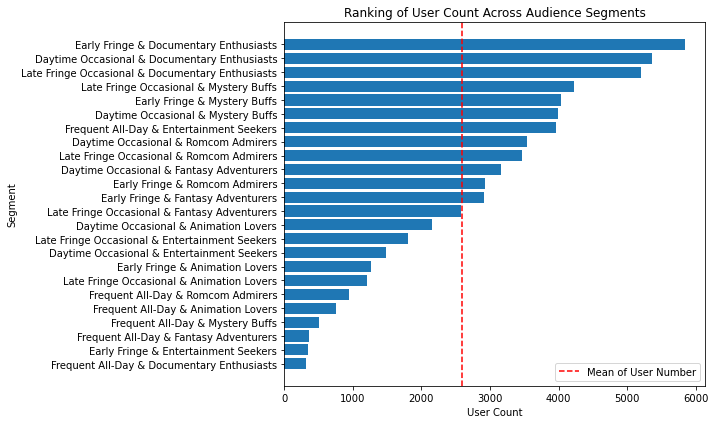

In [186]:
final_segment_sorted = final_segment.sort_values(by='user_count', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(final_segment_sorted['combined_label'], final_segment_sorted['user_count'])


plt.axvline(x=2596.875, color='red', linestyle='--', label='Mean of User Number')
plt.xlabel('User Count')
plt.ylabel('Segment')
plt.title('Ranking of User Count Across Audience Segments')
plt.legend()  
plt.tight_layout()
plt.show()

## Other Method

### K-means with standard_features (Testing)

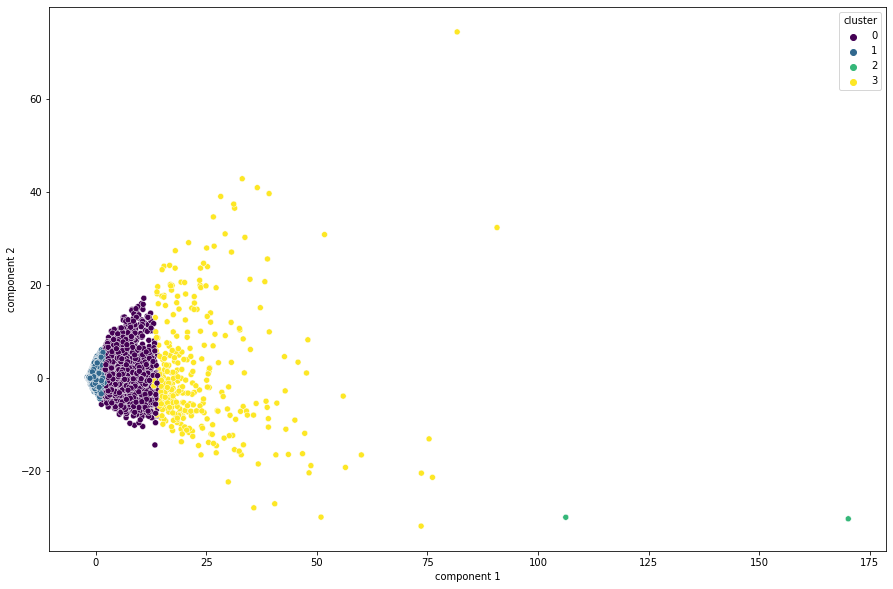

In [200]:
# fit into k-means
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init= 30)
kmeans.fit(standard_features)

# Reducing dimensions using PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(standard_features)

# Converting to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['component 1', 'component 2'])

# Using KMeans labels
principalDf['cluster'] = kmeans.labels_

# Plotting scatter plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='component 1', y='component 2', hue='cluster', data=principalDf, palette='viridis')
plt.show()

### K-means with minmax_features (Testing)

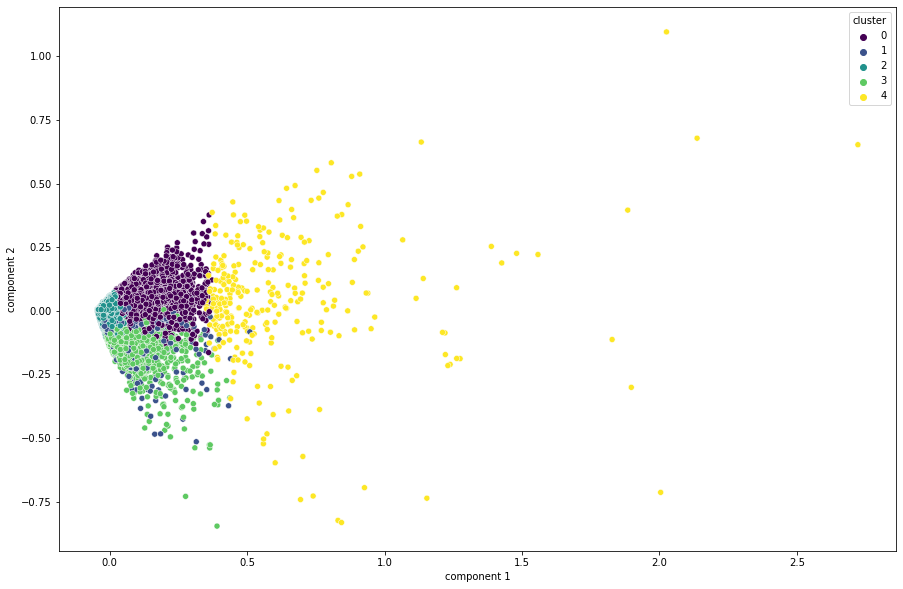

In [201]:
# fit into k-means
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init= 30)
kmeans.fit(minmax_features)

# Reducing dimensions using PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(minmax_features)

# Converting to DataFrame
principalDf = pd.DataFrame(data=principalComponents, columns=['component 1', 'component 2'])

# Using KMeans labels
principalDf['cluster'] = kmeans.labels_

# Plotting scatter plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='component 1', y='component 2', hue='cluster', data=principalDf, palette='viridis')
plt.show()

# Mean Shift Clustering:

Pros:
Doesn't assume any prior knowledge on the number of clusters.
Can find clusters of any shape.

Cons:
Computationally more intensive.
Bandwidth parameter selection can be non-trivial.

Suitability: For datasets where clusters might have irregular shapes.

Reference: https://towardsdatascience.com/understanding-mean-shift-clustering-and-implementation-with-python-6d5809a2ac40

In [202]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
# Apply Mean Shift clustering
mean_shift = MeanShift(bandwidth=None)  # If bandwidth=None, it will be estimated.
labels = mean_shift.fit_predict(quantile_features)

# Add labels to the dataframe
quantile_lables = labels.lables

print(quantile_lables)

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(quantile_features.drop('cluster', axis=1))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=quantile_features['cluster'], cmap='rainbow', s=50)
plt.title('2D PCA of Mean Shift Clusters')
plt.colorbar()
plt.show()

In [ ]:
# Apply Mean Shift clustering

bandwidth = estimate_bandwidth(quantile_features, quantile=0.3, n_samples=500)

mean_shift = MeanShift(bandwidth=bandwidth)  # If bandwidth=None, it will be estimated.
labels = mean_shift.fit_predict(quantile_features)

# Add labels to the dataframe
quantile_features['cluster'] = labels

print(quantile_features)

# DBSCAN 
(Density-Based Spatial Clustering of Applications with Noise)

Pros:
Can find arbitrarily shaped clusters.
Doesn't require the number of clusters to be specified.
Separates noise points.

Cons:
Doesn't work well when clusters have varying densities.
Selection of hyperparameters (Eps and MinPts) can be tricky.

Suitability: For datasets with noise and non-spherical clusters.

In [ ]:
from sklearn.neighbors import NearestNeighbors

def find_eps(features, title, k=5):
    # Compute the nearest neighbors
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(features)
    distances, _ = neighbors_fit.kneighbors(features)
    
    # Sort the distances
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    
    # Plot the K-nearest distance graph
    plt.plot(distances)
    plt.ylabel("K-Nearest Distance")
    plt.xlabel("Points (sorted by distance)")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Apply find_eps on different feature sets
find_eps(quantile_features, 'K-Nearest Distance with Quantile Features', k=5)
find_eps(standard_features, 'K-Nearest Distance with Standard Features', k=5)
find_eps(minmax_features, 'K-Nearest Distance with MinMax Features', k=5)
find_eps(normalized_features, 'K-Nearest Distance with Normalized Features', k=5)

In [ ]:
from sklearn.cluster import DBSCAN

# Function to apply DBSCAN with specific eps and min_samples
def apply_dbscan(features, title, eps_value, min_samples_value):
    # Take a subset of the data
    subset_features = features[np.random.choice(features.shape[0], 3000, replace=False), :]
    
    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
    clusters = dbscan.fit_predict(subset_features)
    
    # Plot the clusters
    plt.scatter(subset_features[:, 0], subset_features[:, 1], c=clusters, cmap='viridis')
    plt.title(title)
    plt.show()

# Apply DBSCAN on different feature sets with customized eps and min_samples
apply_dbscan(quantile_features, 'DBSCAN with Quantile Features', eps_value=1, min_samples_value=6)
apply_dbscan(standard_features, 'DBSCAN with Standard Features', eps_value=5, min_samples_value=6)
apply_dbscan(minmax_features, 'DBSCAN with MinMax Features', eps_value=0.25, min_samples_value=6)
apply_dbscan(normalized_features, 'DBSCAN with Normalized Features', eps_value=0.3, min_samples_value=5)

# (Not using)Hierarchical Clustering

Pros:
Doesn't require the number of clusters to be specified a priori.
Provides a dendrogram, which can be useful for understanding the data hierarchy.

Cons:
Computationally more expensive compared to K-means.
Not suitable for large datasets.

Suitability: For smaller datasets or when a hierarchical structure is desired.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Function to perform hierarchical clustering on a random subset
def hierarchical_clustering_on_subset(features, title, subset_size=50):
    # Convert DataFrame to NumPy array if it's a DataFrame
    if isinstance(features, pd.DataFrame):
        features = features.values
    
    # Select a random subset of the data
    random_indices = np.random.choice(features.shape[0], subset_size, replace=False)
    subset_features = features[random_indices, :]
    
    # Perform Hierarchical Clustering
    linked = linkage(subset_features, 'ward')

    # Plot the dendrogram
    plt.figure(figsize=(20, 10))
    dendrogram(linked)
    plt.title(title)
    plt.show()

# Apply the function on the four feature sets
hierarchical_clustering_on_subset(quantile_features, 'Hierarchical Clustering with Quantile Features')
hierarchical_clustering_on_subset(normalized_features, 'Hierarchical Clustering with Normalized Features')
hierarchical_clustering_on_subset(robustscaler_features, 'Hierarchical Clustering with Robust Scaled Features')
hierarchical_clustering_on_subset(boxcox_features, 'Hierarchical Clustering with BoxCox Transformed Features')
